In [1]:
from IPython.core.display import display, HTML

display(HTML('''
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css">
<style>
.card {
  box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.
2);
  max-width: 700px;
  margin: auto;
  text-align: center;
}
.title {
  color: grey;
  font-size: 18px;
}
.p{}
button {
  border: none;
  outline: 0;
  display: inline-block;
  padding: 8px;
  color: white;
  background-color: #000;
  text-align: center;
  cursor: pointer;
  width: 100%;
  font-size: 18px;
}
button:hover, a:hover {
  opacity: 0.7;
}
</style>

<div class="card" style="text-align: center;">
  <br><br><br>  
  <img src="https://storage.googleapis.com/kaggle-avatars/images/21544320-kg.jpg" 
       alt="Kaggle Logo" 
       style="width: 180px; height: 180px; border-radius: 50%; display: block; margin: 0 auto;">
  <h1>Paraczki Andrada</h1>
  <p class="title1" style="text-align:center;">Computer Science Student</p>
  <p class="title" style="text-align:center;">Bachelor's Thesis</p>
  <p style="text-align:center; font-size: 18px;">West University of Timișoara</p>
  <a style="text-decoration: none; font-size: 16px; color: #ce5cf7;" href="mailto:andrada.paraczki03@e-uvt.ro">
    Institutional e-mail <i class="fa fa-envelope"></i>
  </a>
  <br><br><br>
</div>

'''))


## Install Ultralytics
You need Internet enabled

In [6]:
# Install the ultralytics package from PyPI
!pip install ultralytics

# Analyze the dataset distribution

In [9]:
import os
from collections import Counter

labels_path = "/kaggle/input/balanced-dsyd-3/Balanced DSYD 2 split/train/labels"  # adjust if needed
counter = Counter()

for file in os.listdir(labels_path):
    if file.endswith(".txt"):
        with open(os.path.join(labels_path, file)) as f:
            for line in f:
                class_id = line.strip().split()[0]
                counter[int(class_id)] += 1

for cls, count in sorted(counter.items()):
    print(f"Class {cls}: {count} objects")


Class 0: 1195 objects
Class 1: 765 objects
Class 2: 2288 objects


# Import & Train YOLO

Add YOLO model from input (I chose the yolo11n.pt weights from the YOLOv11 family provided by Ultralytics on Kaggle)

`Ultralytics 8.3.104` is the version of the ultralytics Python package, which is currently v8.x, even though it supports YOLOv11 models.

Proceed with training on the DSO dataset.

In [3]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [8]:
# # Load a model
# # model = YOLO("yolo11n.yaml")  # build a new model from YAML
model = YOLO("/kaggle/input/yolov8/pytorch/default/1/yolov8n.pt")  # load a pretrained model (recommended for training)
# # model = YOLO("yolo11n.yaml").load("yolo11n.pt")  # build from YAML and transfer weights

# # Train the model
results = model.train(data="/kaggle/input/balanced-dsyd-3/Balanced DSYD 2 split/data.yaml", epochs=50, imgsz=640, project="/kaggle/working/deepspace/50ep")

Ultralytics 8.3.145 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/balanced-dsyd-3/Balanced DSYD 2 split/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/kaggle/input/yolov8/pytorch/default/1/yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto

train: Scanning /kaggle/input/balanced-dsyd-3/Balanced DSYD 2 split/train/labels... 2968 images, 527 backgrounds, 0 corrupt: 100%|██████████| 2968/2968 [00:14<00:00, 207.55it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/balanced-dsyd-3/Balanced DSYD 2 split/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 31.8±13.8 MB/s, size: 255.7 KB)


val: Scanning /kaggle/input/balanced-dsyd-3/Balanced DSYD 2 split/val/labels... 371 images, 65 backgrounds, 0 corrupt: 100%|██████████| 371/371 [00:01<00:00, 193.23it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/balanced-dsyd-3/Balanced DSYD 2 split/val is not writeable, cache not saved.
Plotting labels to /kaggle/working/deepspace/50ep/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /kaggle/working/deepspace/50ep/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.27G      1.876      3.391      1.806         37        640: 100%|██████████| 186/186 [00:38<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.35it/s]


                   all        371        495       0.32      0.354      0.264      0.107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.53G      1.798      2.624      1.739         28        640: 100%|██████████| 186/186 [00:36<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.94it/s]

                   all        371        495      0.323      0.388       0.33      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.53G      1.774       2.27      1.721         32        640: 100%|██████████| 186/186 [00:36<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.97it/s]


                   all        371        495      0.526      0.398        0.4      0.192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.53G      1.748      2.113      1.703         14        640: 100%|██████████| 186/186 [00:35<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.87it/s]


                   all        371        495      0.464      0.476      0.429      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.53G      1.701      1.989      1.651         14        640: 100%|██████████| 186/186 [00:36<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.72it/s]

                   all        371        495      0.557      0.489      0.502      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.53G      1.657      1.918      1.655         27        640: 100%|██████████| 186/186 [00:36<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.88it/s]

                   all        371        495      0.533      0.473      0.489      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.53G      1.629      1.835      1.615         33        640: 100%|██████████| 186/186 [00:36<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.01it/s]

                   all        371        495      0.637      0.451        0.5      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.53G      1.606      1.769      1.594          8        640: 100%|██████████| 186/186 [00:36<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.42it/s]

                   all        371        495      0.573      0.515      0.539      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.53G      1.572      1.722      1.564         18        640: 100%|██████████| 186/186 [00:36<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.93it/s]

                   all        371        495      0.681      0.491      0.568      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.53G      1.561      1.739      1.558         12        640: 100%|██████████| 186/186 [00:36<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.76it/s]


                   all        371        495      0.709      0.543      0.632      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.53G      1.531      1.662       1.55         15        640: 100%|██████████| 186/186 [00:35<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.94it/s]

                   all        371        495      0.674       0.56      0.606      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.53G      1.515      1.656      1.547         13        640: 100%|██████████| 186/186 [00:35<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.06it/s]

                   all        371        495       0.62      0.518      0.576      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.53G      1.516      1.626      1.536         11        640: 100%|██████████| 186/186 [00:36<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.86it/s]

                   all        371        495      0.709      0.585      0.641      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.53G      1.492      1.567      1.514         26        640: 100%|██████████| 186/186 [00:35<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.72it/s]

                   all        371        495      0.658      0.537      0.596      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.53G      1.486      1.531      1.512         33        640: 100%|██████████| 186/186 [00:35<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.62it/s]


                   all        371        495      0.732      0.629      0.685      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.53G       1.49      1.528      1.506         13        640: 100%|██████████| 186/186 [00:36<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.61it/s]

                   all        371        495      0.672      0.634       0.67      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.53G      1.461       1.49      1.477         14        640: 100%|██████████| 186/186 [00:36<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.63it/s]

                   all        371        495      0.669      0.617      0.653      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.53G      1.457       1.47       1.48         14        640: 100%|██████████| 186/186 [00:35<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.62it/s]

                   all        371        495      0.717      0.597      0.684       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.53G      1.437      1.488      1.478         14        640: 100%|██████████| 186/186 [00:36<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.11it/s]

                   all        371        495      0.753      0.593      0.685      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.53G      1.421      1.411      1.445         16        640: 100%|██████████| 186/186 [00:35<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.15it/s]

                   all        371        495      0.719       0.58      0.651      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.53G      1.436       1.45      1.478         17        640: 100%|██████████| 186/186 [00:36<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.77it/s]

                   all        371        495      0.772      0.609      0.698      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.53G        1.4      1.402      1.463         17        640: 100%|██████████| 186/186 [00:36<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.00it/s]

                   all        371        495      0.746        0.6      0.694      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.53G      1.404       1.38      1.451         27        640: 100%|██████████| 186/186 [00:36<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.75it/s]

                   all        371        495      0.767      0.611      0.699      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.53G      1.387      1.349      1.427         16        640: 100%|██████████| 186/186 [00:36<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.97it/s]

                   all        371        495      0.757      0.626      0.709        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.53G      1.395      1.324      1.429         17        640: 100%|██████████| 186/186 [00:37<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.54it/s]

                   all        371        495      0.739      0.655      0.722      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.53G      1.363      1.322      1.418         15        640: 100%|██████████| 186/186 [00:36<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.87it/s]

                   all        371        495      0.759      0.633      0.708      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.53G      1.365      1.288      1.414          9        640: 100%|██████████| 186/186 [00:36<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.80it/s]

                   all        371        495      0.682      0.675      0.687      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.53G      1.369      1.314       1.41         19        640: 100%|██████████| 186/186 [00:36<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.67it/s]

                   all        371        495      0.801      0.675      0.748      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.53G      1.349      1.274      1.411         16        640: 100%|██████████| 186/186 [00:36<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.72it/s]

                   all        371        495      0.797      0.655      0.733      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.53G      1.339      1.273      1.405         15        640: 100%|██████████| 186/186 [00:36<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.86it/s]

                   all        371        495      0.773      0.697      0.742      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.53G      1.344      1.243      1.405         19        640: 100%|██████████| 186/186 [00:36<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.53it/s]

                   all        371        495      0.794       0.66       0.74      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.53G      1.328      1.218      1.393         19        640: 100%|██████████| 186/186 [00:36<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.71it/s]

                   all        371        495      0.851      0.642      0.759      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.53G      1.313      1.213       1.38         14        640: 100%|██████████| 186/186 [00:36<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.82it/s]

                   all        371        495      0.769      0.656      0.742      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.53G      1.326      1.214      1.388         16        640: 100%|██████████| 186/186 [00:35<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.01it/s]

                   all        371        495      0.795      0.689      0.747      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.53G      1.306      1.196      1.375         21        640: 100%|██████████| 186/186 [00:36<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.12it/s]

                   all        371        495      0.793      0.693      0.757      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.53G      1.286       1.15      1.359          8        640: 100%|██████████| 186/186 [00:36<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.54it/s]

                   all        371        495      0.792      0.692      0.759      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.53G      1.289      1.151      1.355         27        640: 100%|██████████| 186/186 [00:36<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.02it/s]

                   all        371        495      0.809      0.691       0.77      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.53G      1.282      1.116      1.355         19        640: 100%|██████████| 186/186 [00:35<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.89it/s]

                   all        371        495      0.804      0.707      0.778      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.53G      1.267      1.093      1.353         23        640: 100%|██████████| 186/186 [00:35<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.34it/s]

                   all        371        495      0.839      0.708      0.781      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.53G      1.257      1.103      1.342         17        640: 100%|██████████| 186/186 [00:36<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.73it/s]

                   all        371        495      0.815      0.717      0.782      0.466


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.53G      1.267      1.026      1.364         30        640: 100%|██████████| 186/186 [00:37<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.10it/s]

                   all        371        495      0.806      0.731      0.794      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.53G       1.23     0.9905      1.343         13        640: 100%|██████████| 186/186 [00:35<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.69it/s]

                   all        371        495      0.826        0.7      0.783      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.53G      1.214     0.9535      1.331          9        640: 100%|██████████| 186/186 [00:35<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.99it/s]

                   all        371        495      0.819      0.704      0.782      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.53G      1.191     0.9374      1.318         11        640: 100%|██████████| 186/186 [00:35<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.63it/s]

                   all        371        495      0.796      0.741       0.79      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.53G      1.192     0.9337      1.313         28        640: 100%|██████████| 186/186 [00:35<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.16it/s]

                   all        371        495      0.847       0.71      0.788      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.53G      1.184     0.9099      1.304         22        640: 100%|██████████| 186/186 [00:35<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.97it/s]

                   all        371        495      0.806      0.754      0.788       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.53G      1.172      0.902      1.296          7        640: 100%|██████████| 186/186 [00:35<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.73it/s]

                   all        371        495      0.799      0.741      0.795      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.53G      1.162     0.8805      1.289          4        640: 100%|██████████| 186/186 [00:36<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.04it/s]

                   all        371        495       0.85      0.738      0.803        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.53G      1.141     0.8653       1.28          8        640: 100%|██████████| 186/186 [00:35<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.03it/s]

                   all        371        495      0.848      0.722      0.799      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.53G      1.137     0.8666      1.283          6        640: 100%|██████████| 186/186 [00:35<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.55it/s]

                   all        371        495      0.839      0.733      0.805      0.498



50 epochs completed in 0.542 hours.
Optimizer stripped from /kaggle/working/deepspace/50ep/train3/weights/last.pt, 6.2MB
Optimizer stripped from /kaggle/working/deepspace/50ep/train3/weights/best.pt, 6.2MB

Validating /kaggle/working/deepspace/50ep/train3/weights/best.pt...
Ultralytics 8.3.145 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.38it/s]


                   all        371        495      0.851      0.738      0.803      0.501
              clusters        109        141      0.921      0.794      0.838      0.548
               nebulae         91         96      0.755      0.625       0.71      0.451
              galaxies        114        258      0.876      0.794       0.86      0.505


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to /kaggle/working/deepspace/50ep/train3


## Download a sample image
Use the following function to download an online image to Kaggle's output working dir

In [21]:
import requests

url = "https://www.optics-trade.eu/blog/wp-content/uploads/2021/01/LeoTripletHunterWilson.jpg"
image_path = "/kaggle/working/test4.png"

# Download image
response = requests.get(url)
with open(image_path, 'wb') as f:
    f.write(response.content)
    print("Image saved!")


Image saved!


## Test with saved YOLO model weights

In [46]:
# Run inference on an image with YOLO11n
!yolo predict model=/kaggle/working/balanced/40ep-3c/train/weights/best.pt source="/kaggle/working/test4.png"

Ultralytics 8.3.137 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /kaggle/working/test4.png: 544x640 3 galaxiess, 32.2ms
Speed: 7.0ms preprocess, 32.2ms inference, 161.7ms postprocess per image at shape (1, 3, 544, 640)
Results saved to runs/detect/predict10
💡 Learn more at https://docs.ultralytics.com/modes/predict


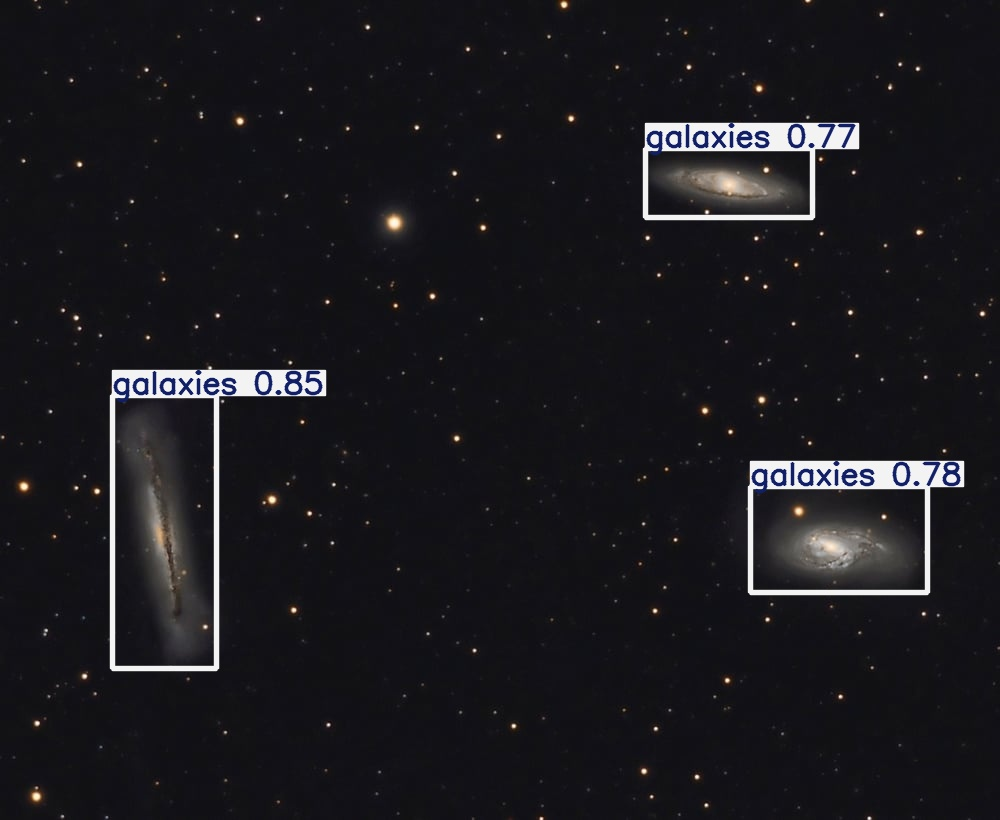

In [47]:
from IPython.display import Image, display
import os

# Replace with the actual file name YOLO saved (usually same as input image name)
predicted_image_path = '/kaggle/working/runs/detect/predict10/test4.jpg'

# Check if file exists
if os.path.exists(predicted_image_path):
    display(Image(filename=predicted_image_path))
else:
    print(f"Predicted image not found at: {predicted_image_path}")


# Evaluate the model


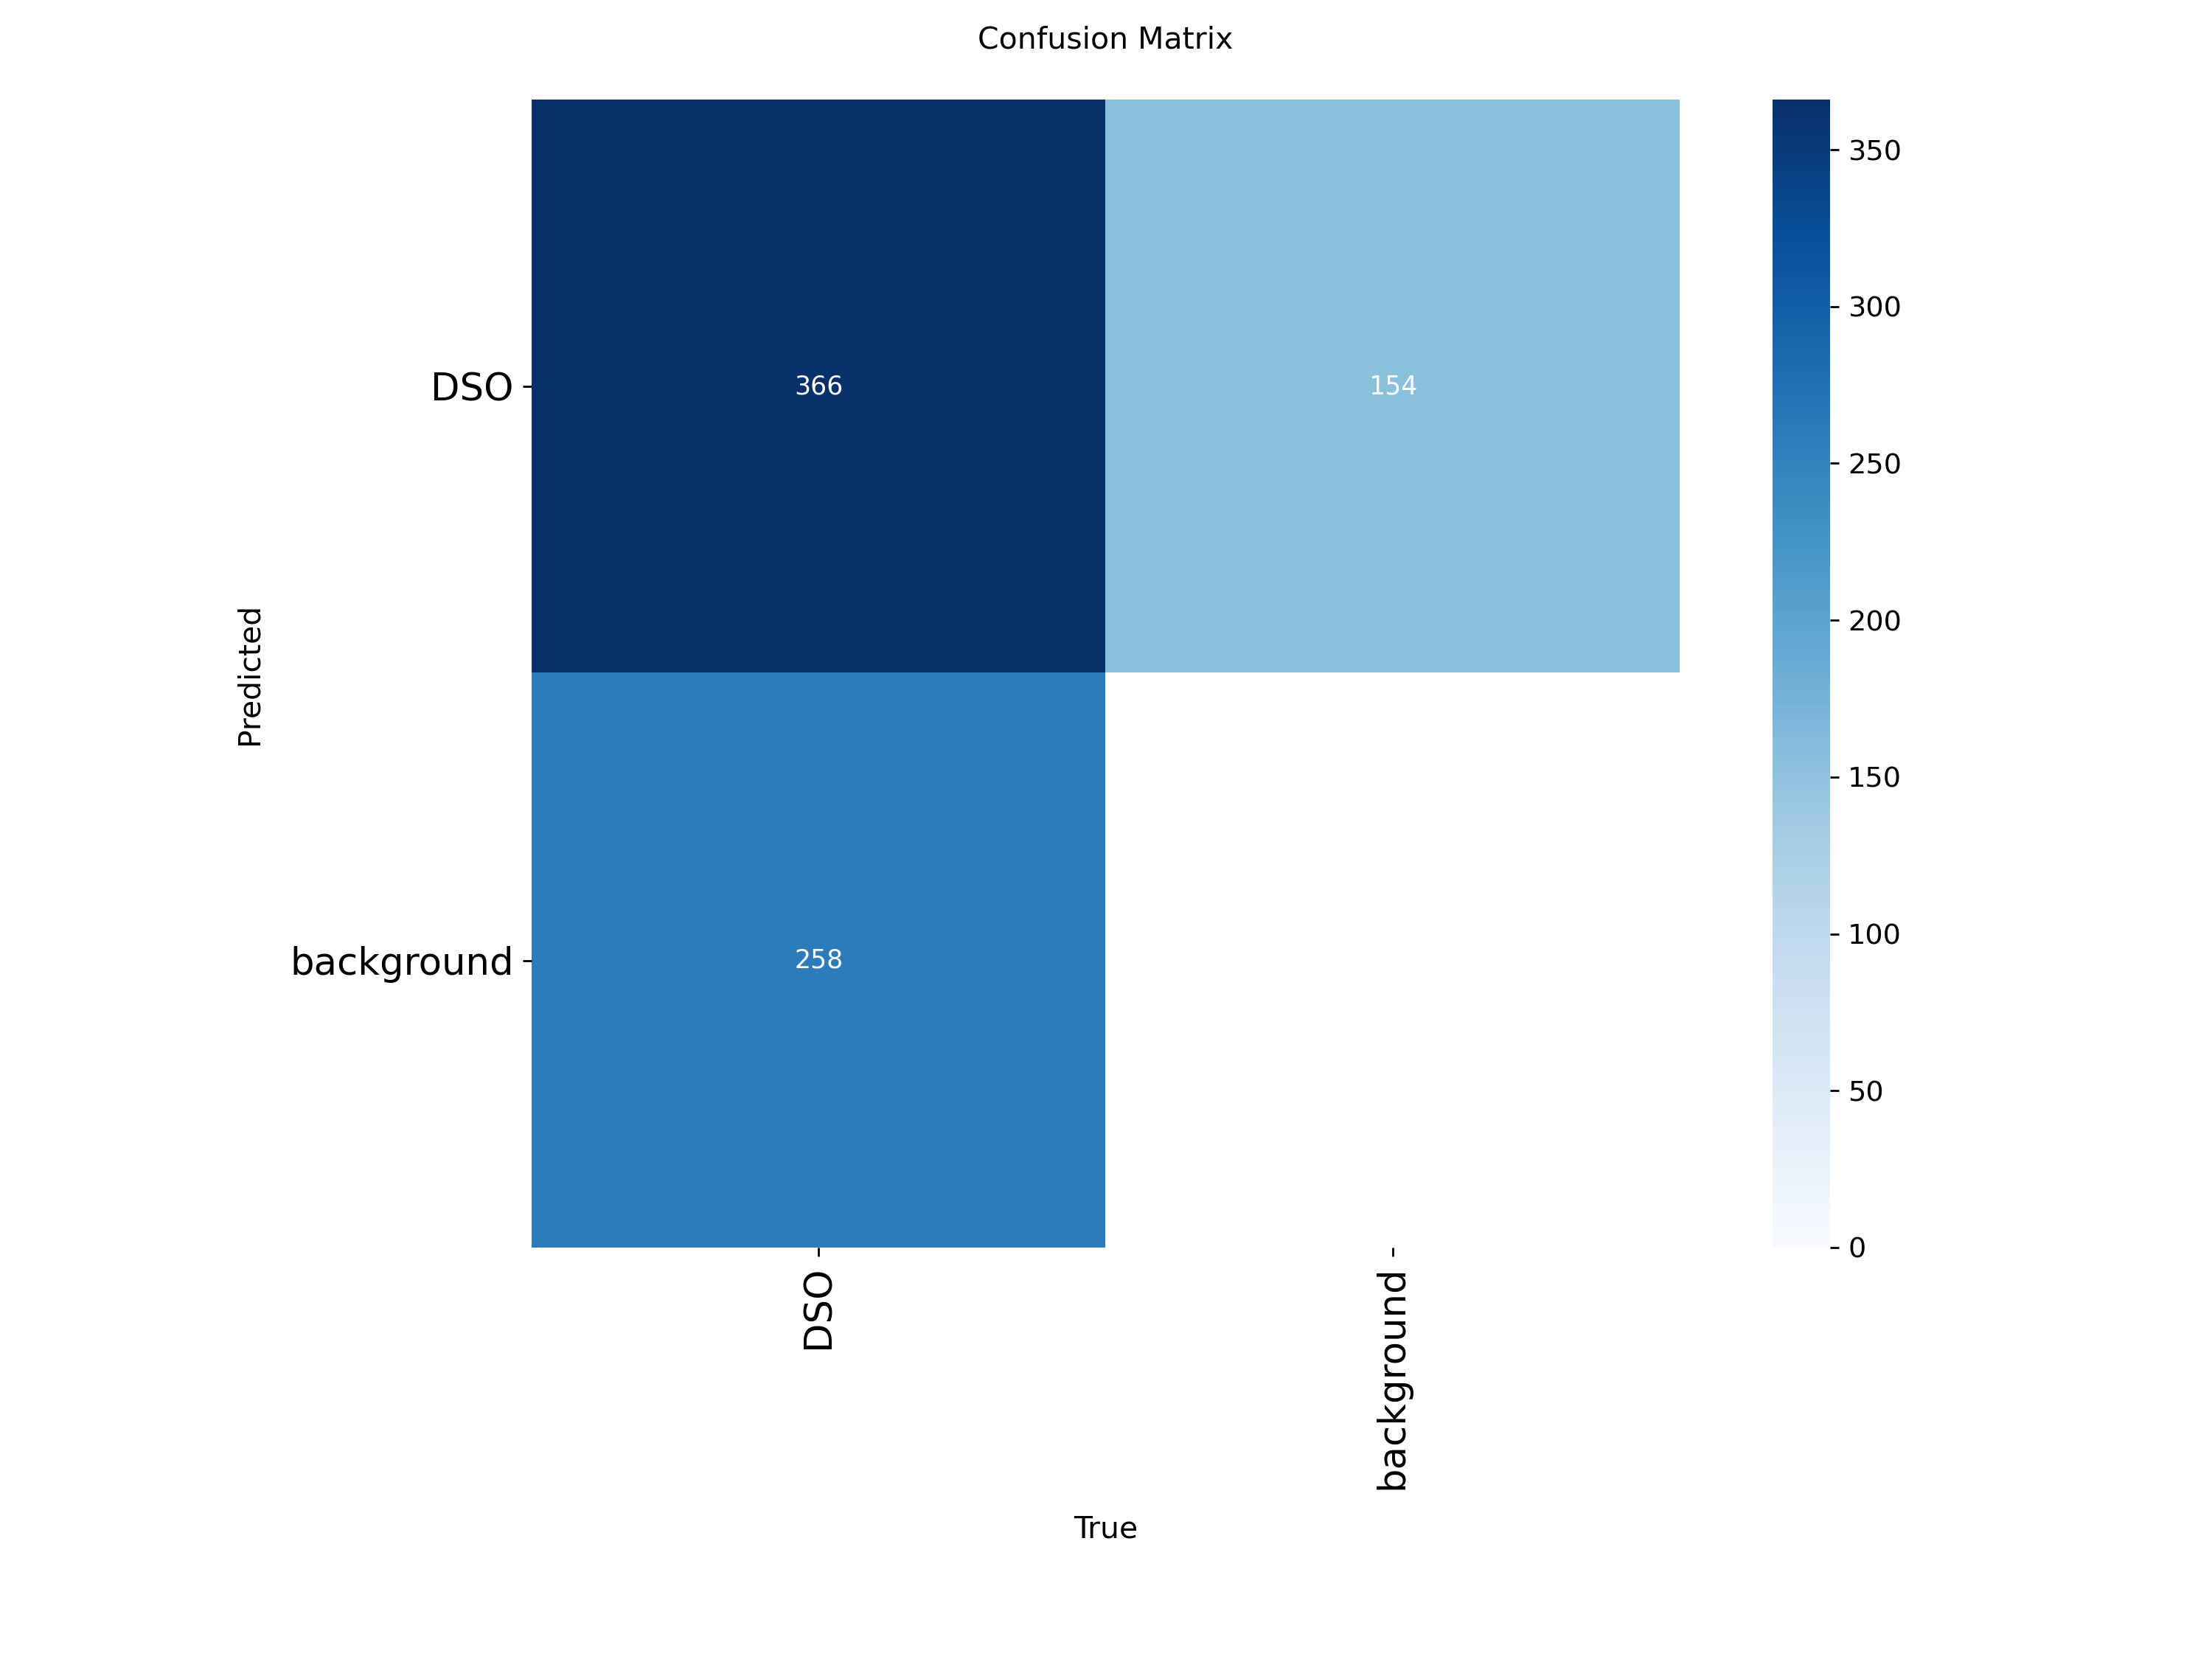
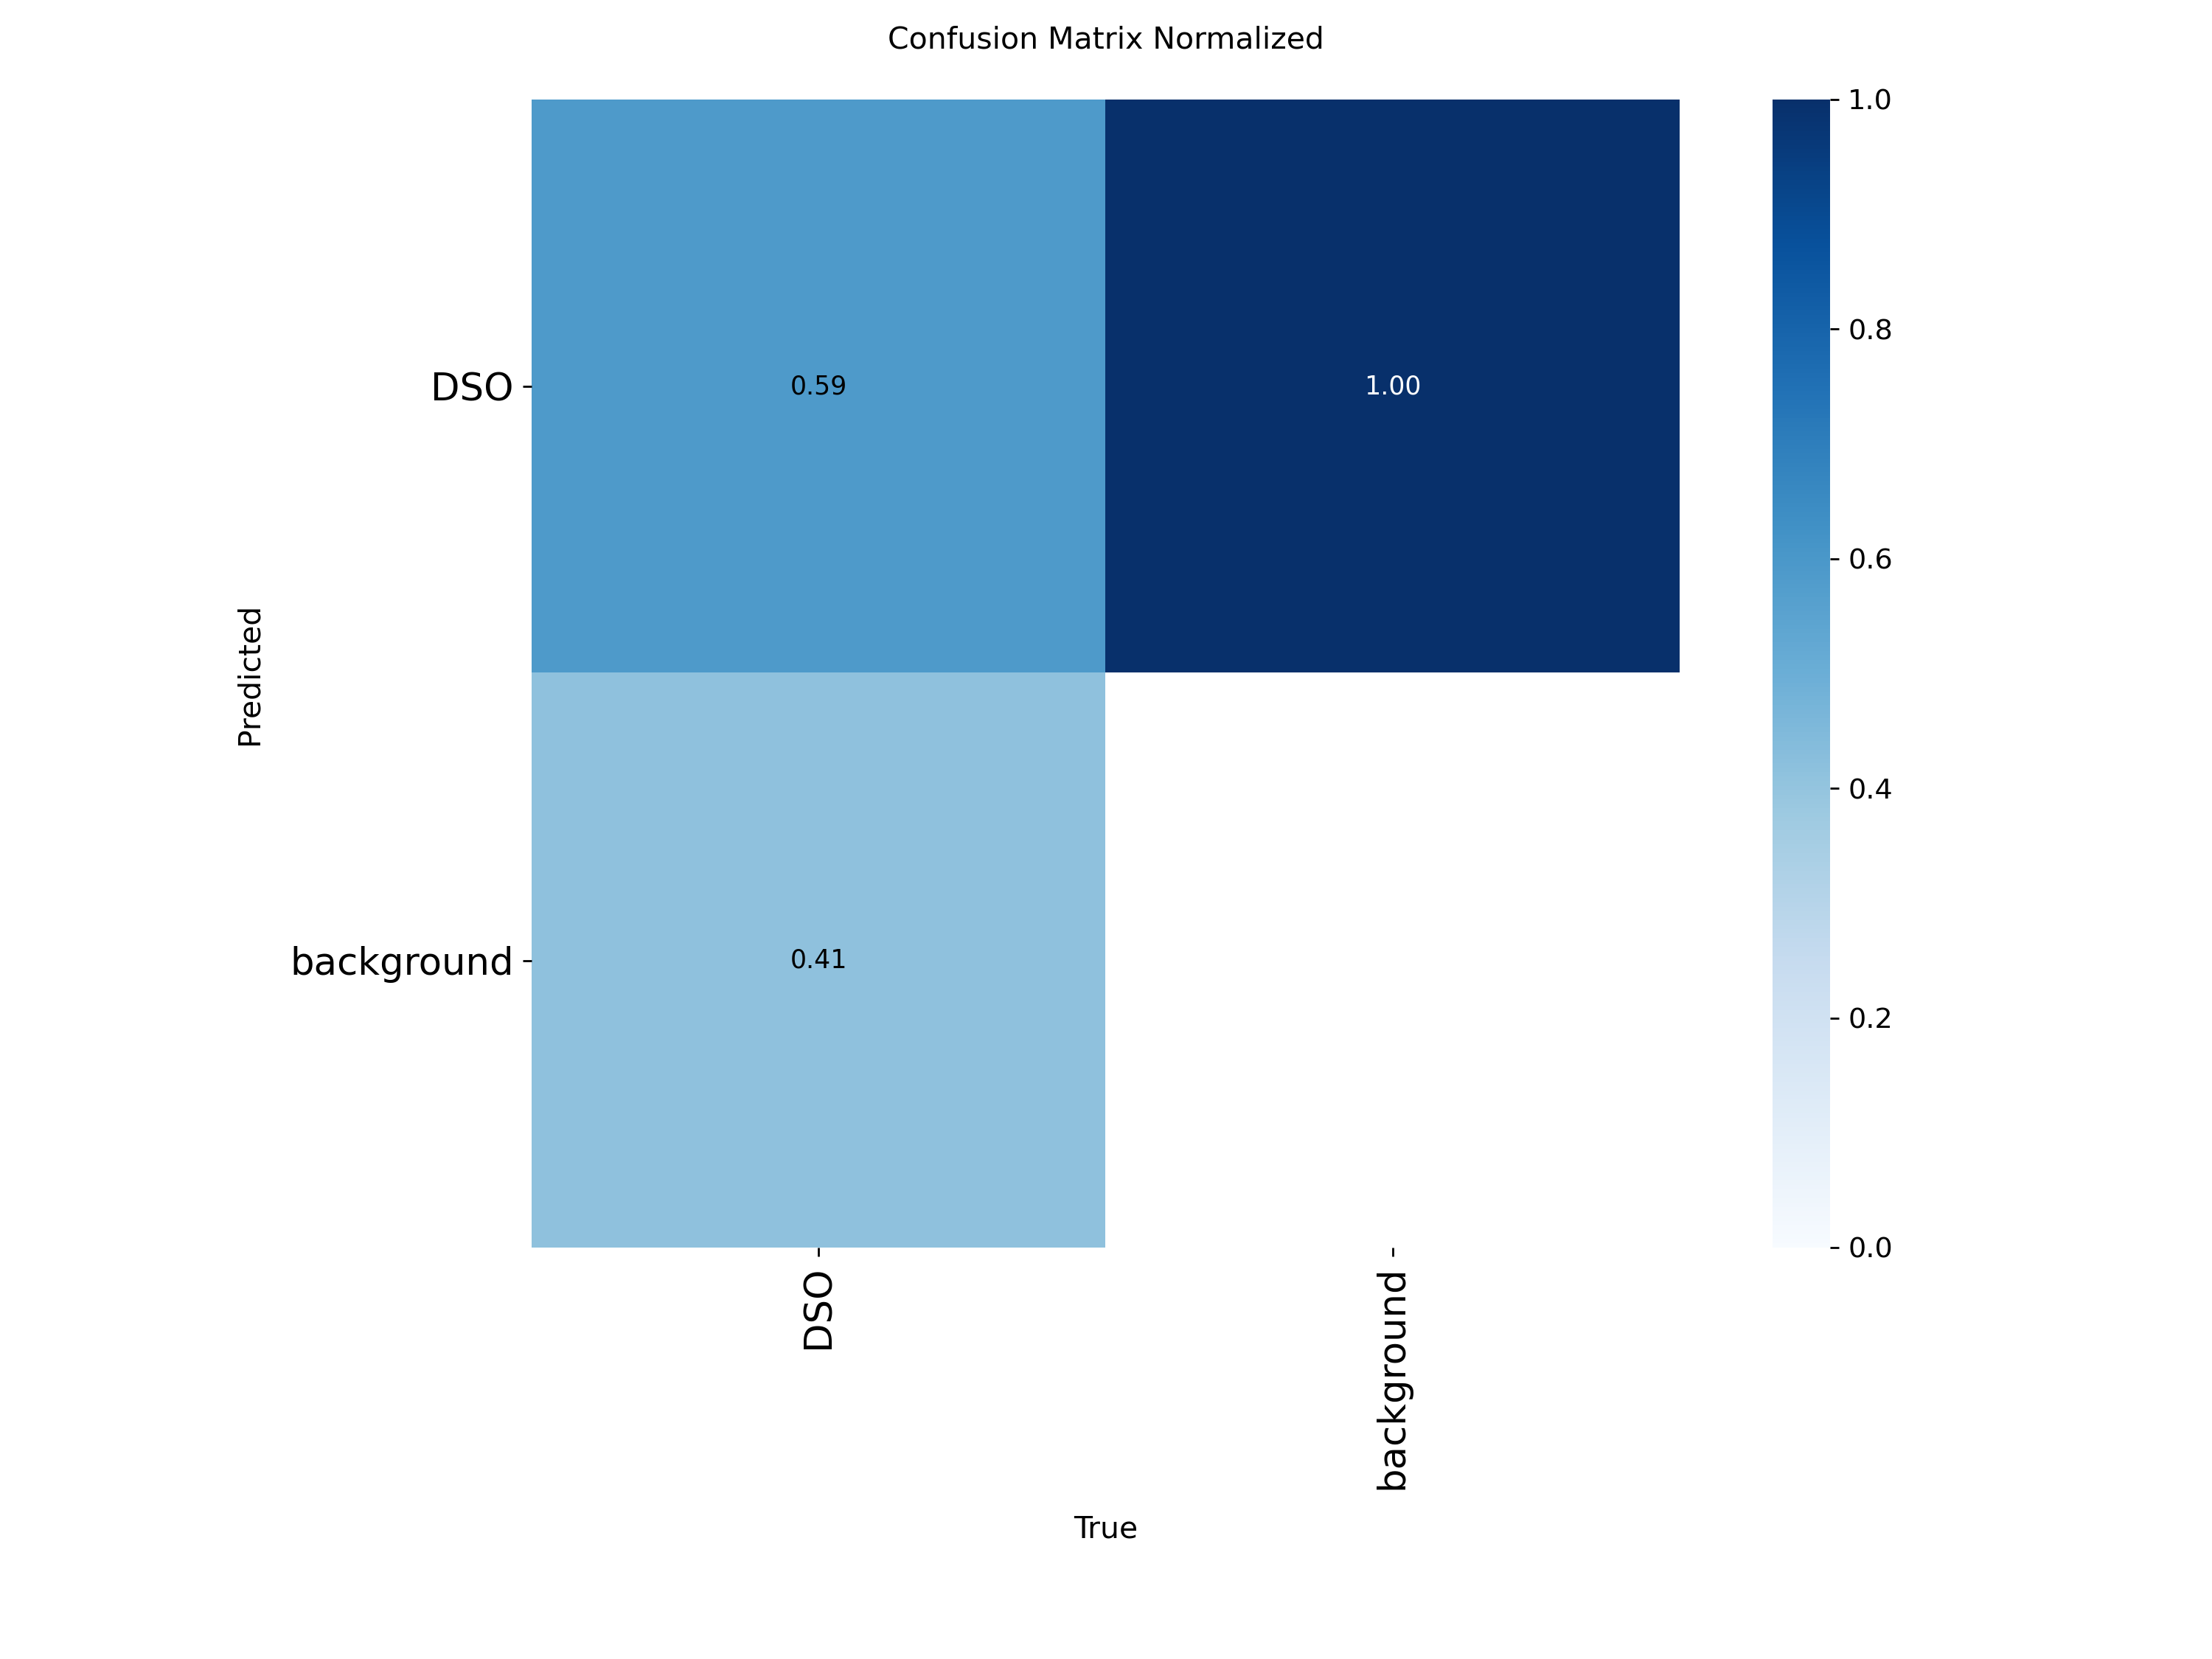
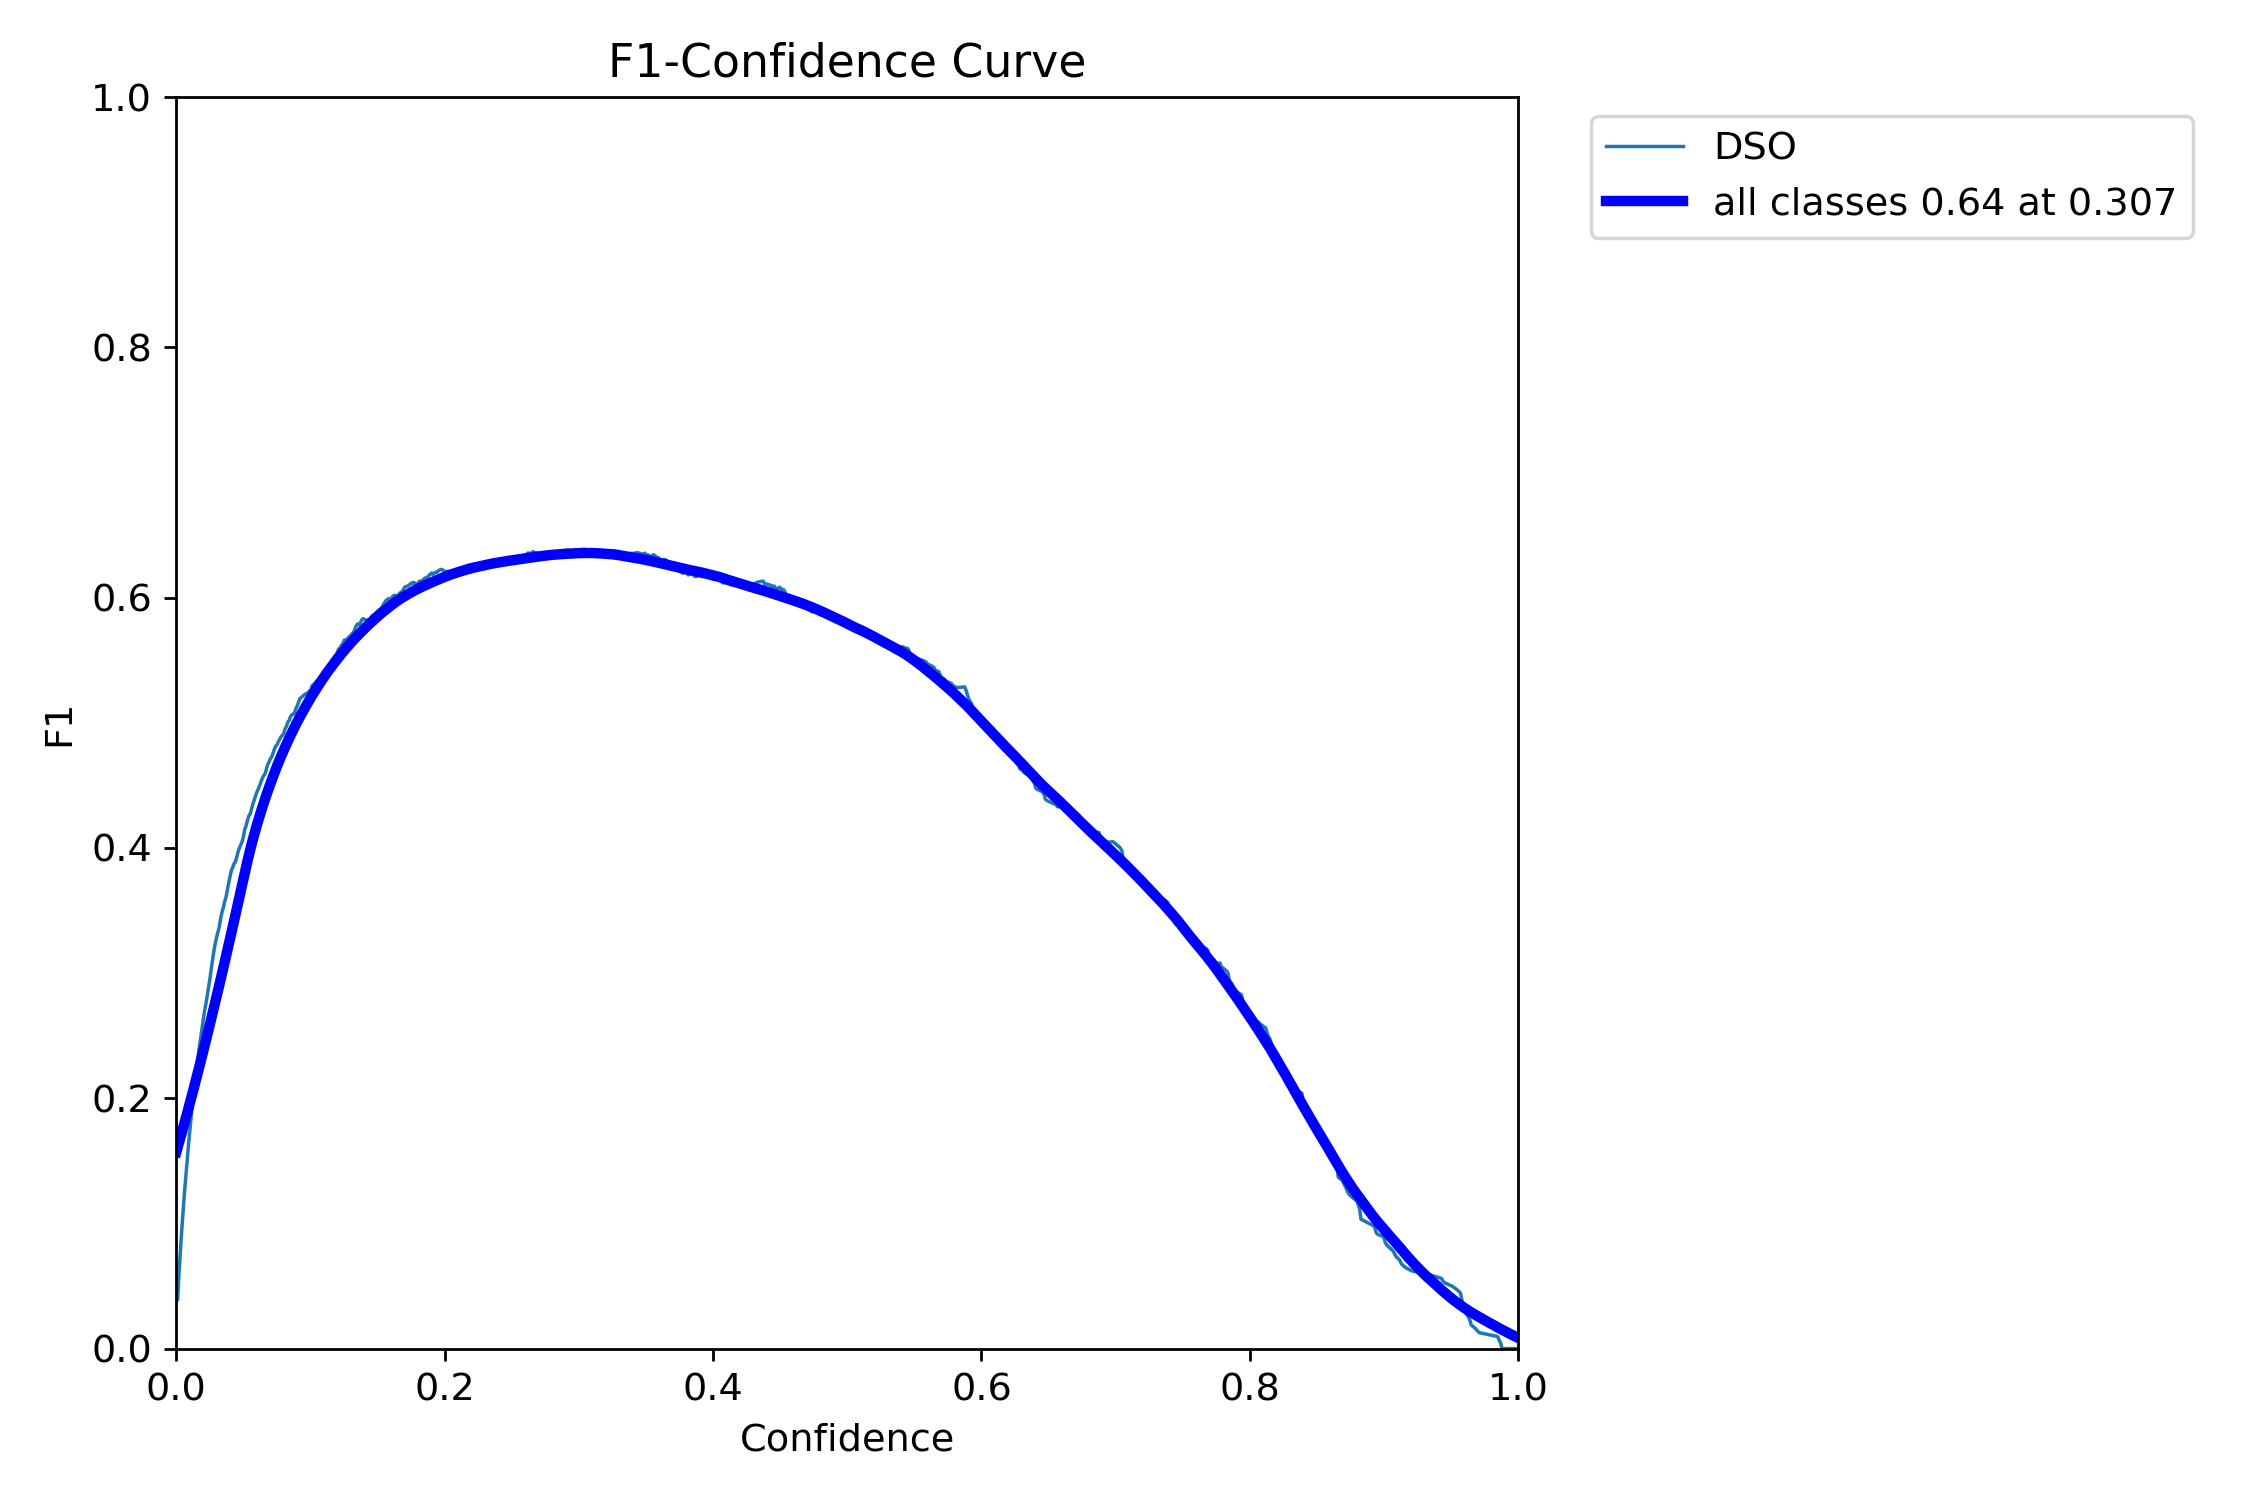
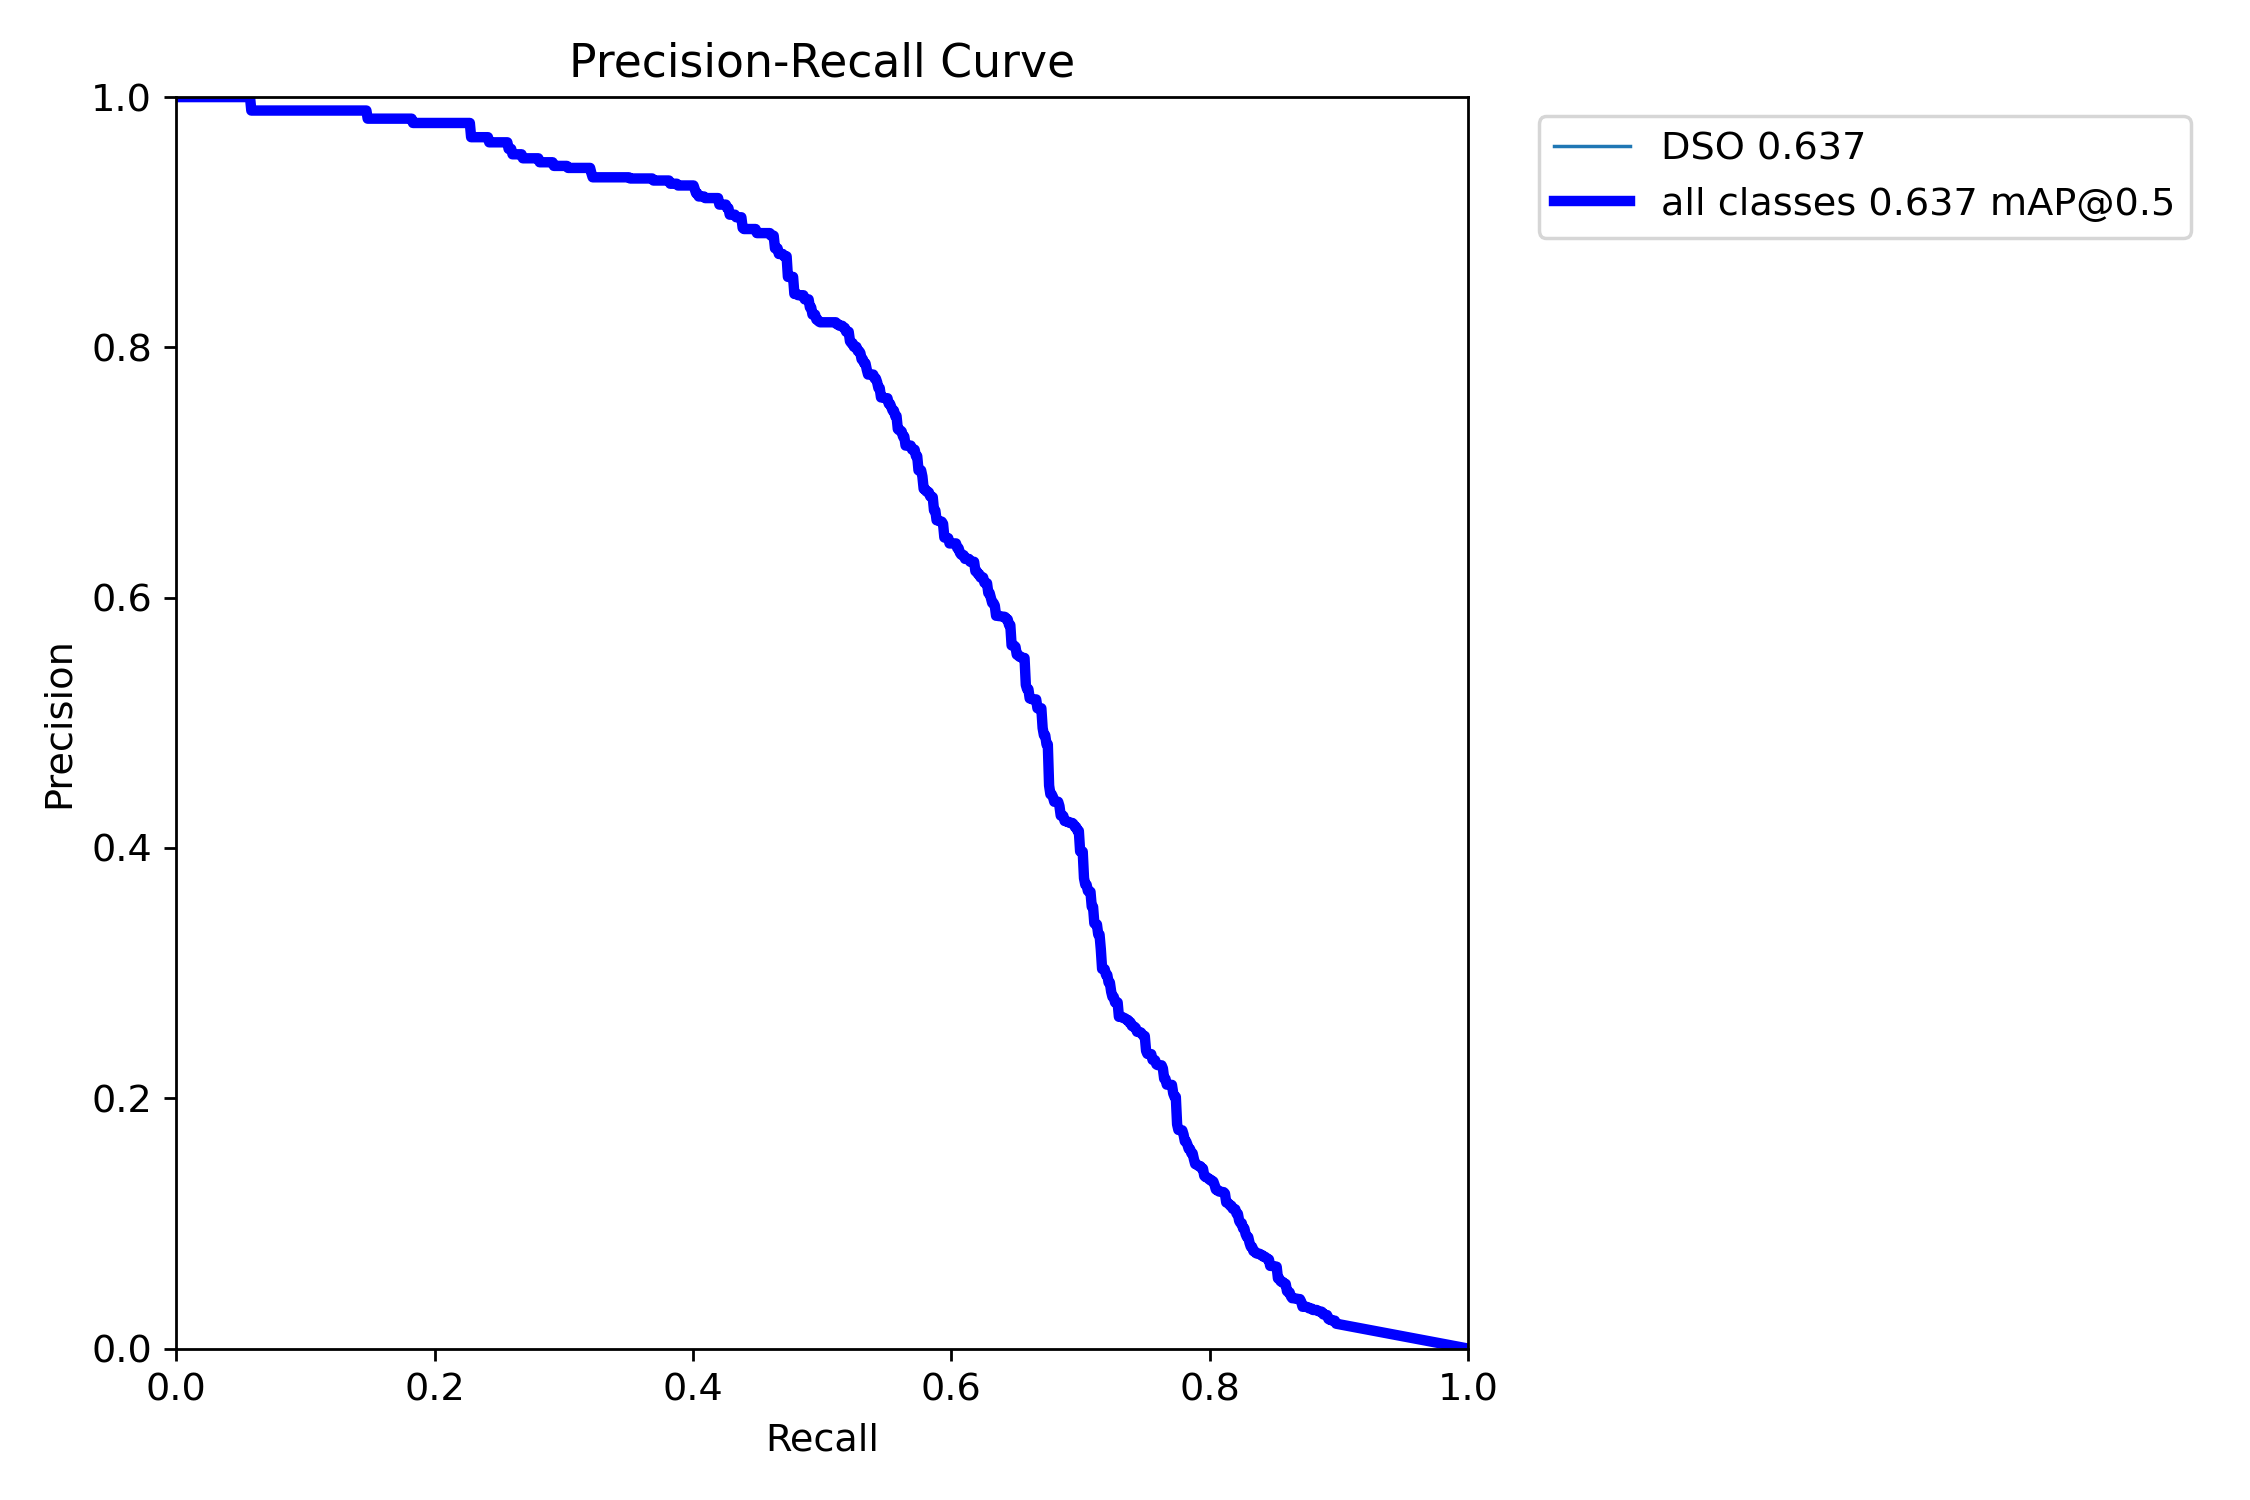
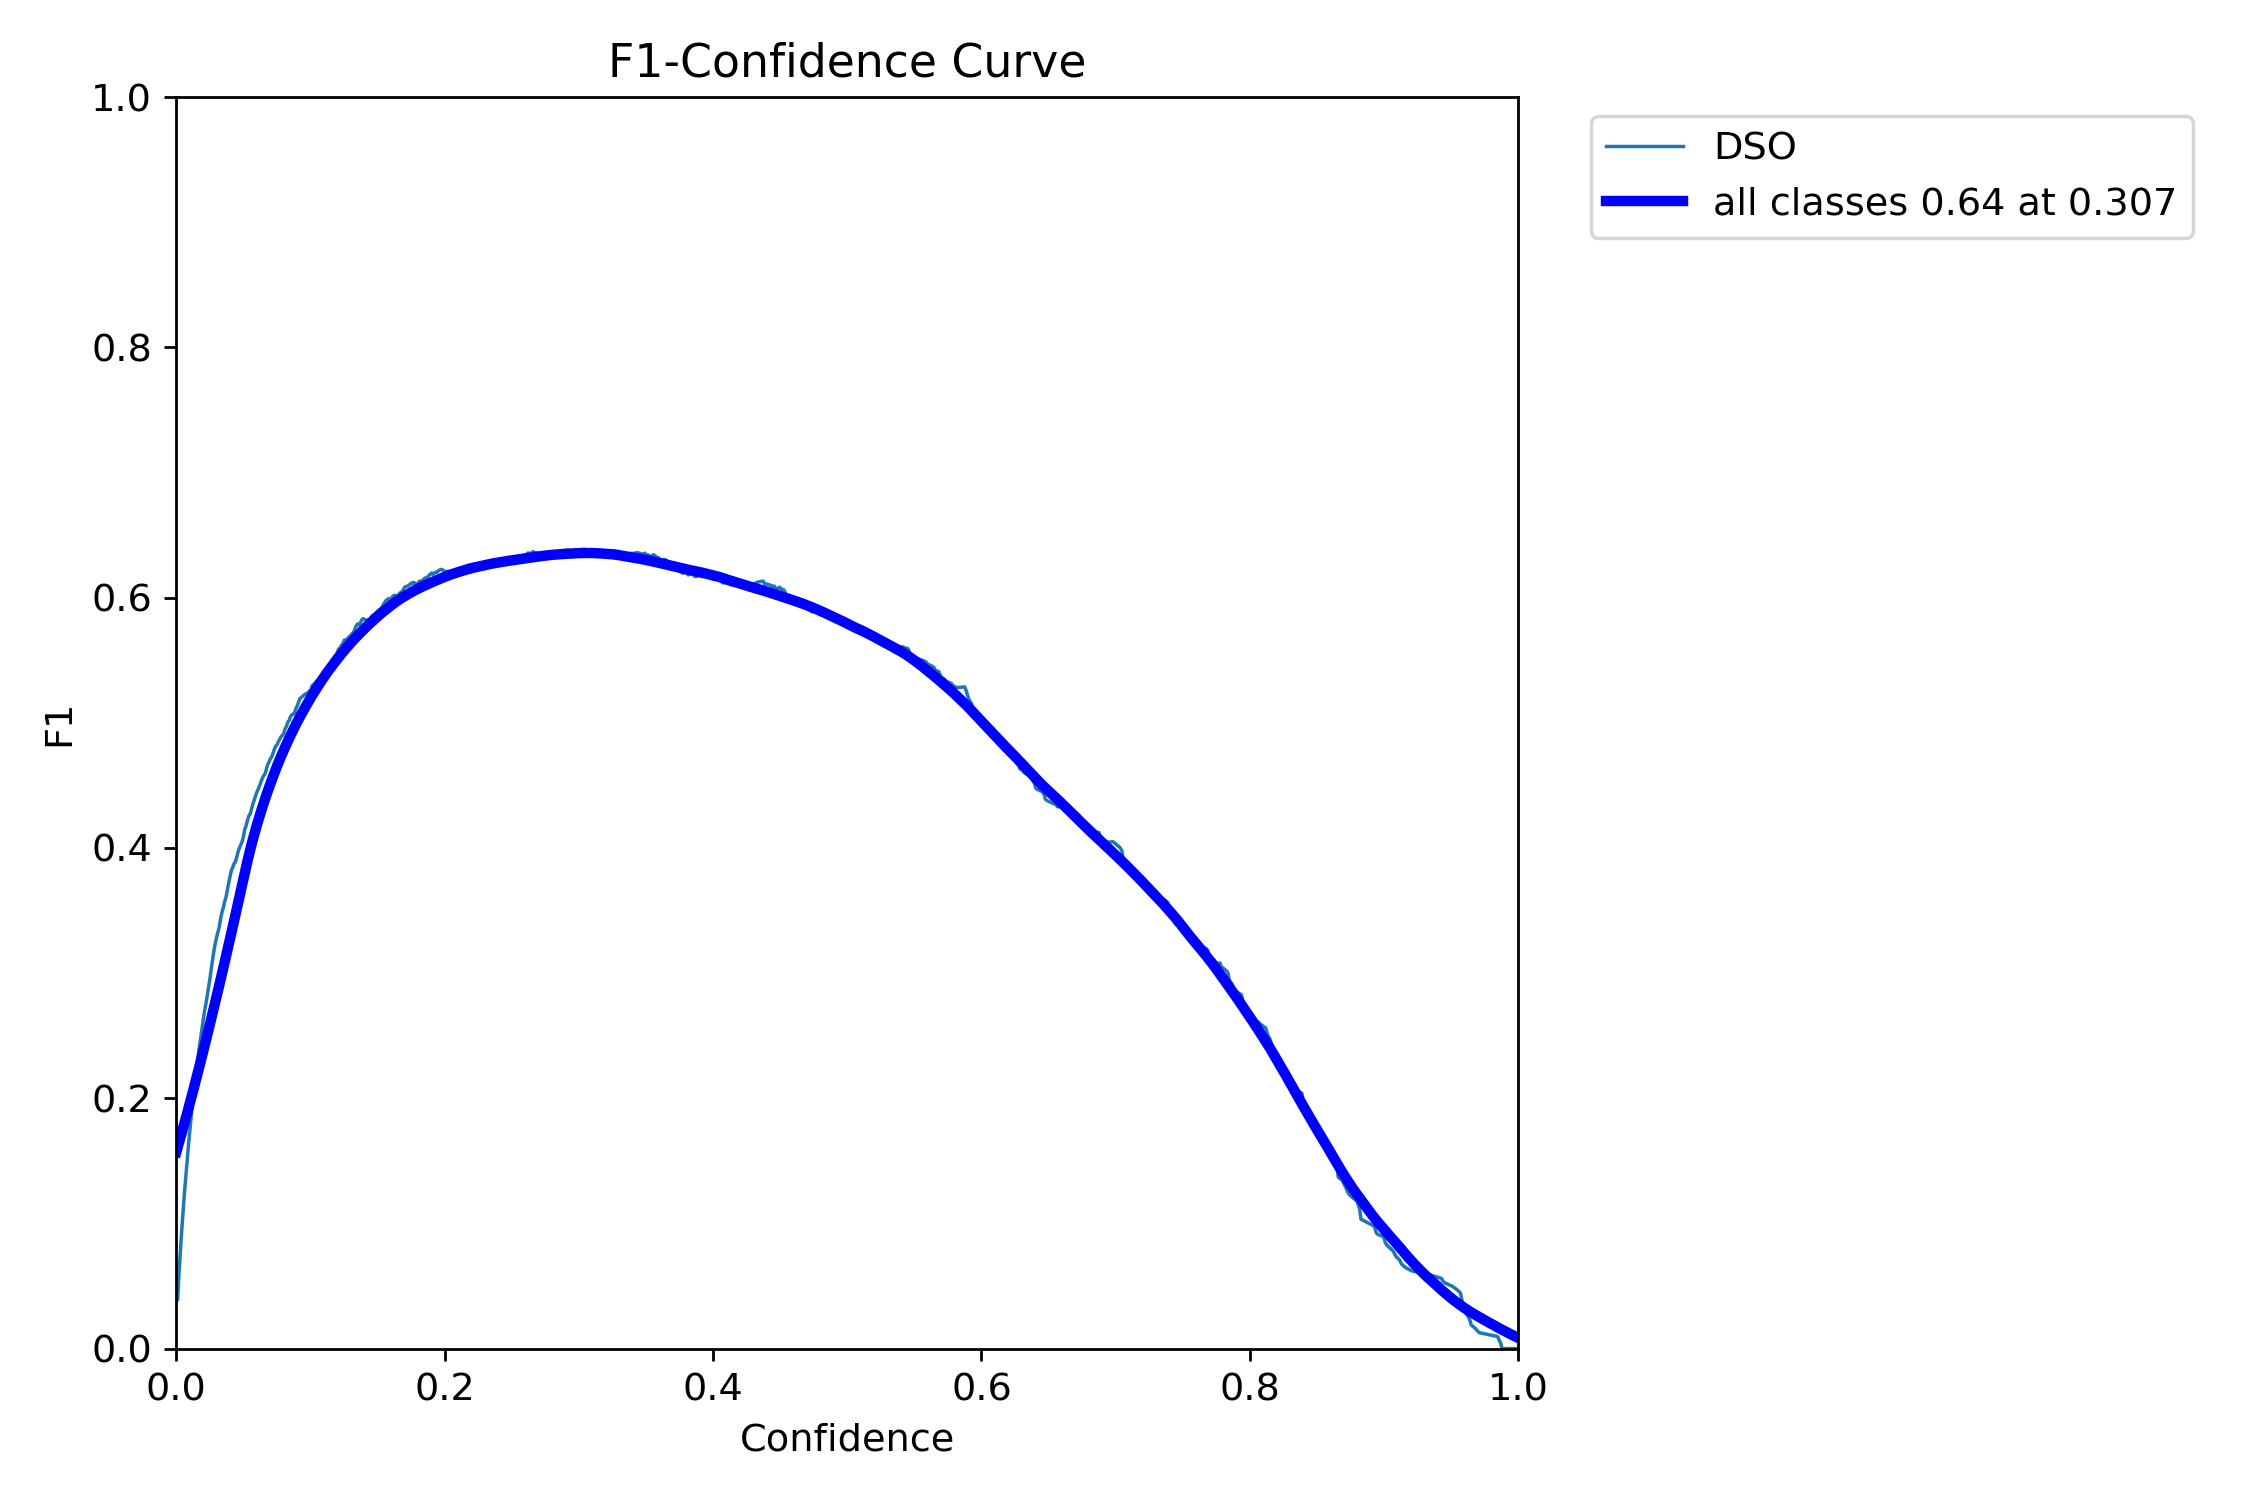
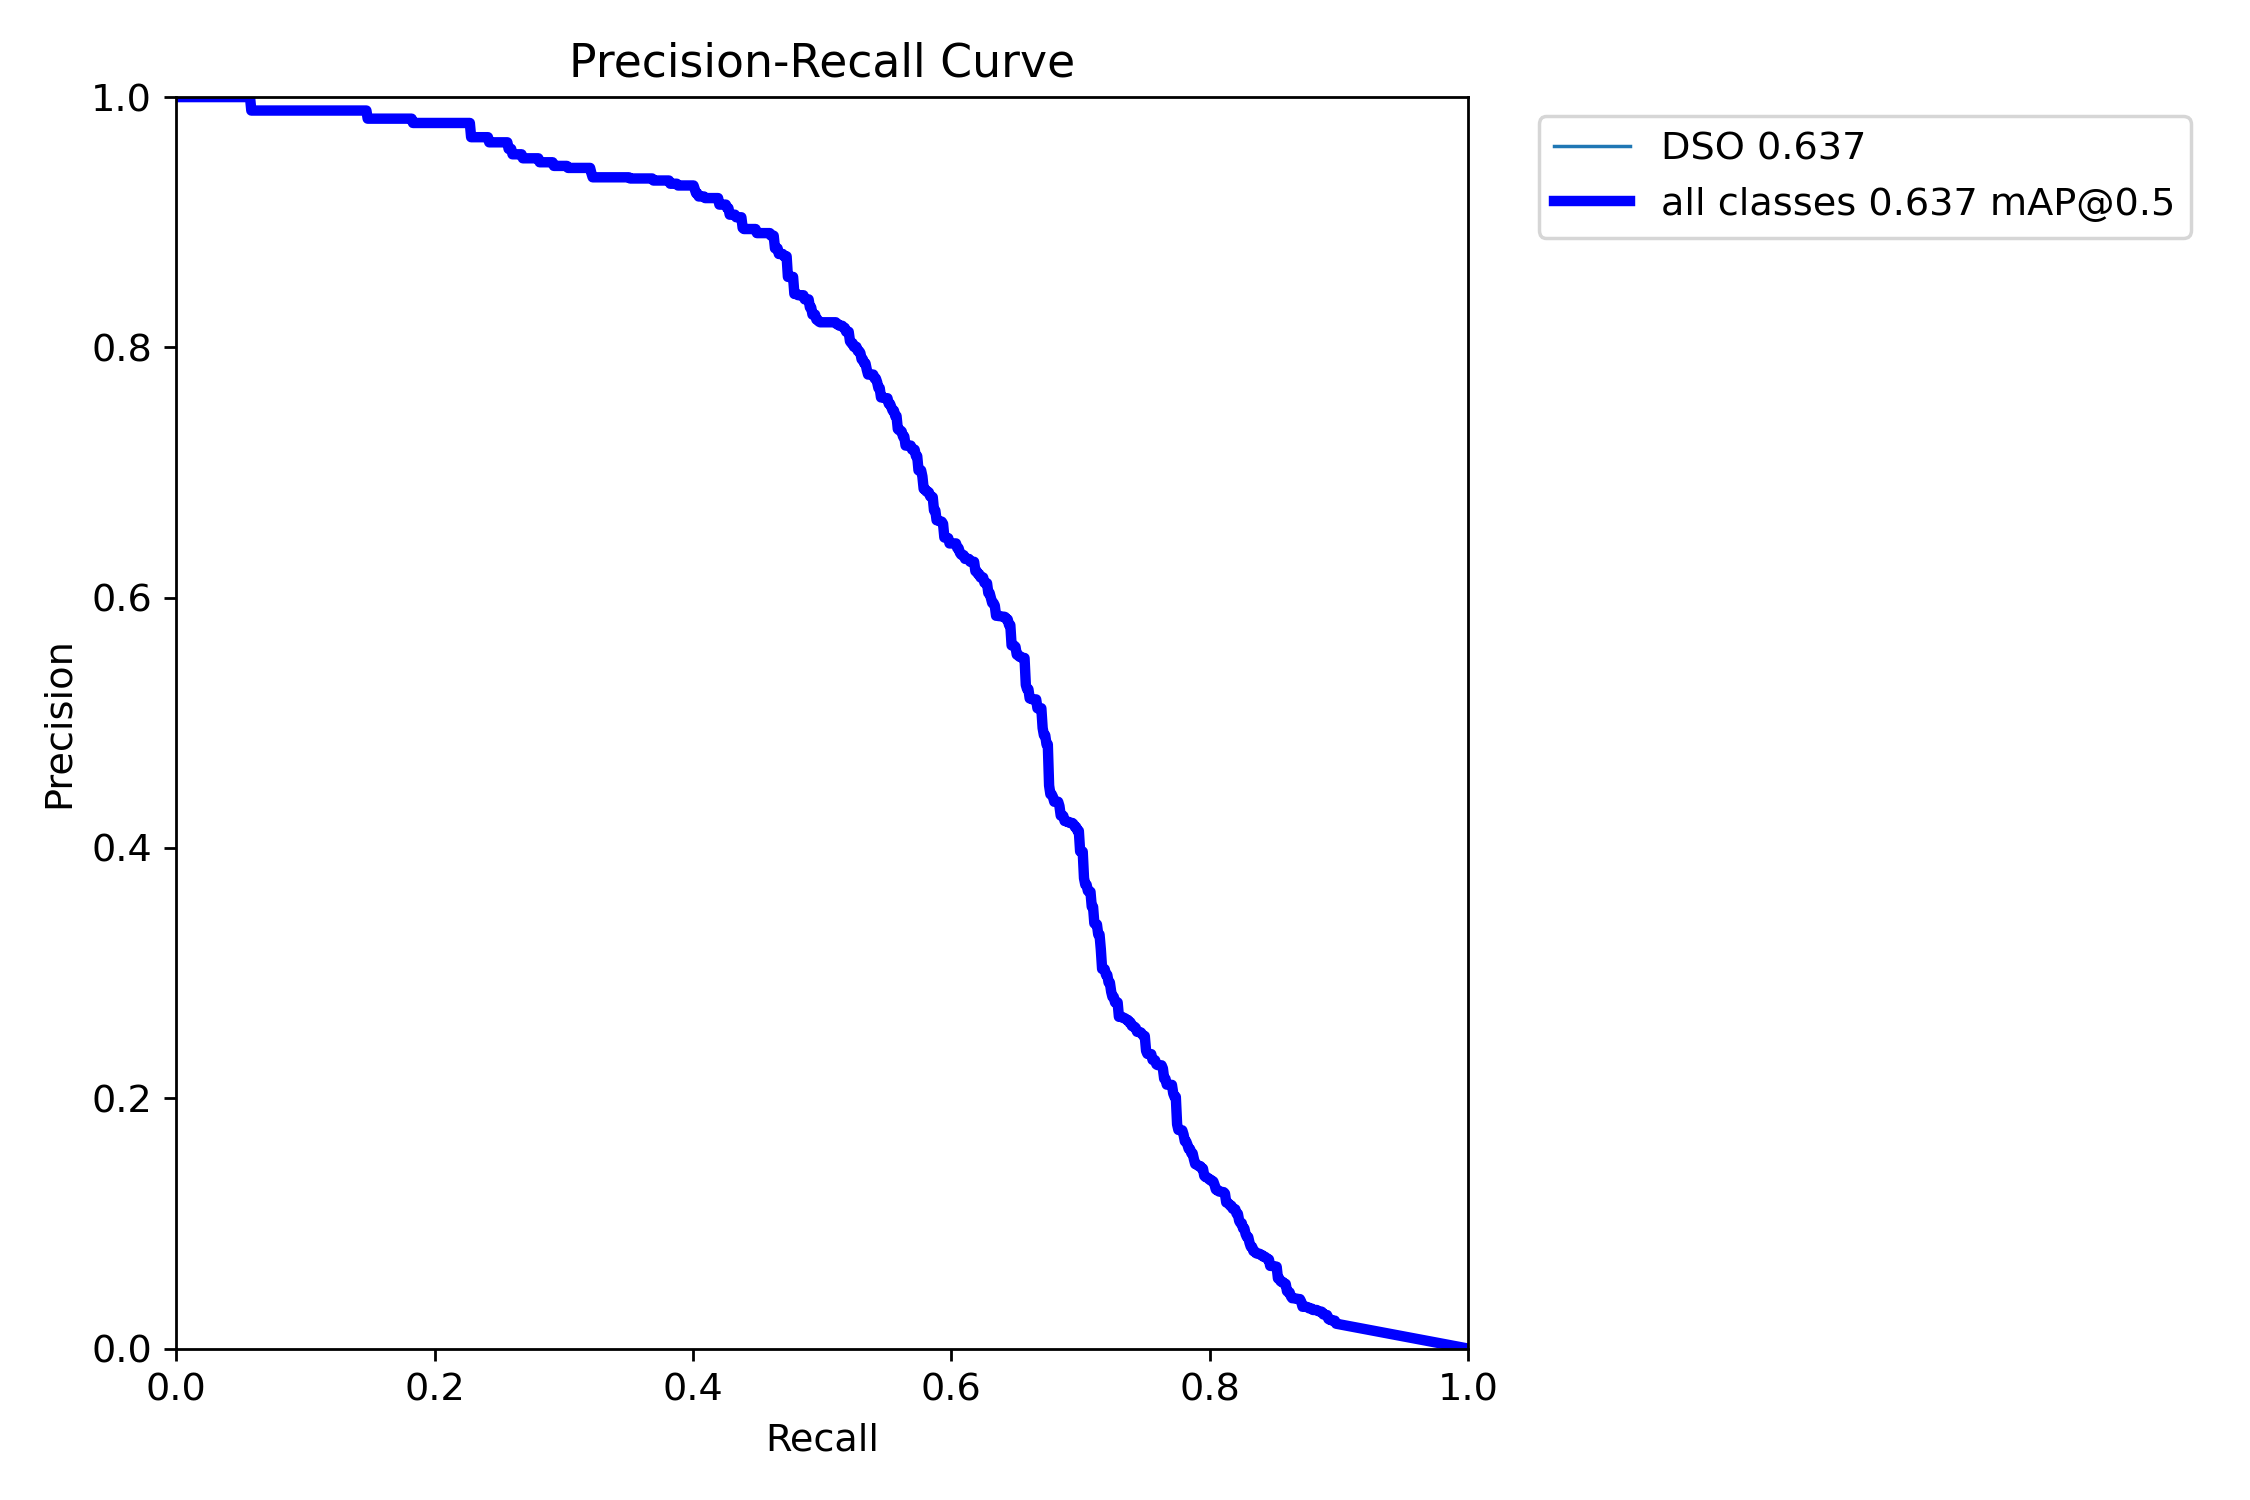
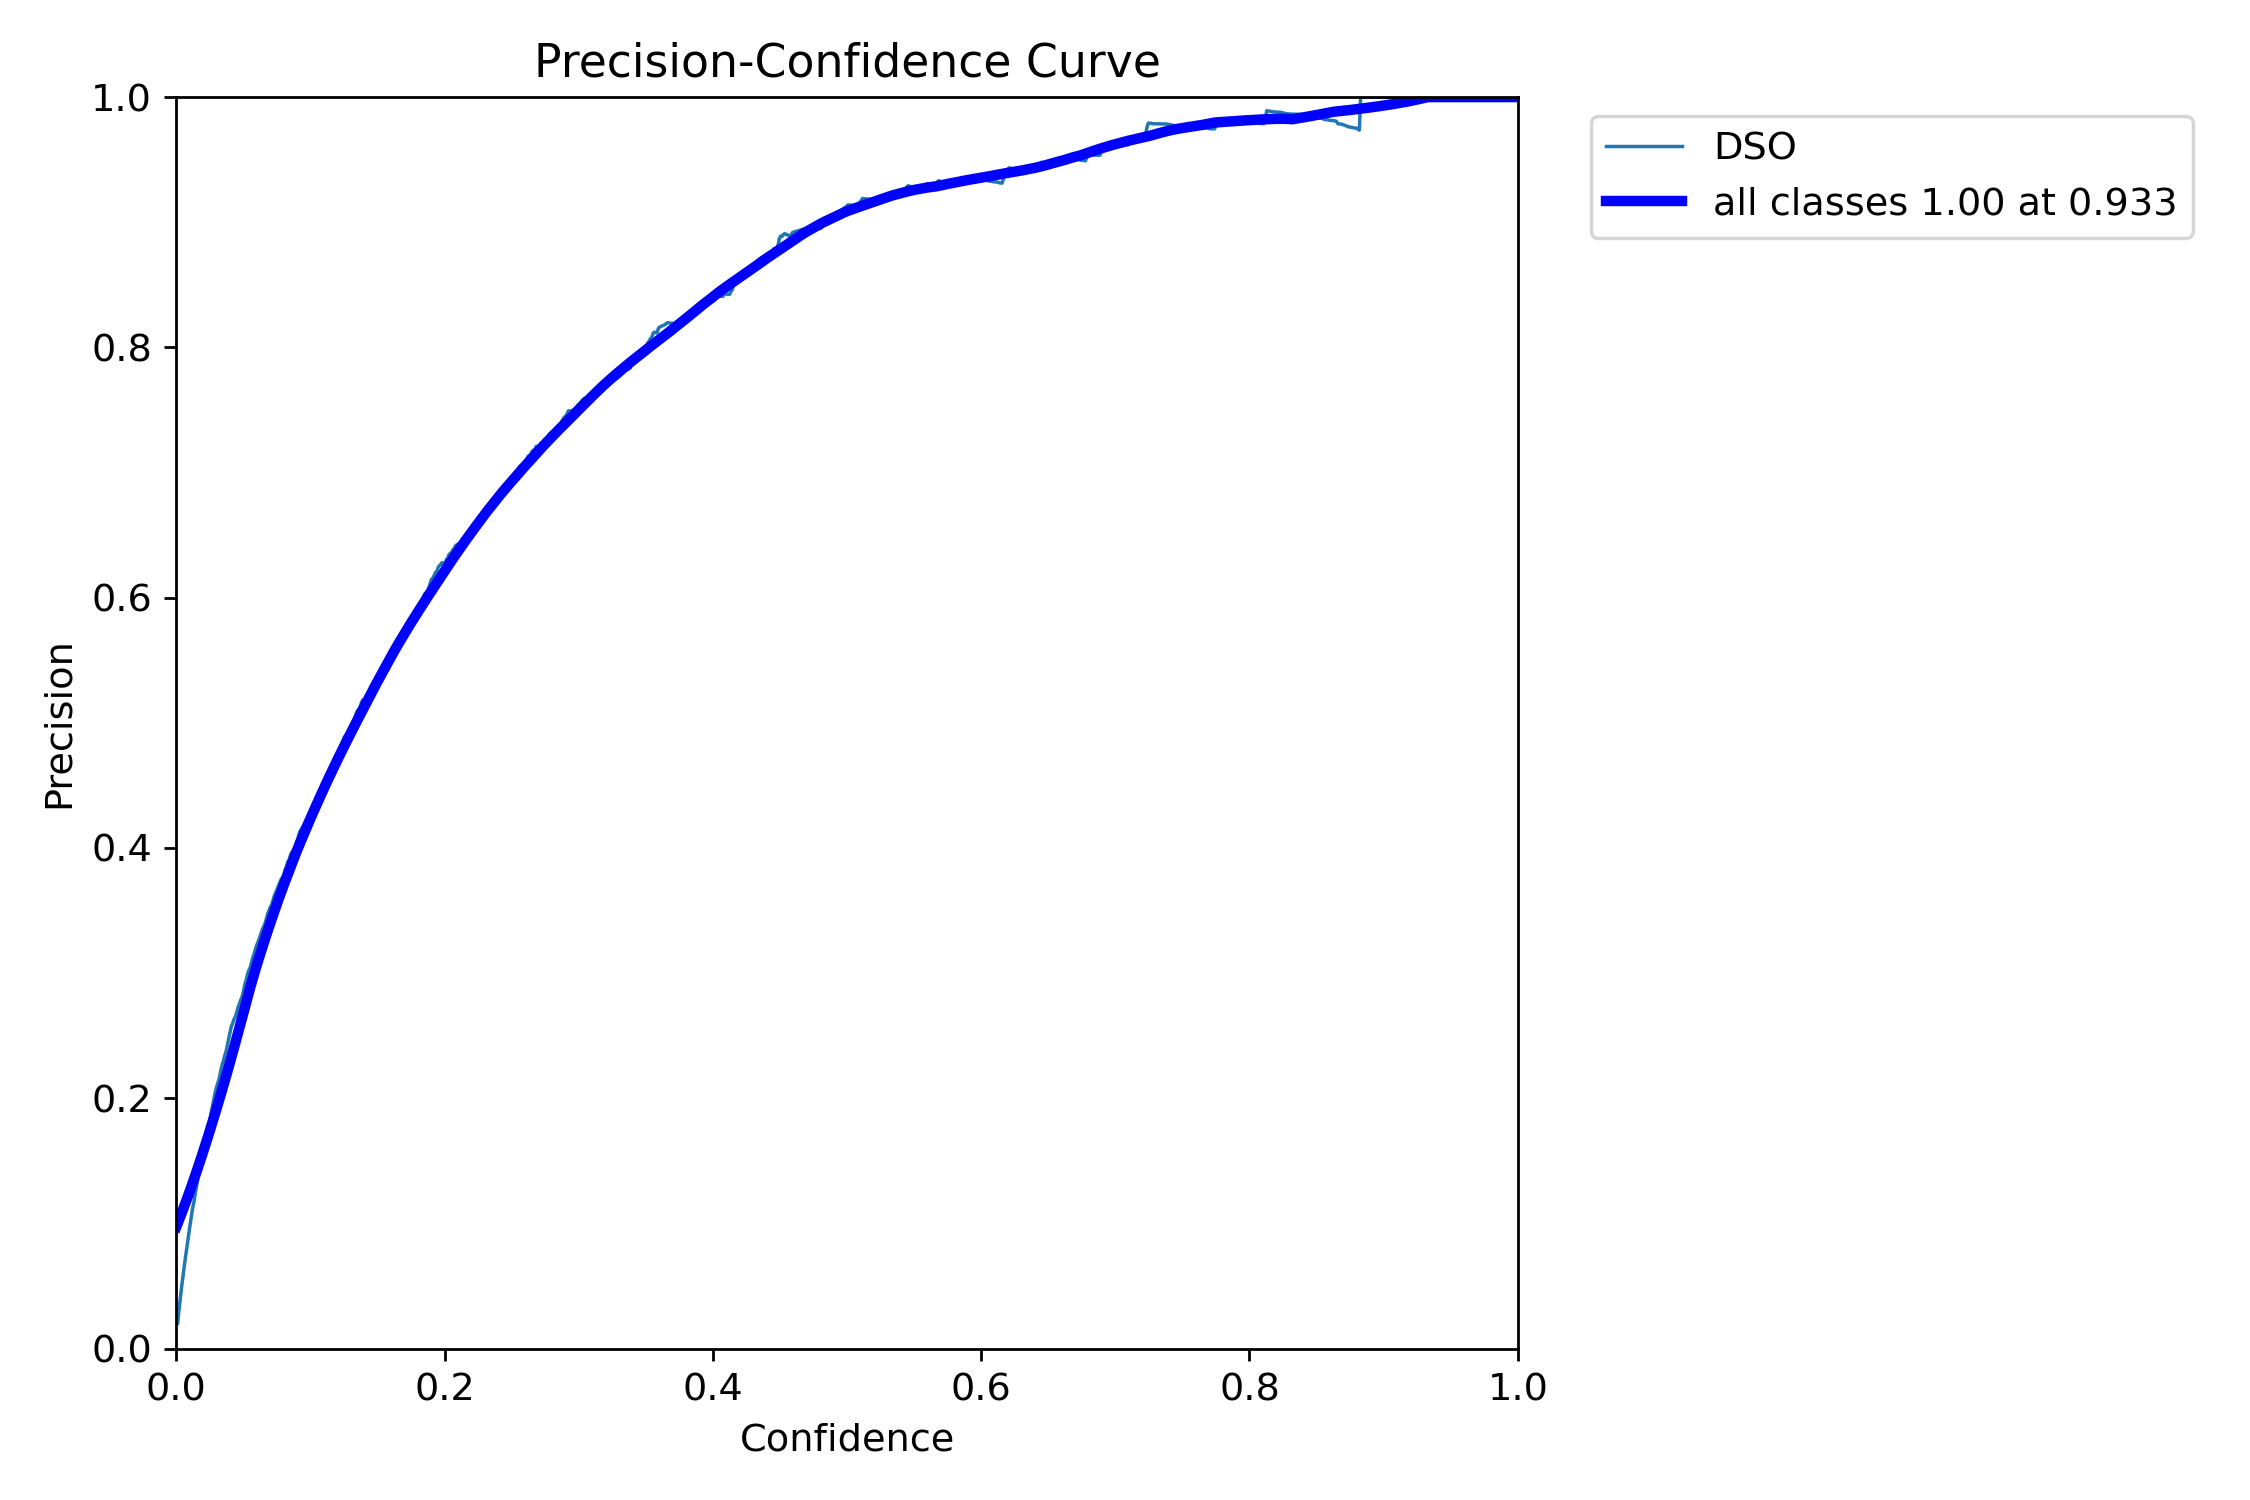
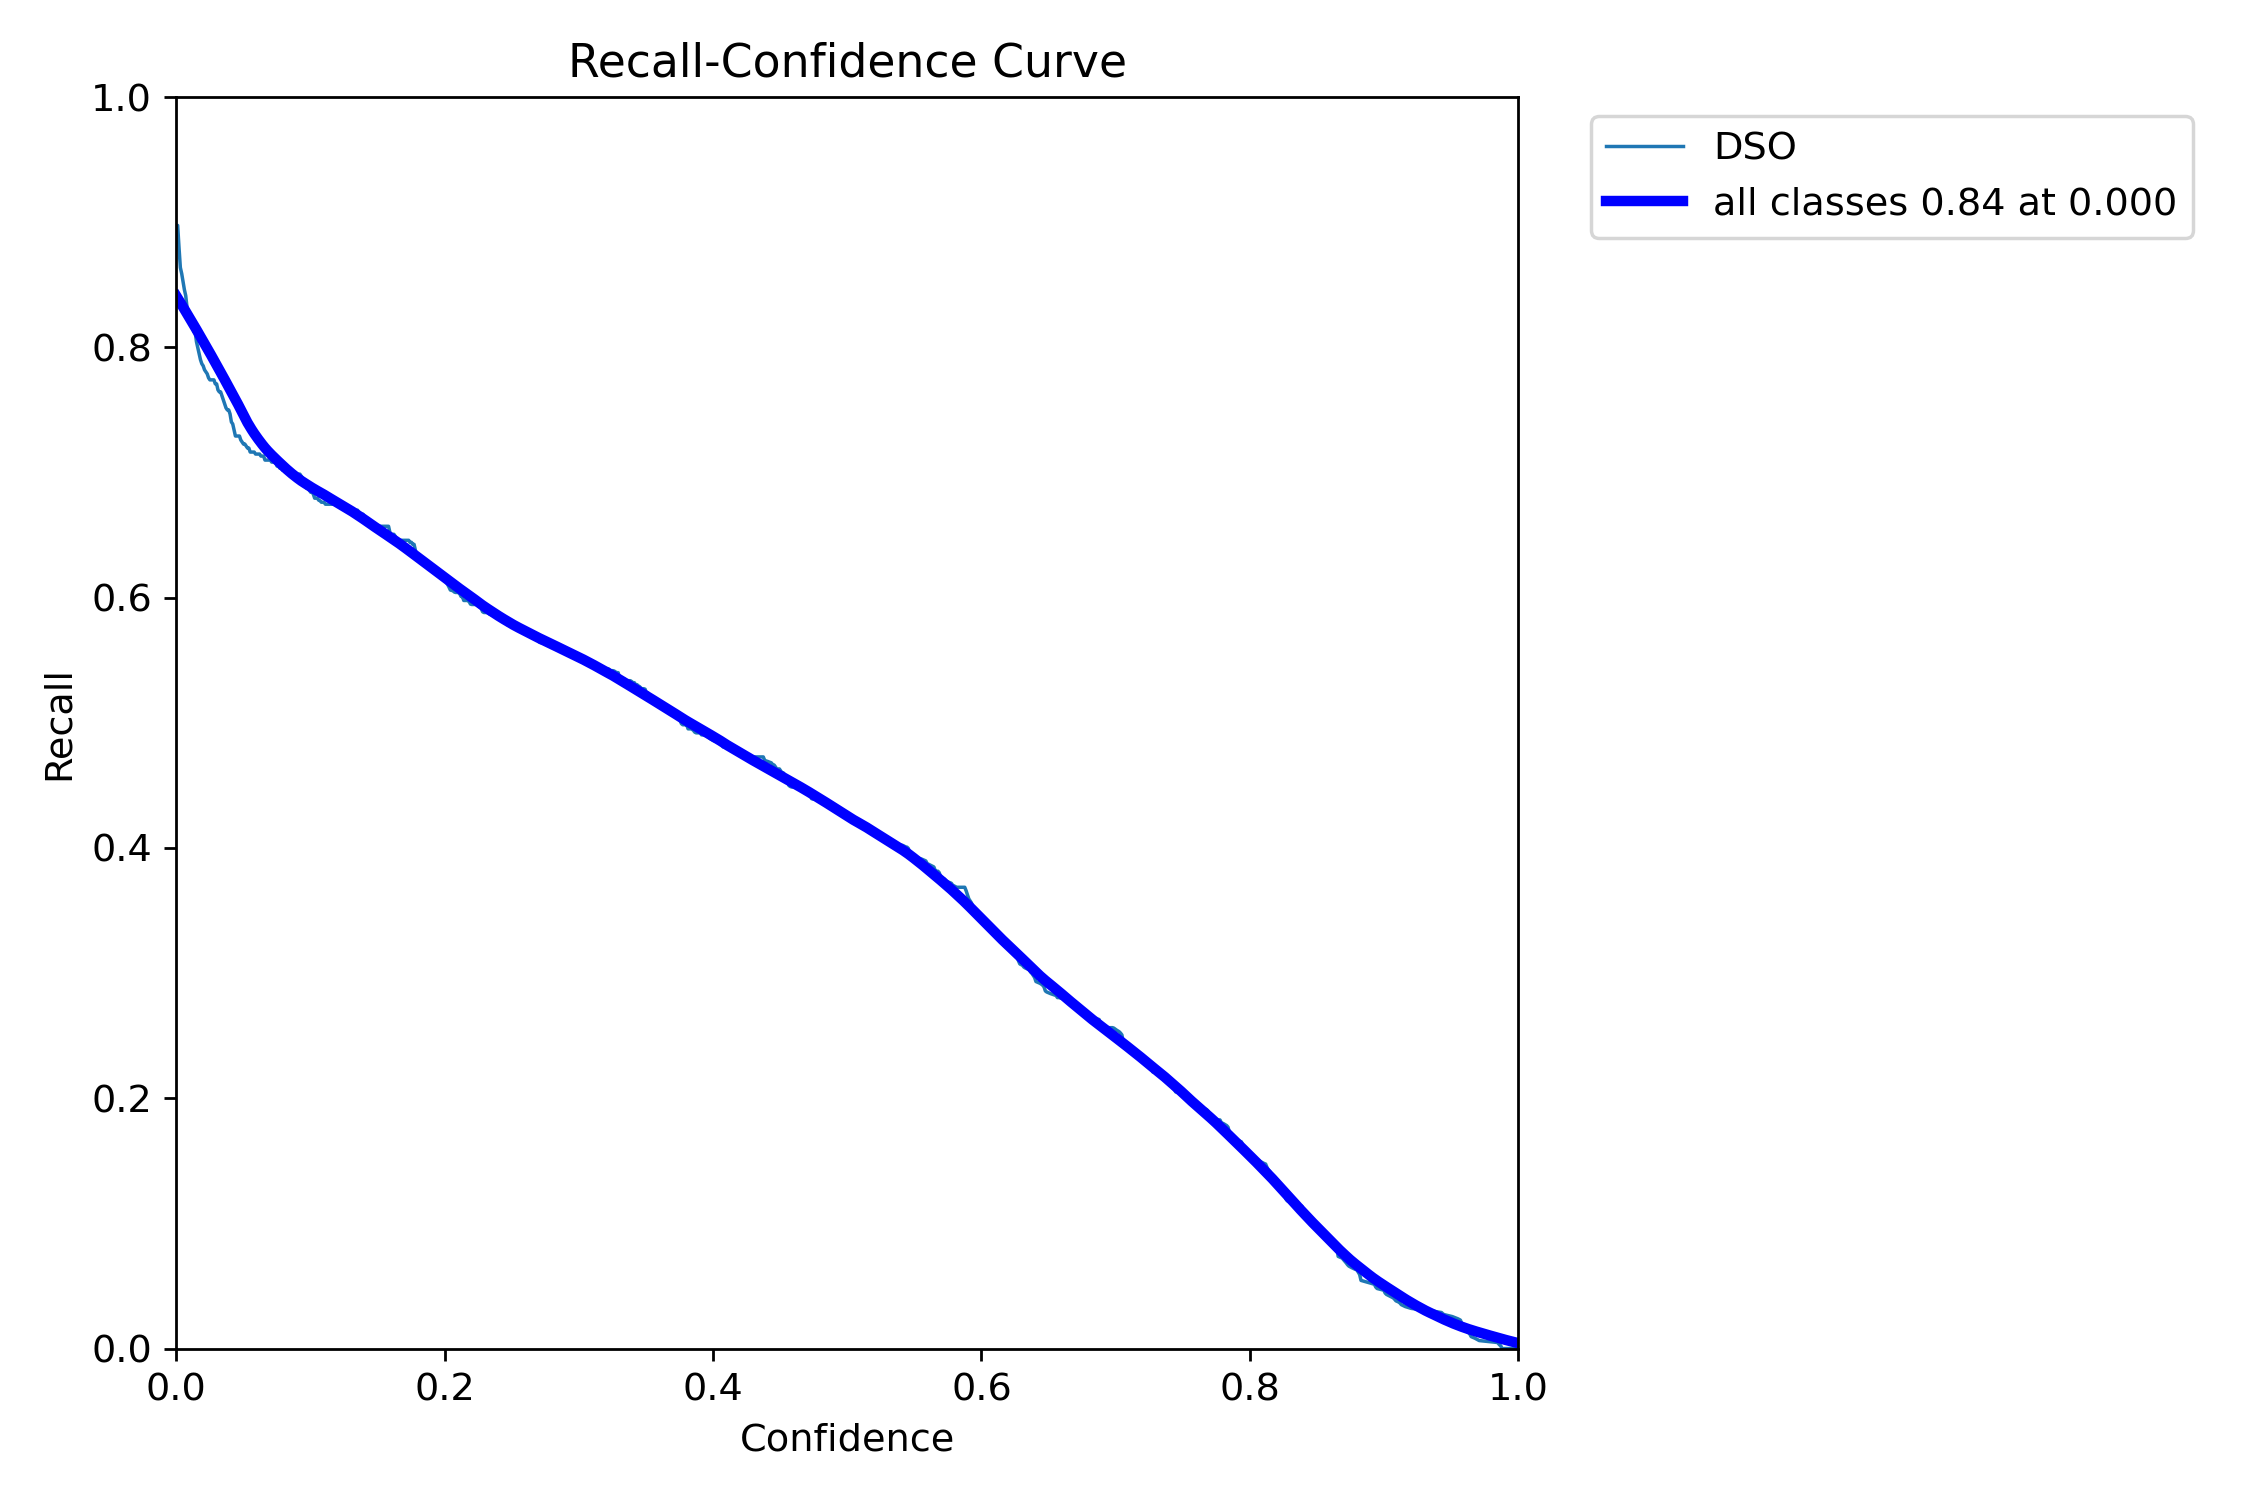
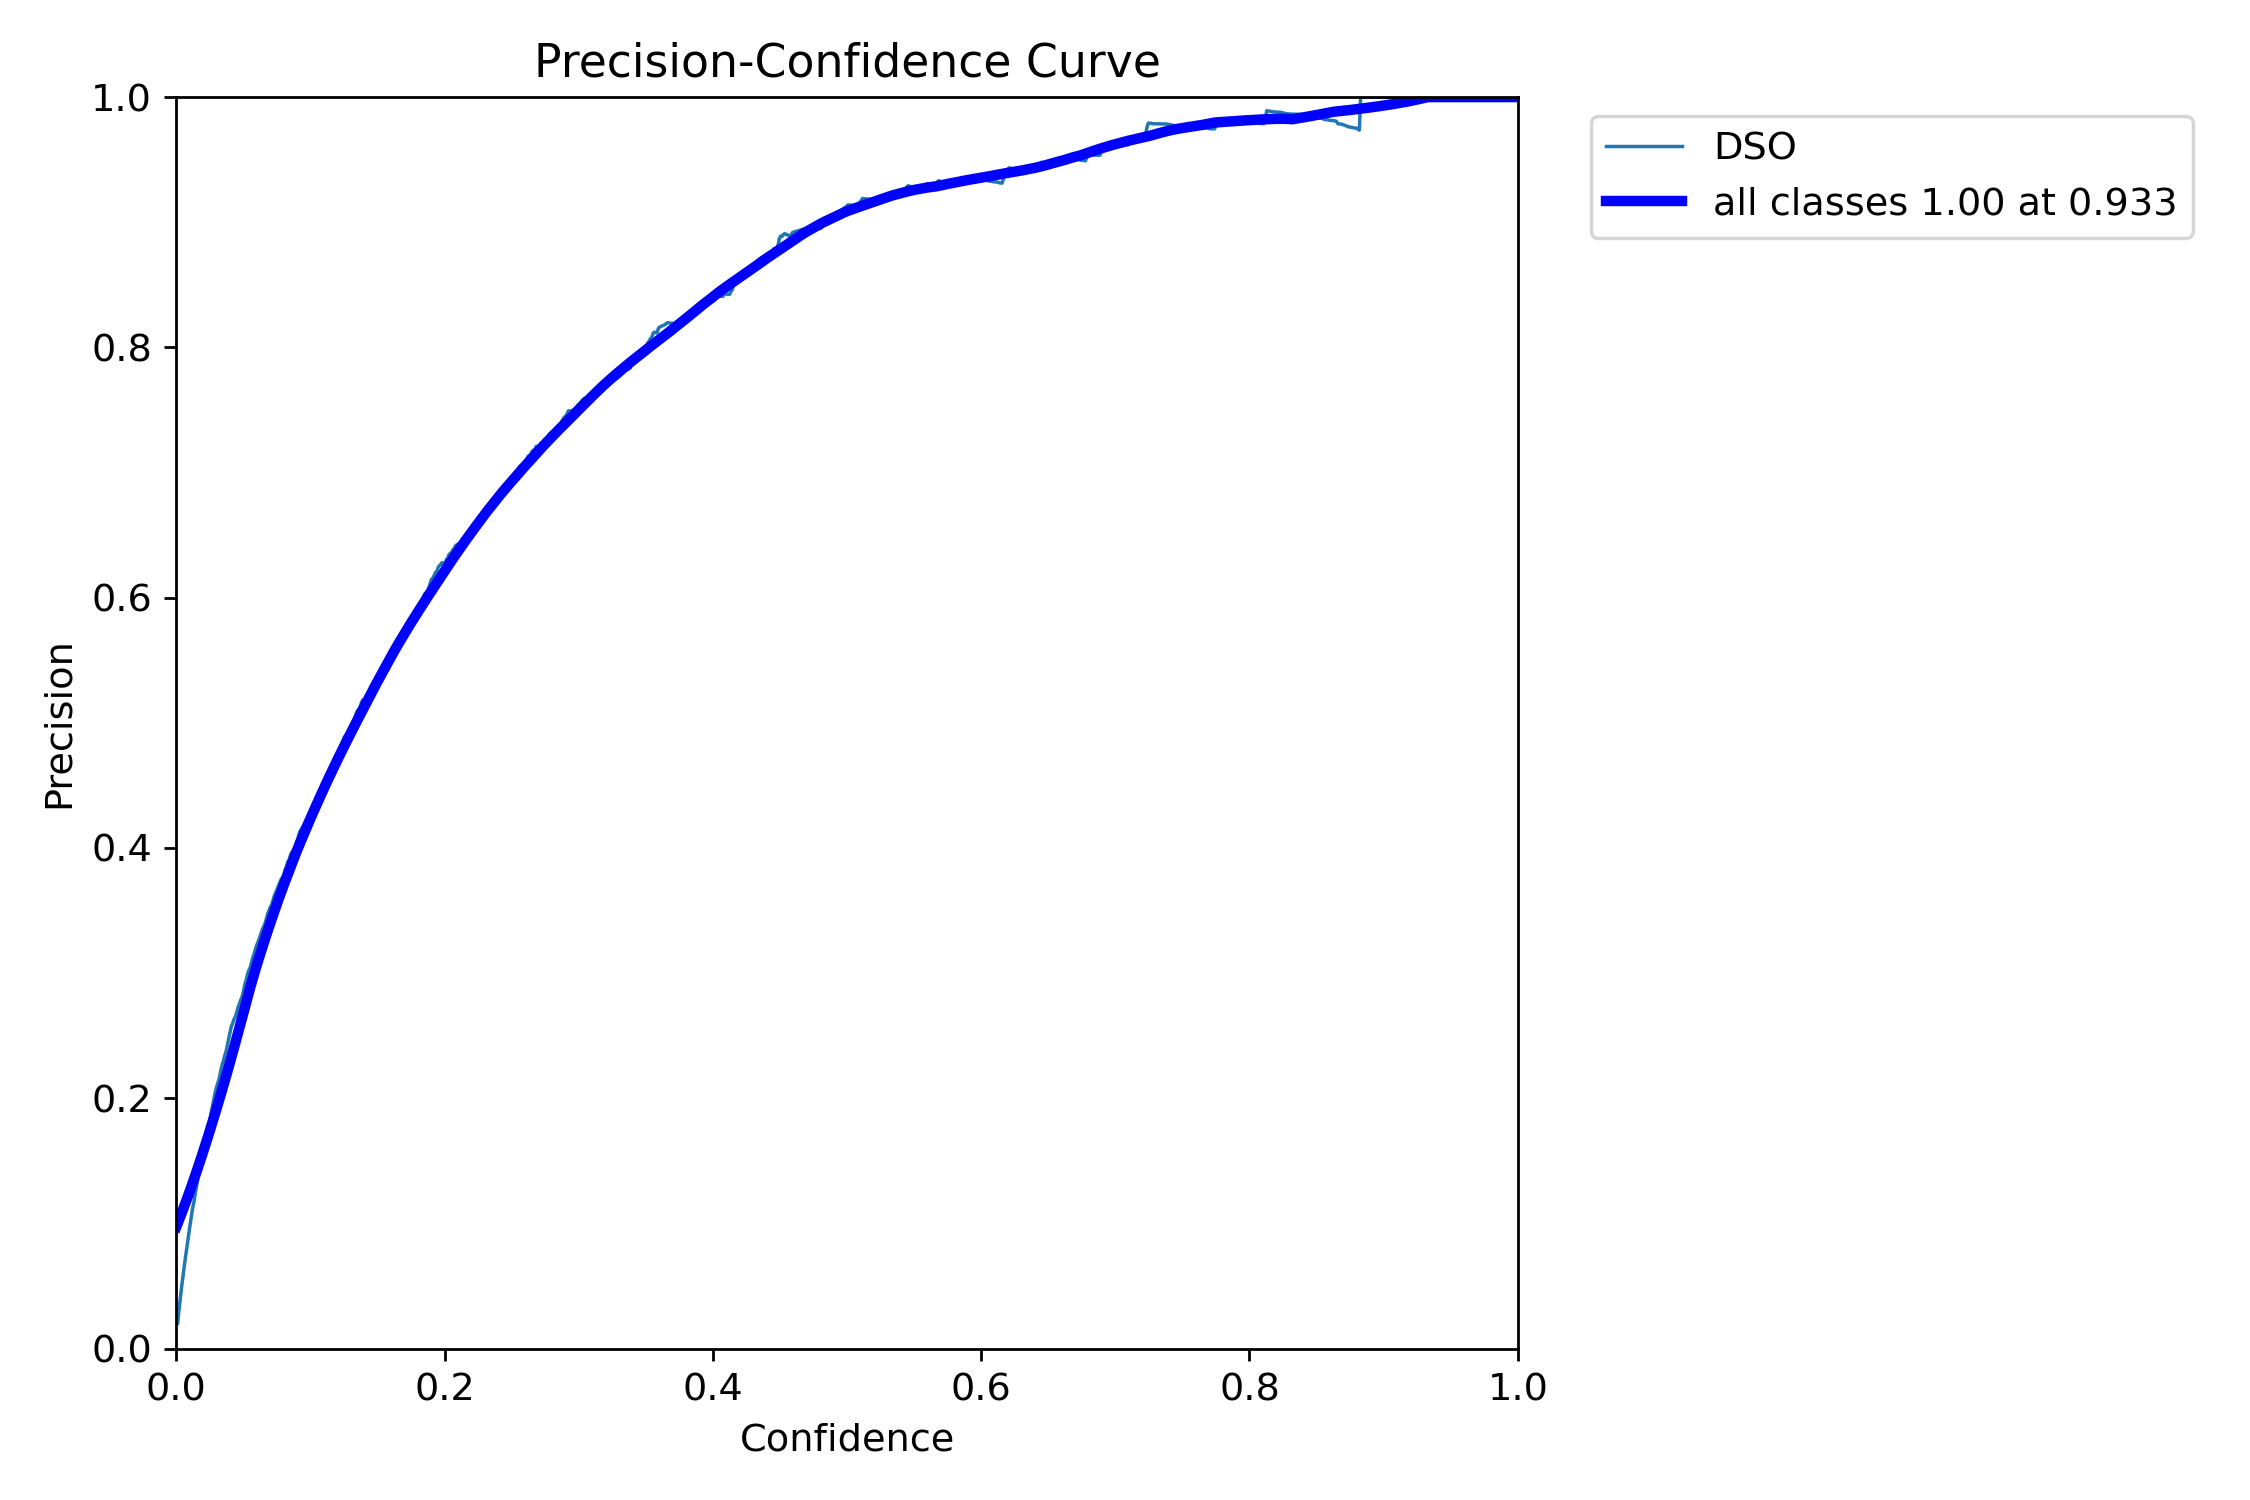
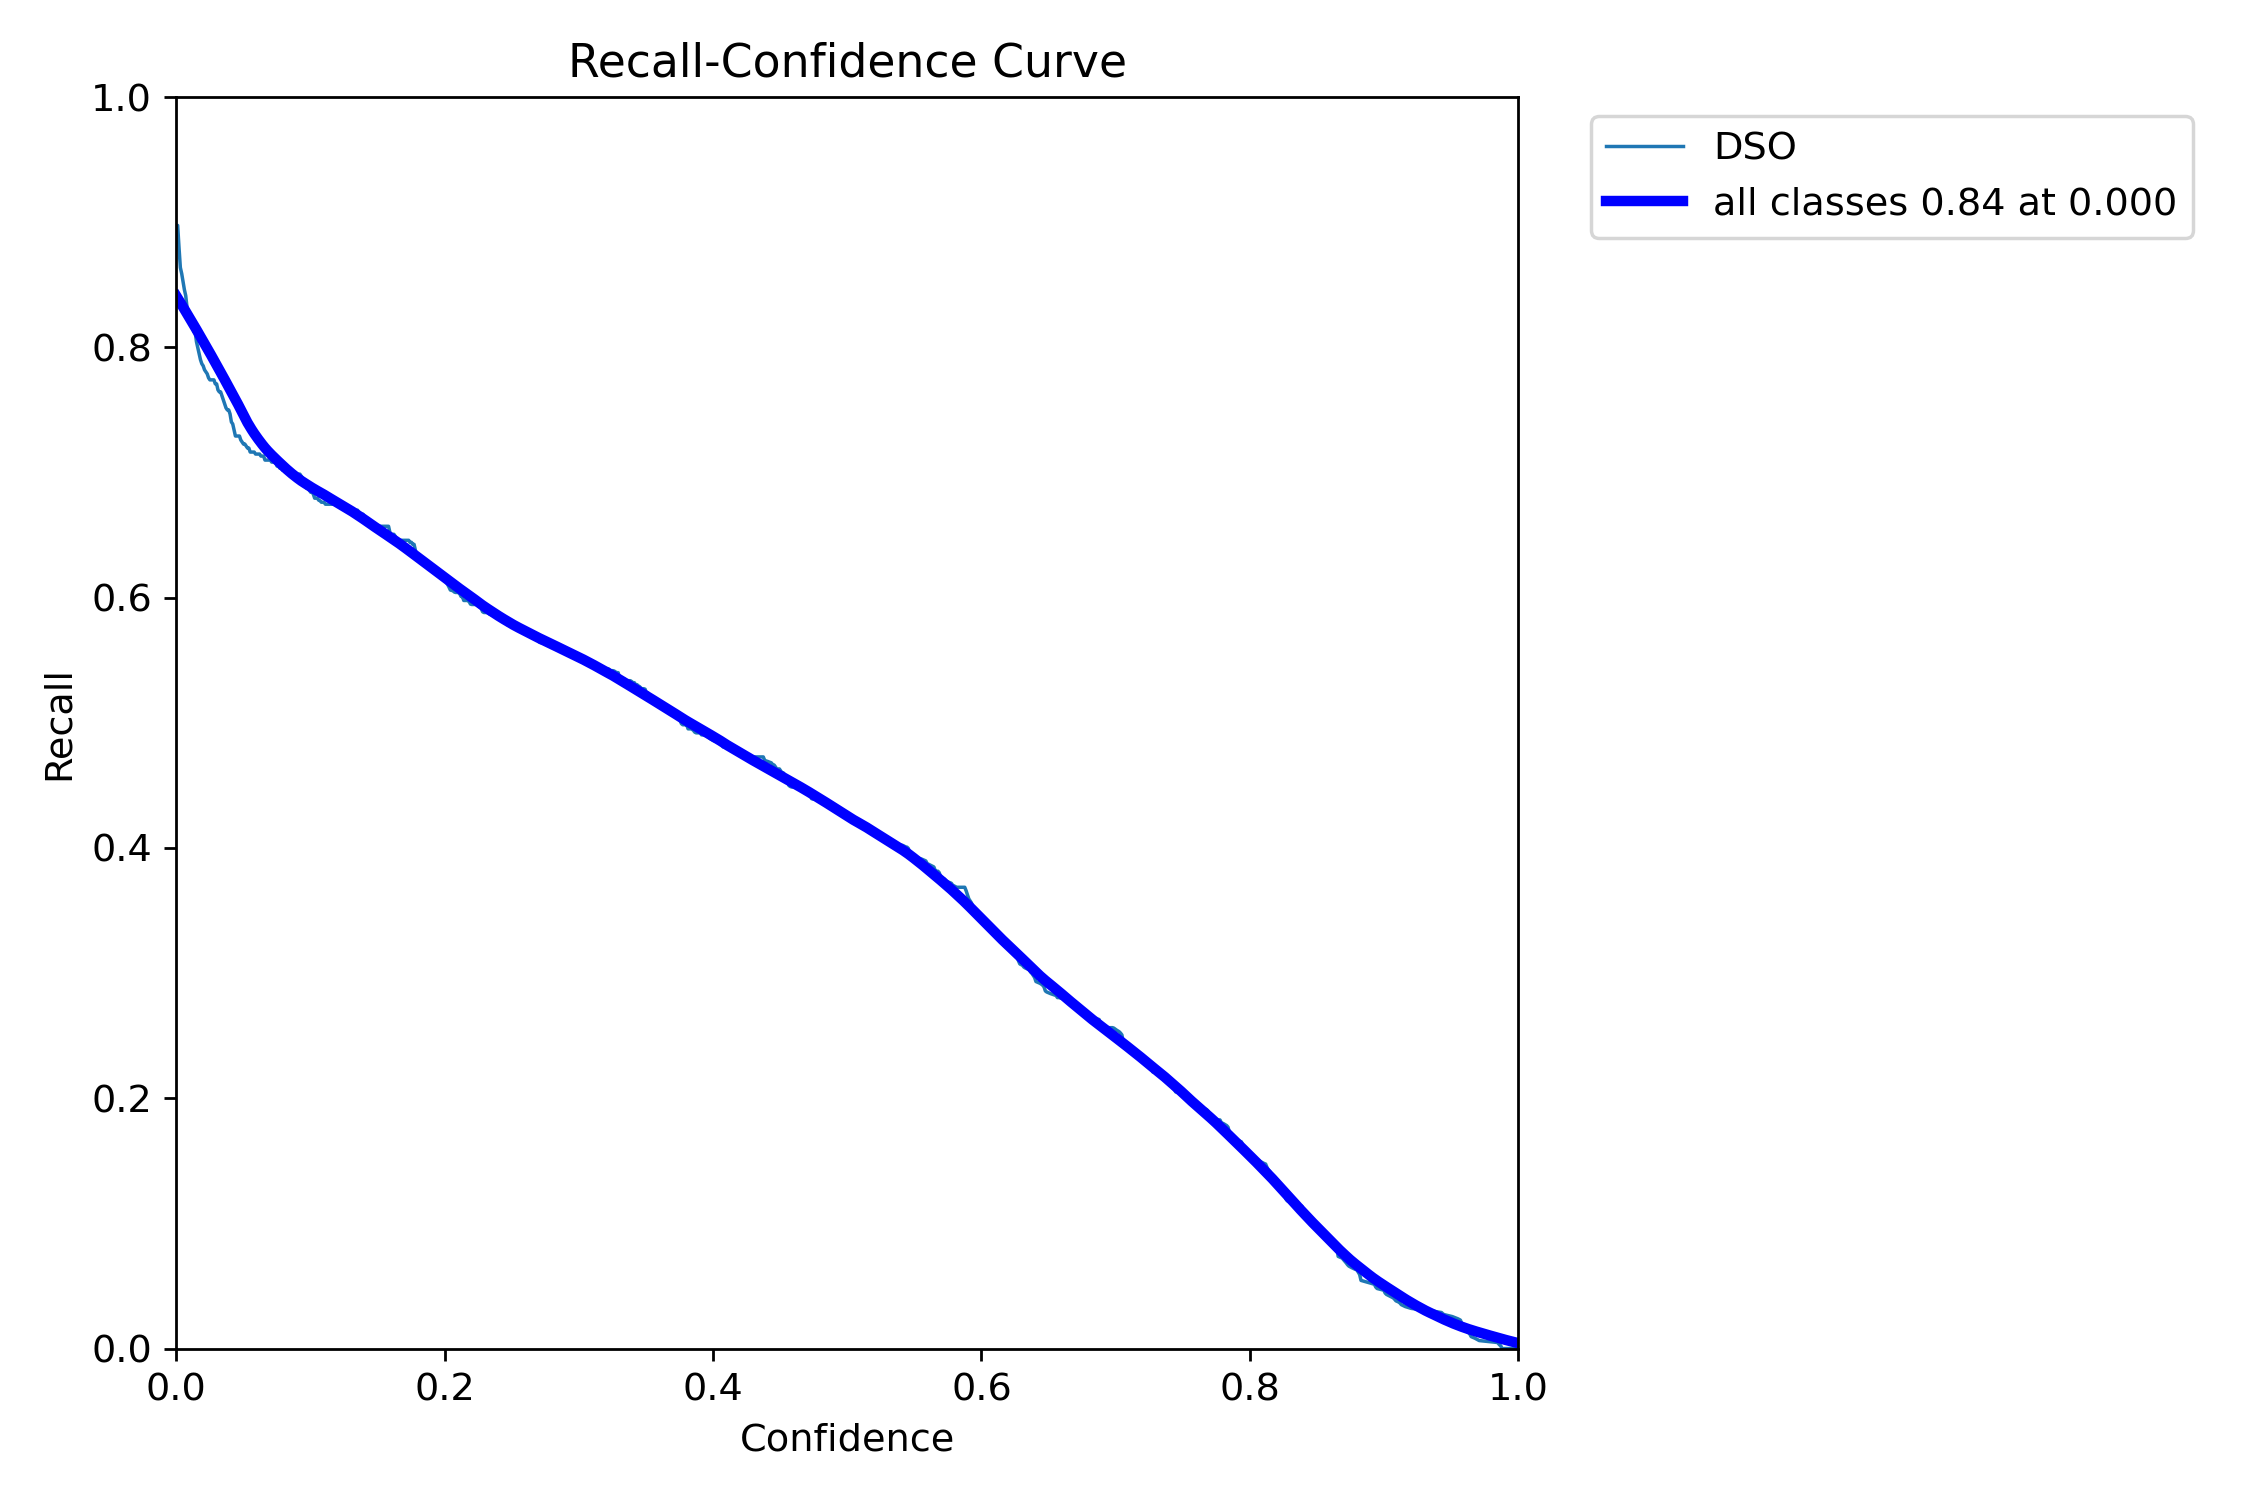
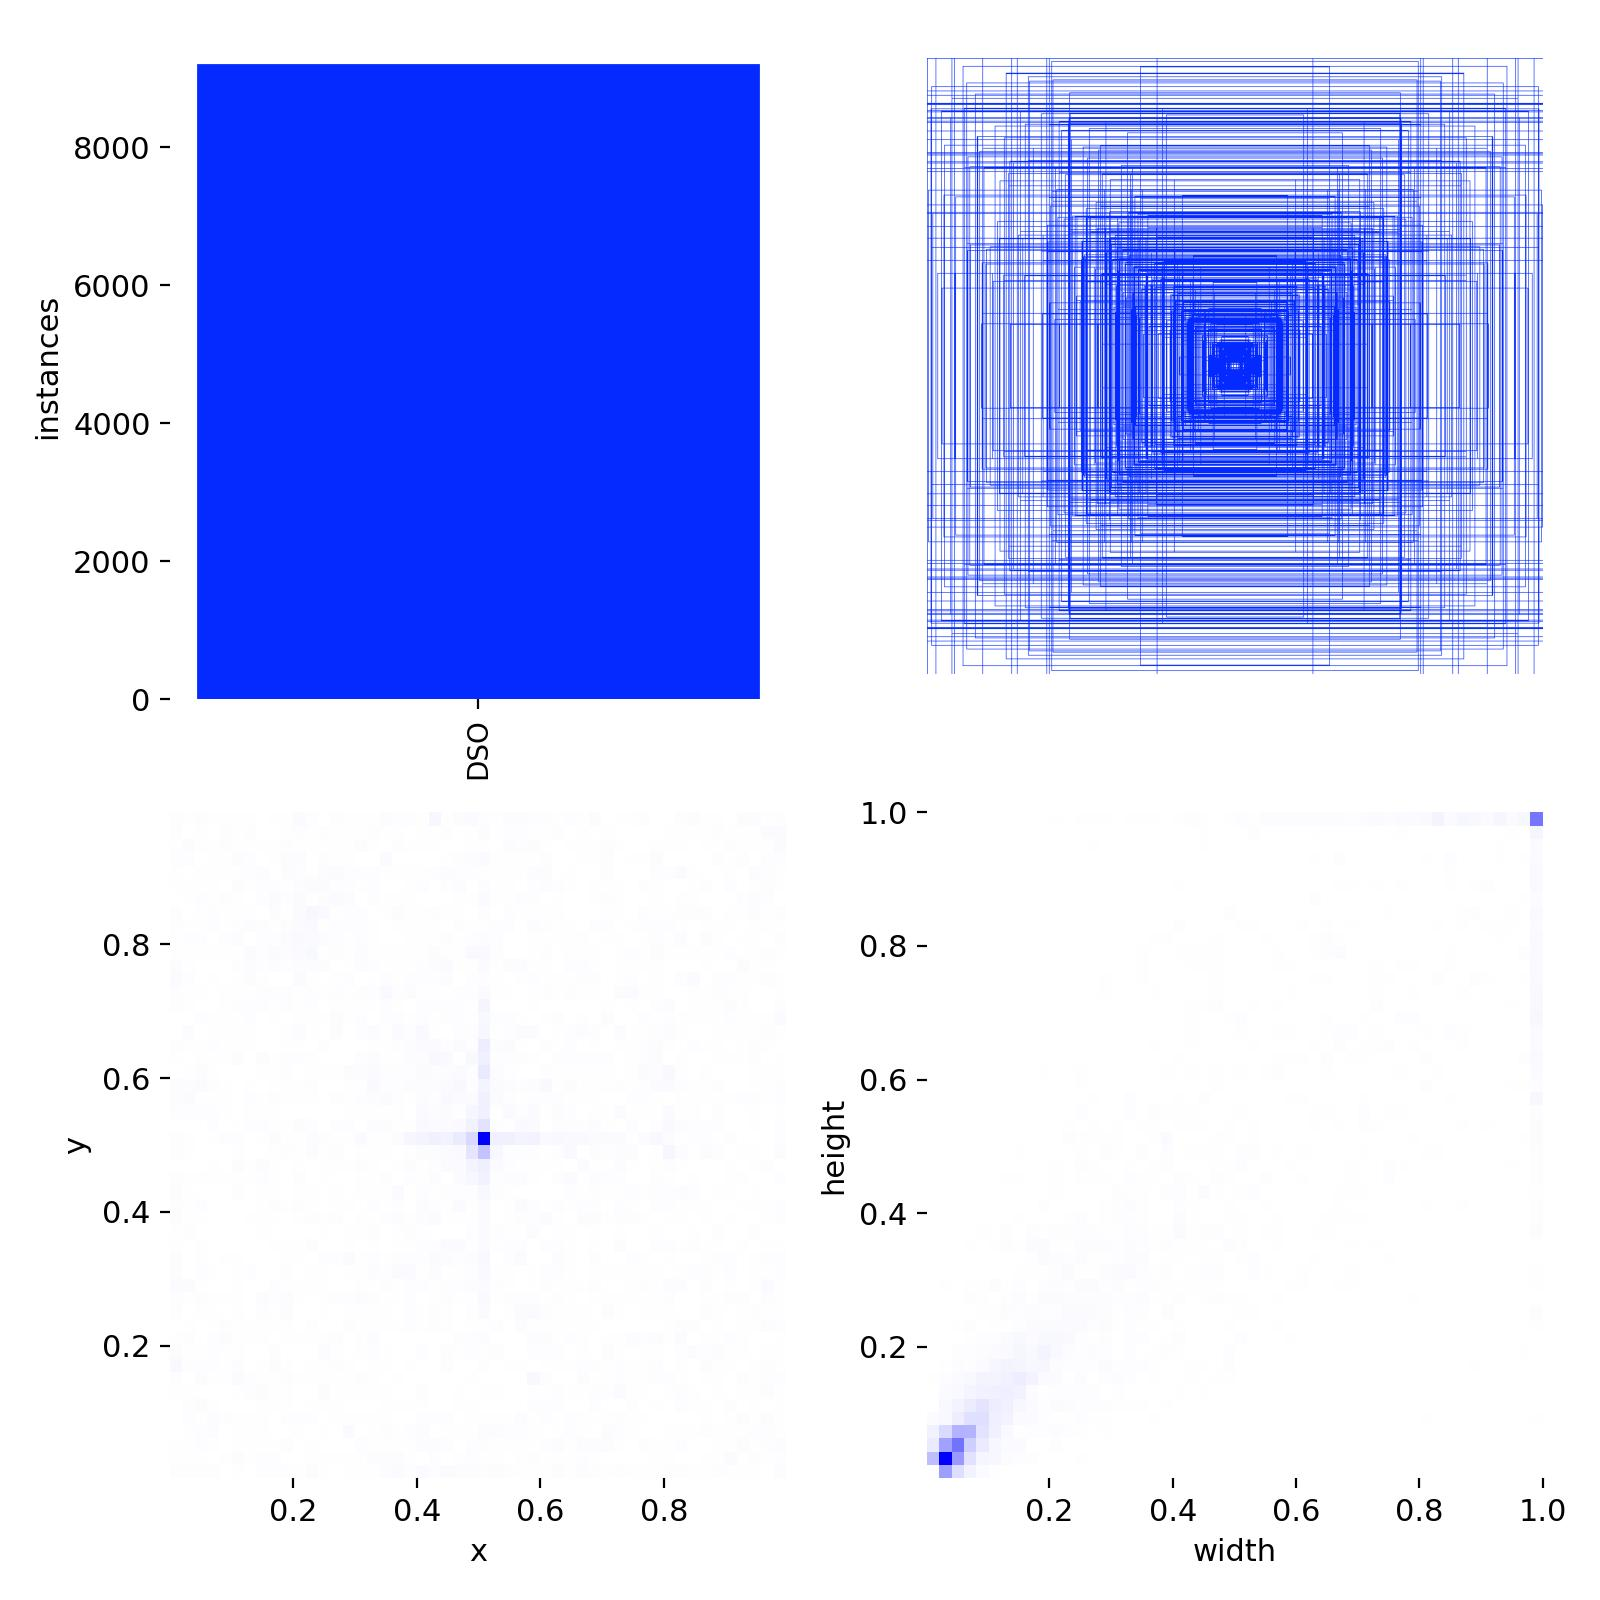
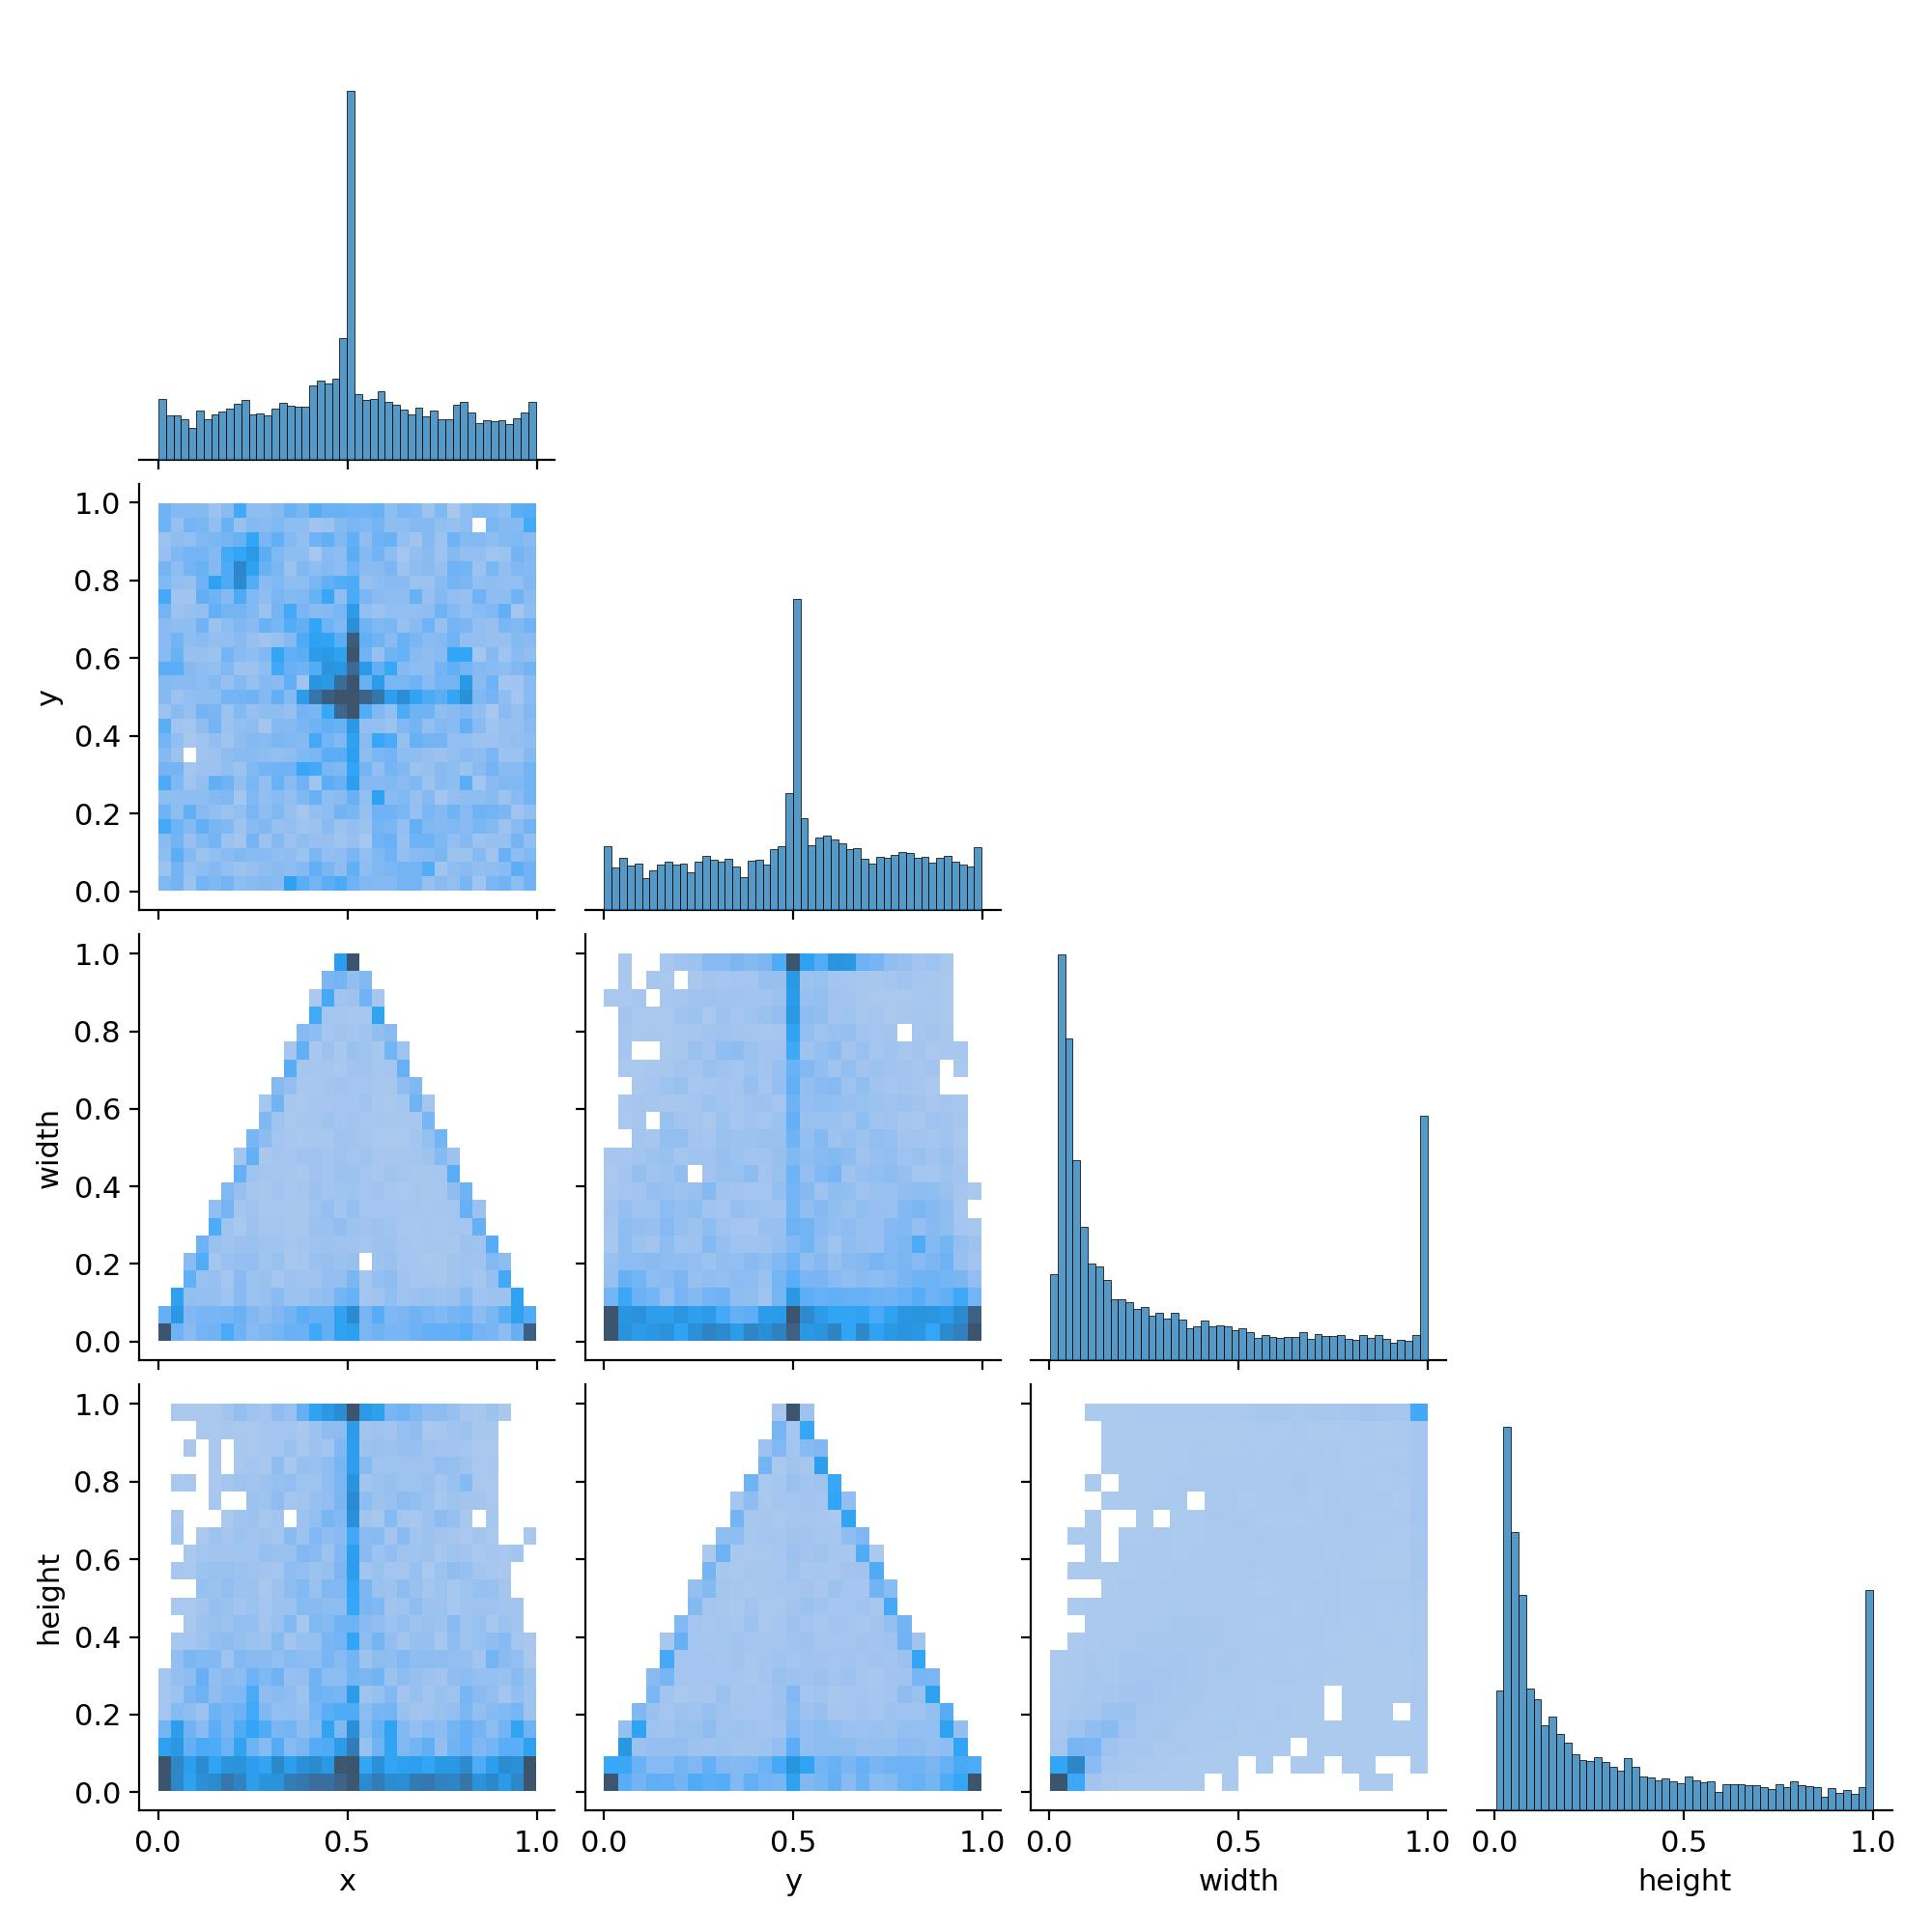
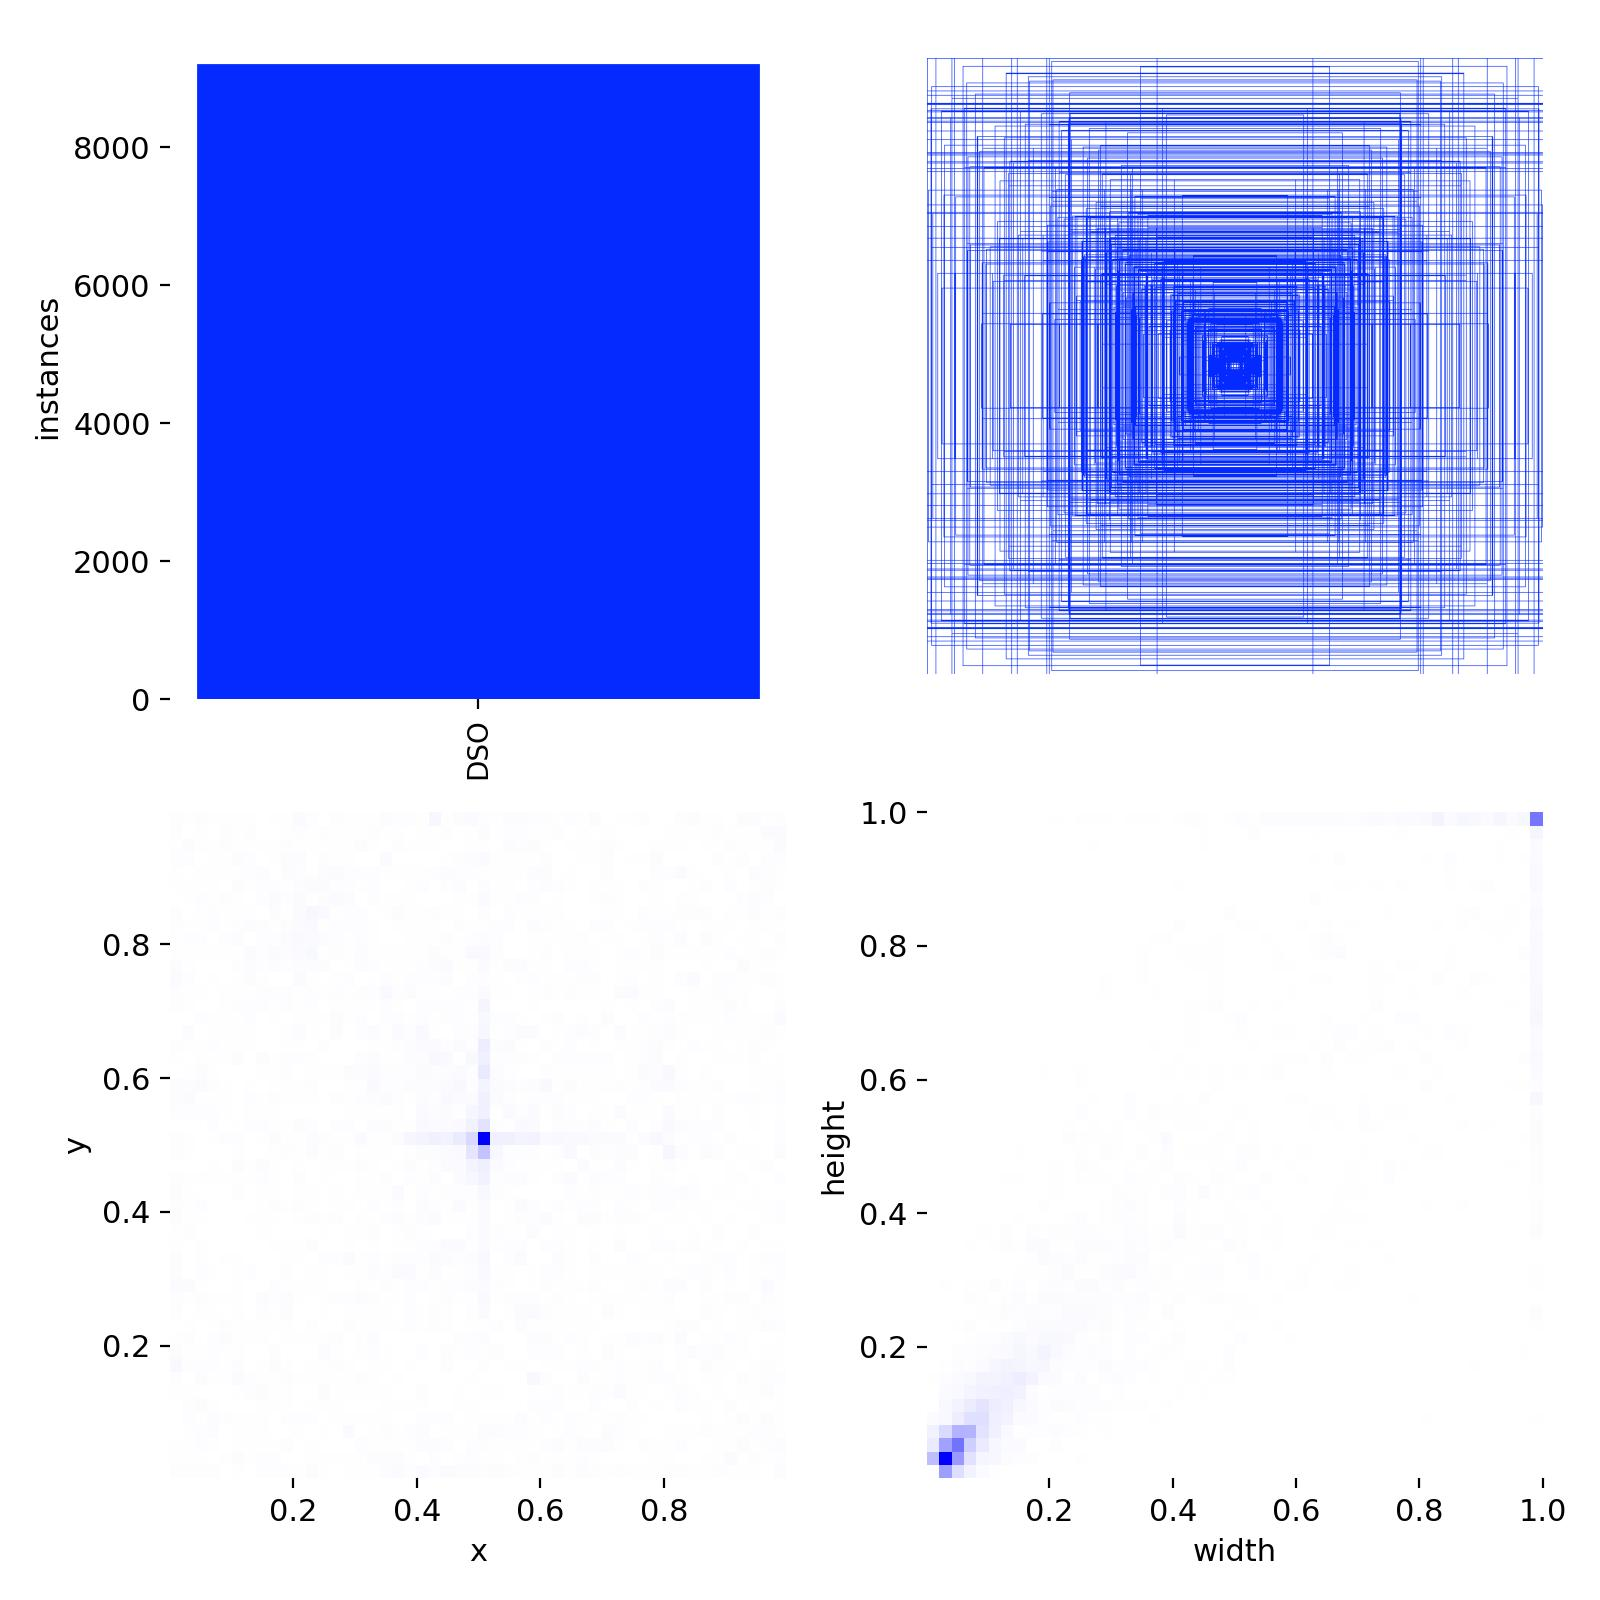
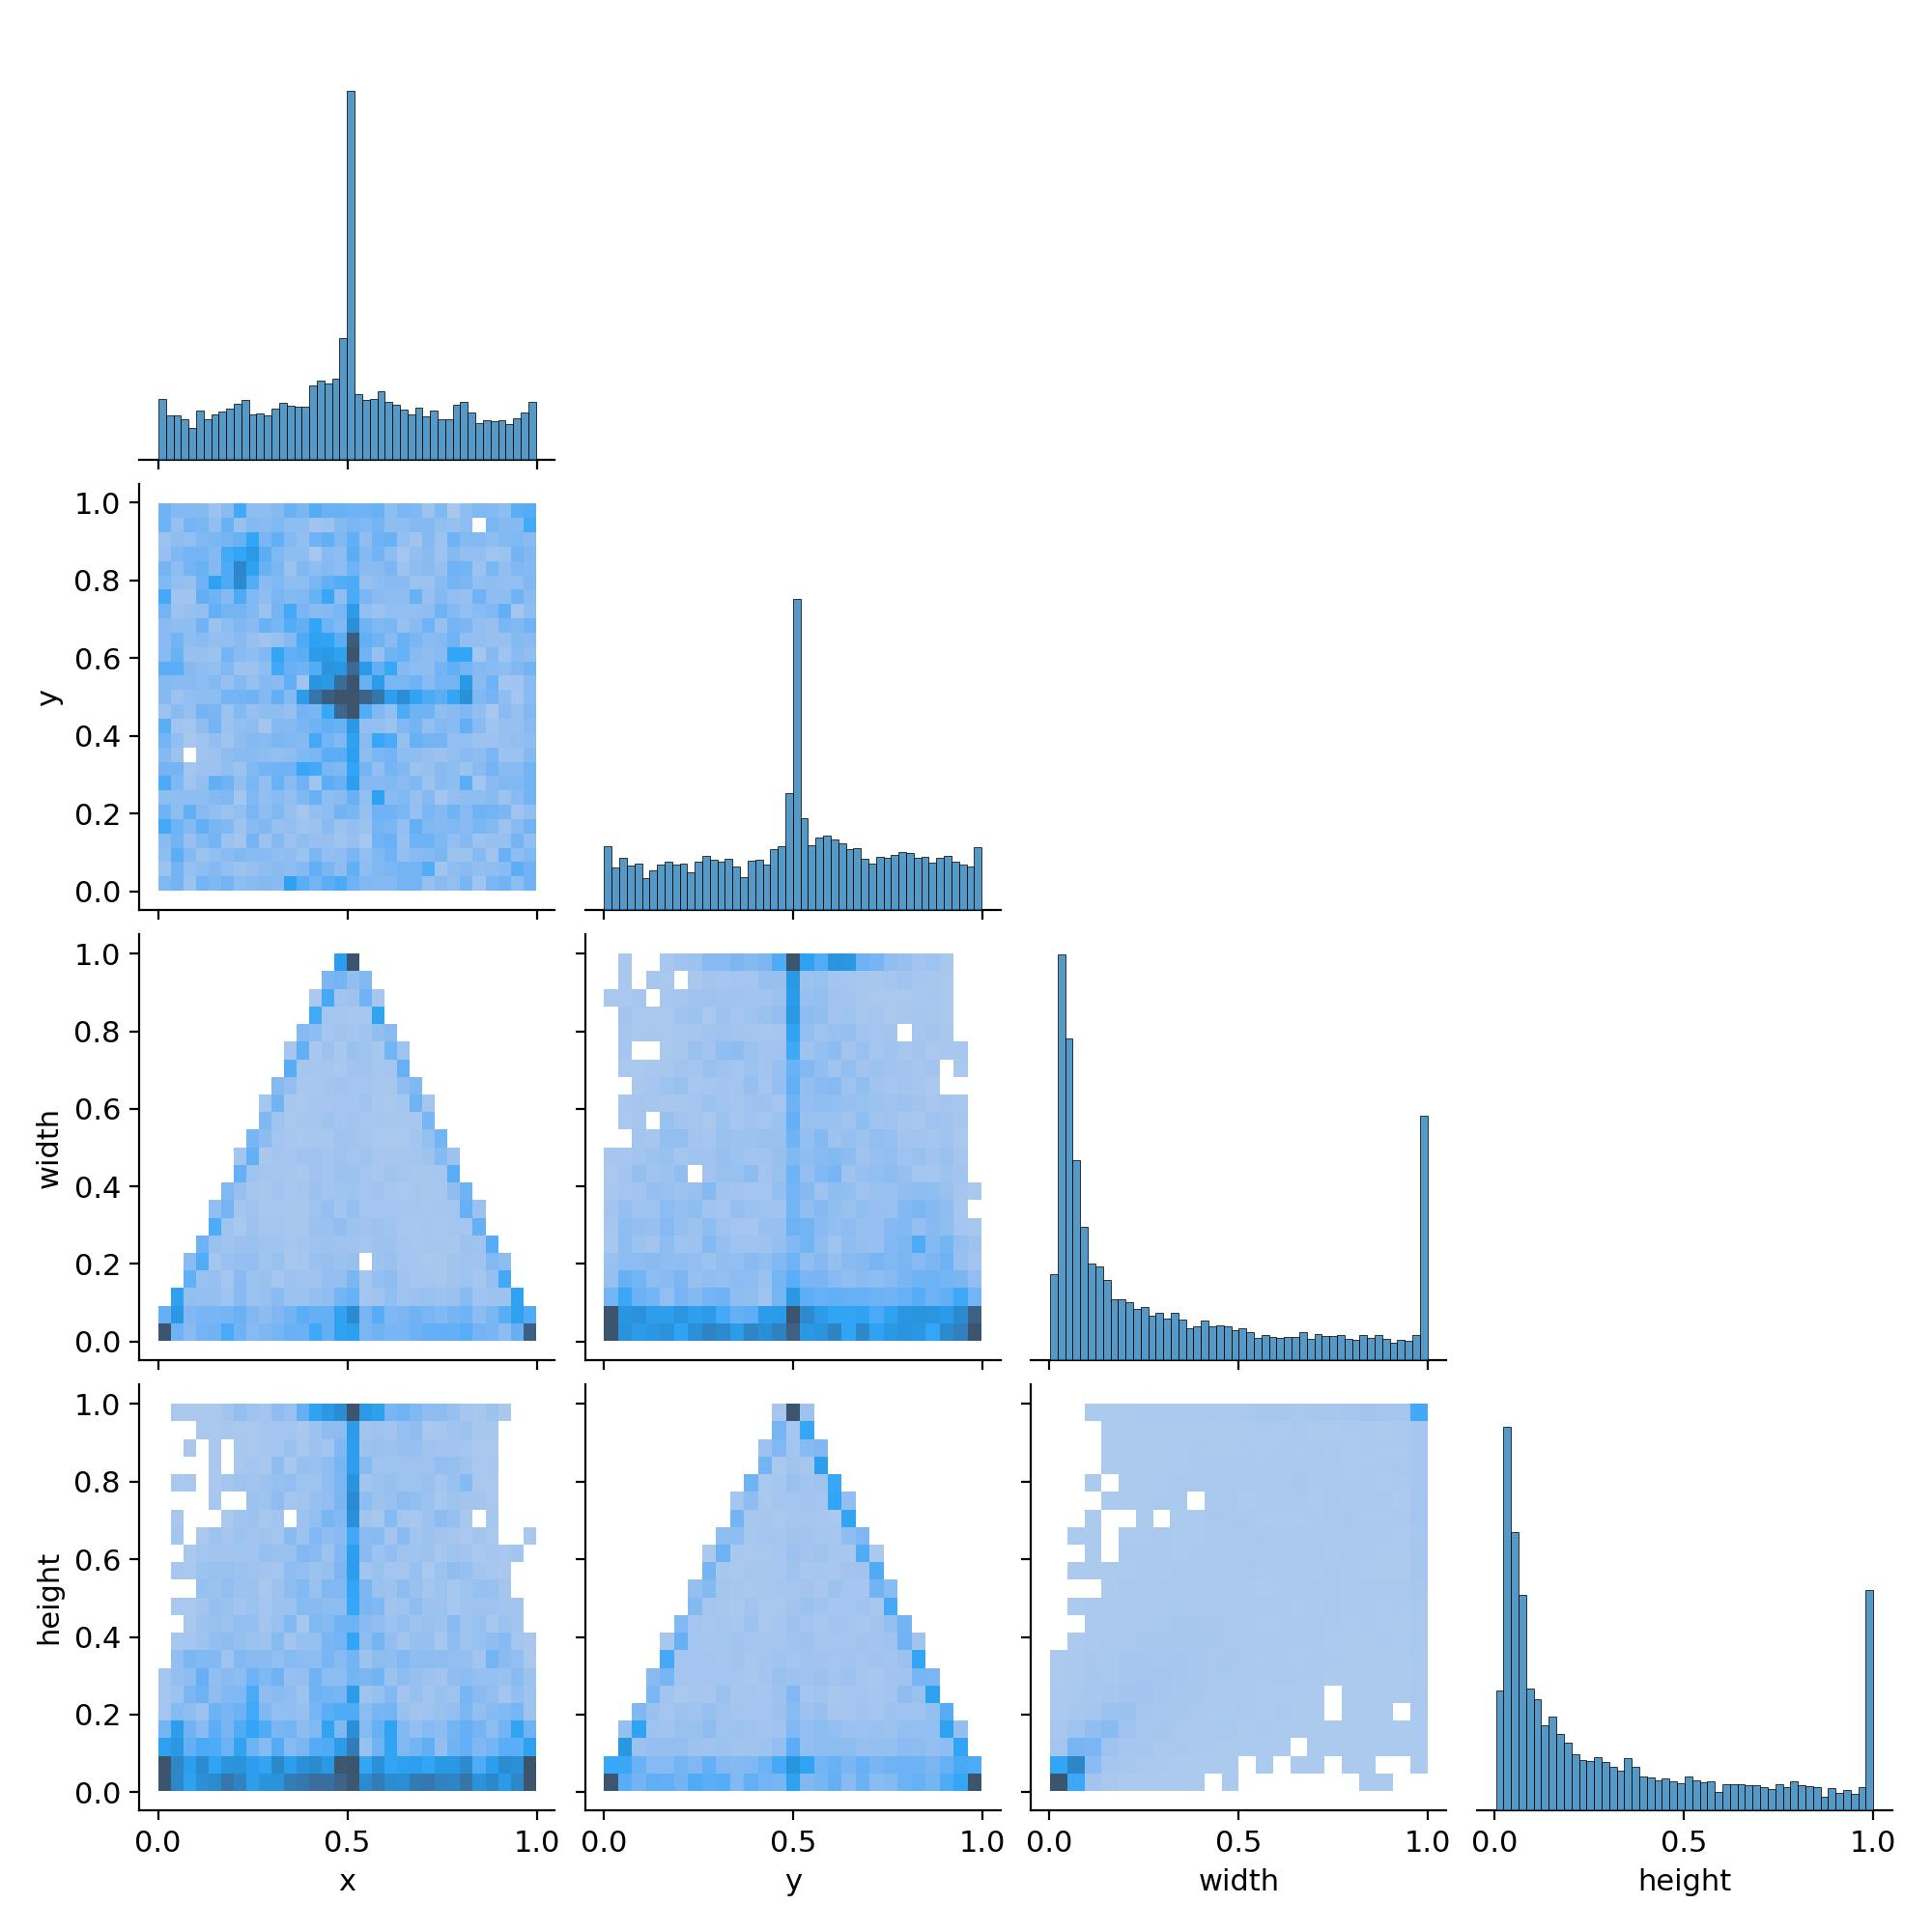
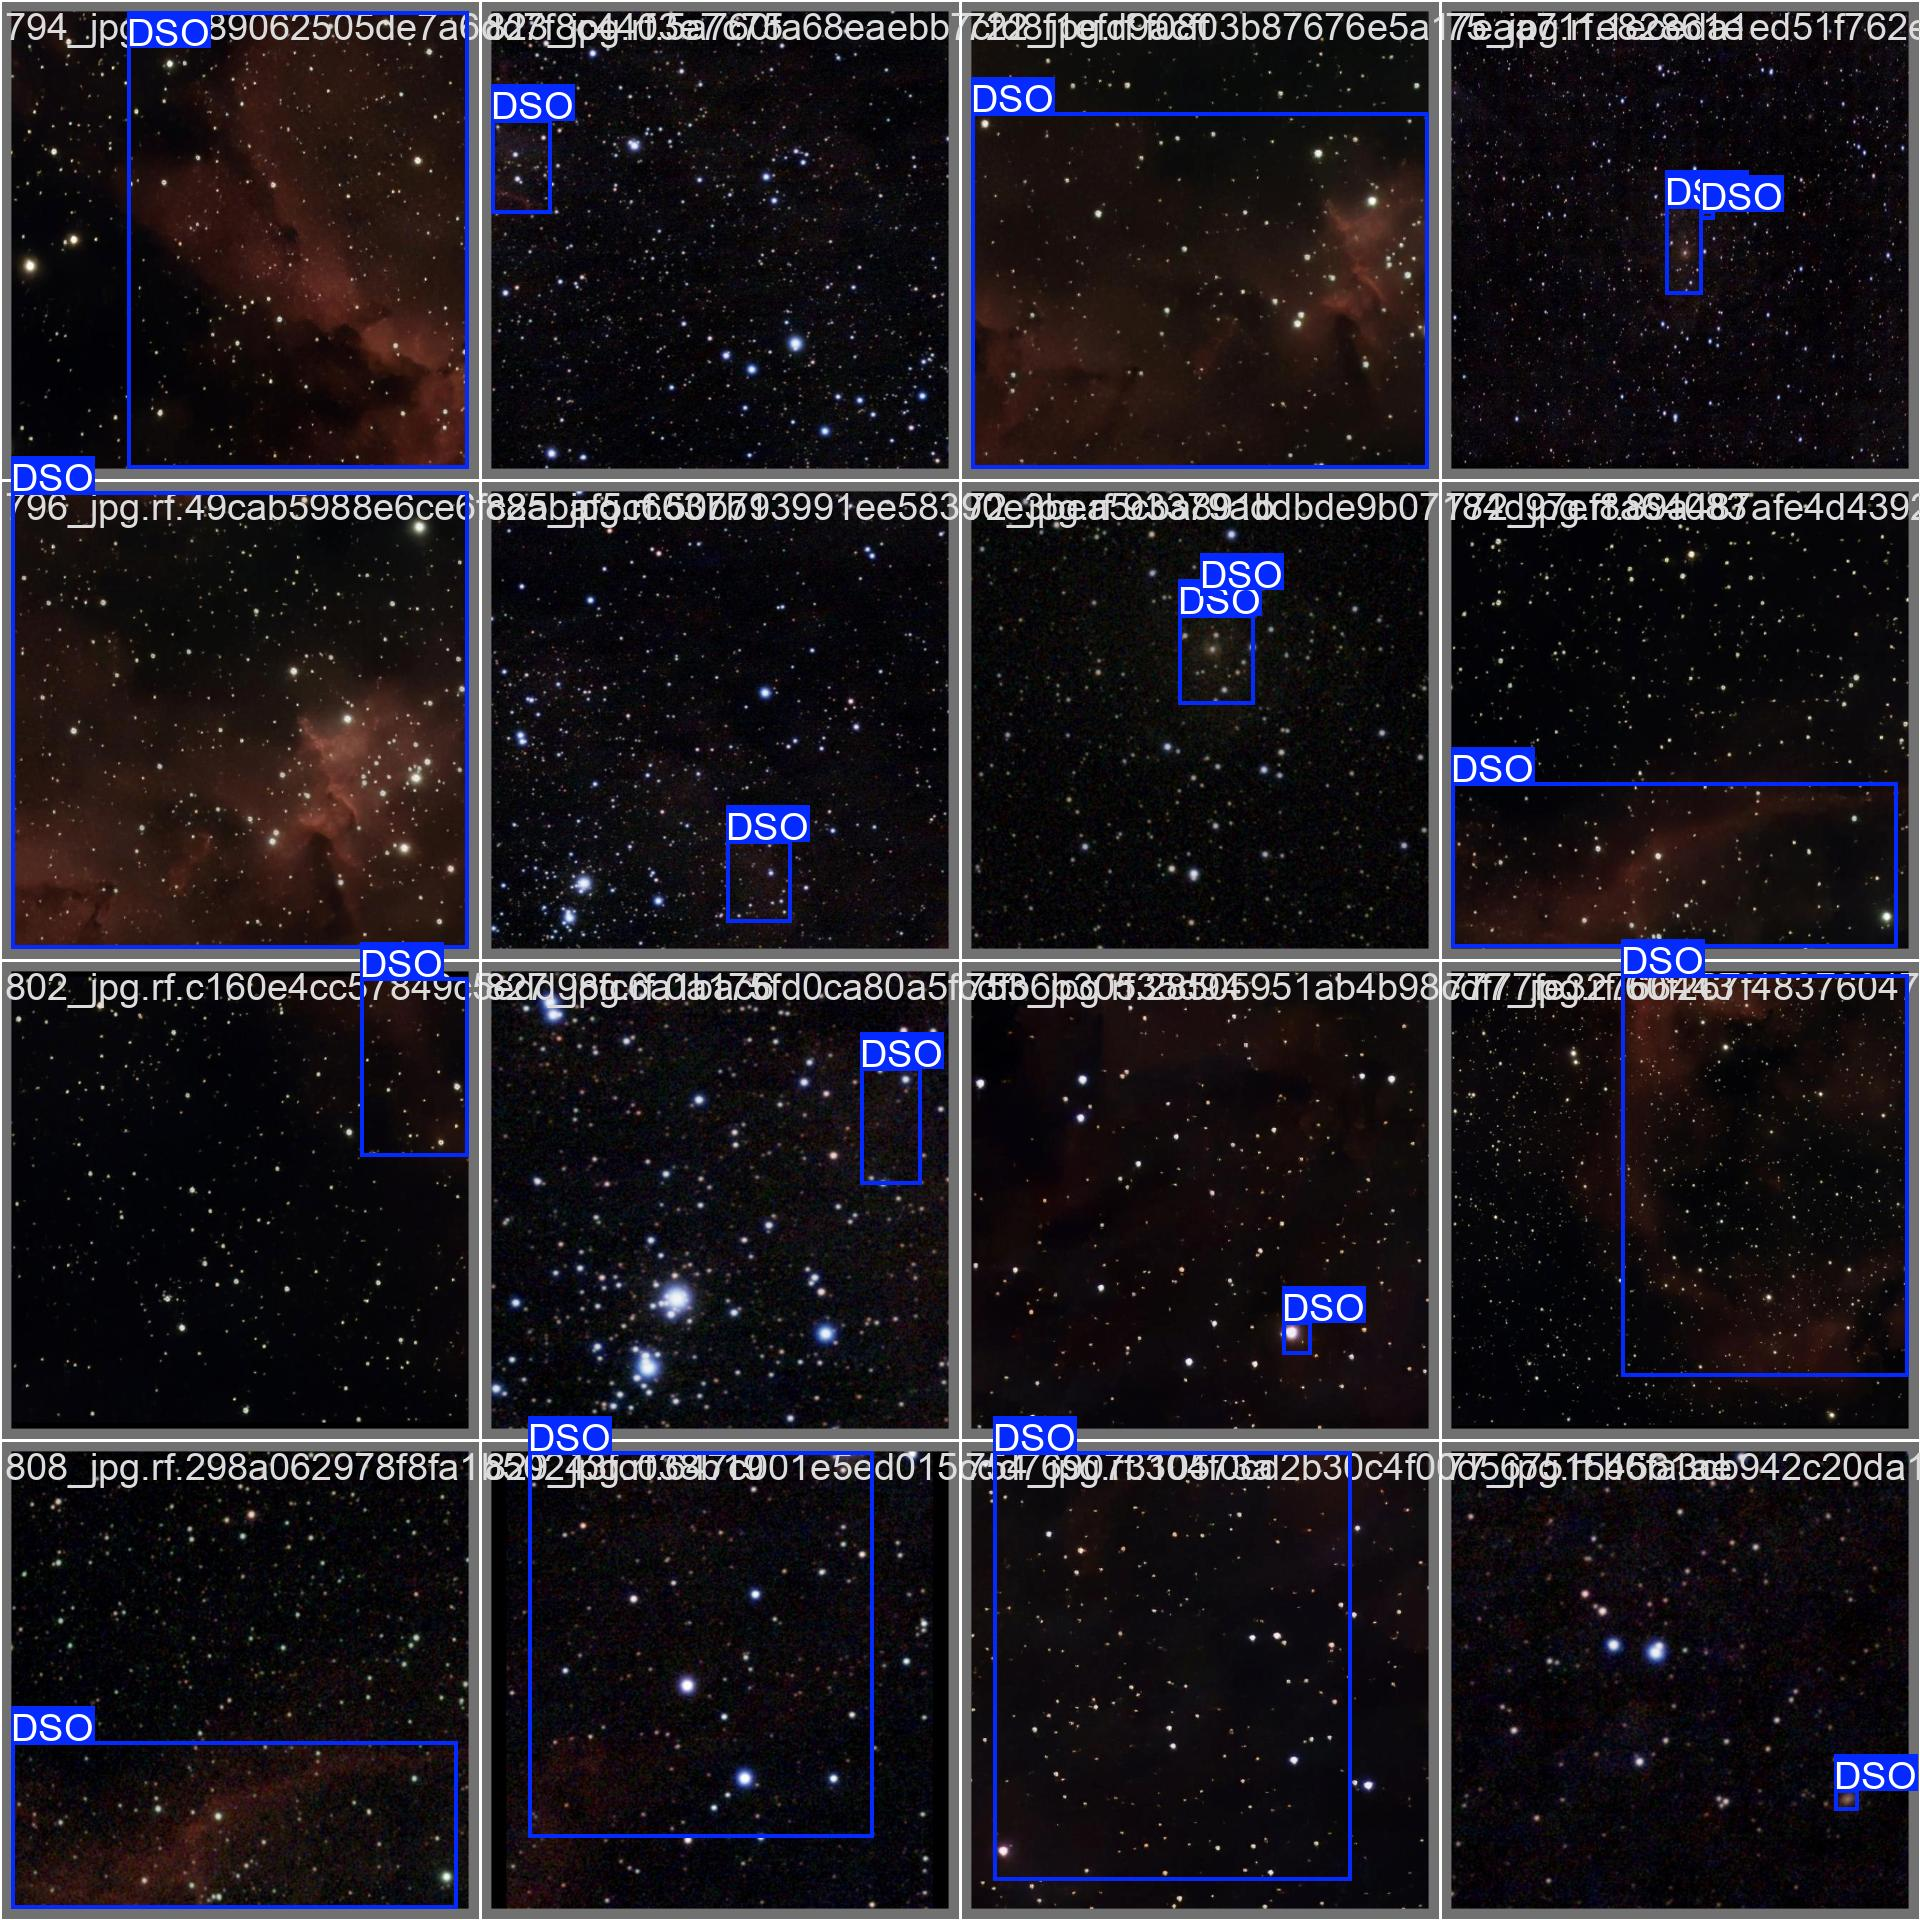
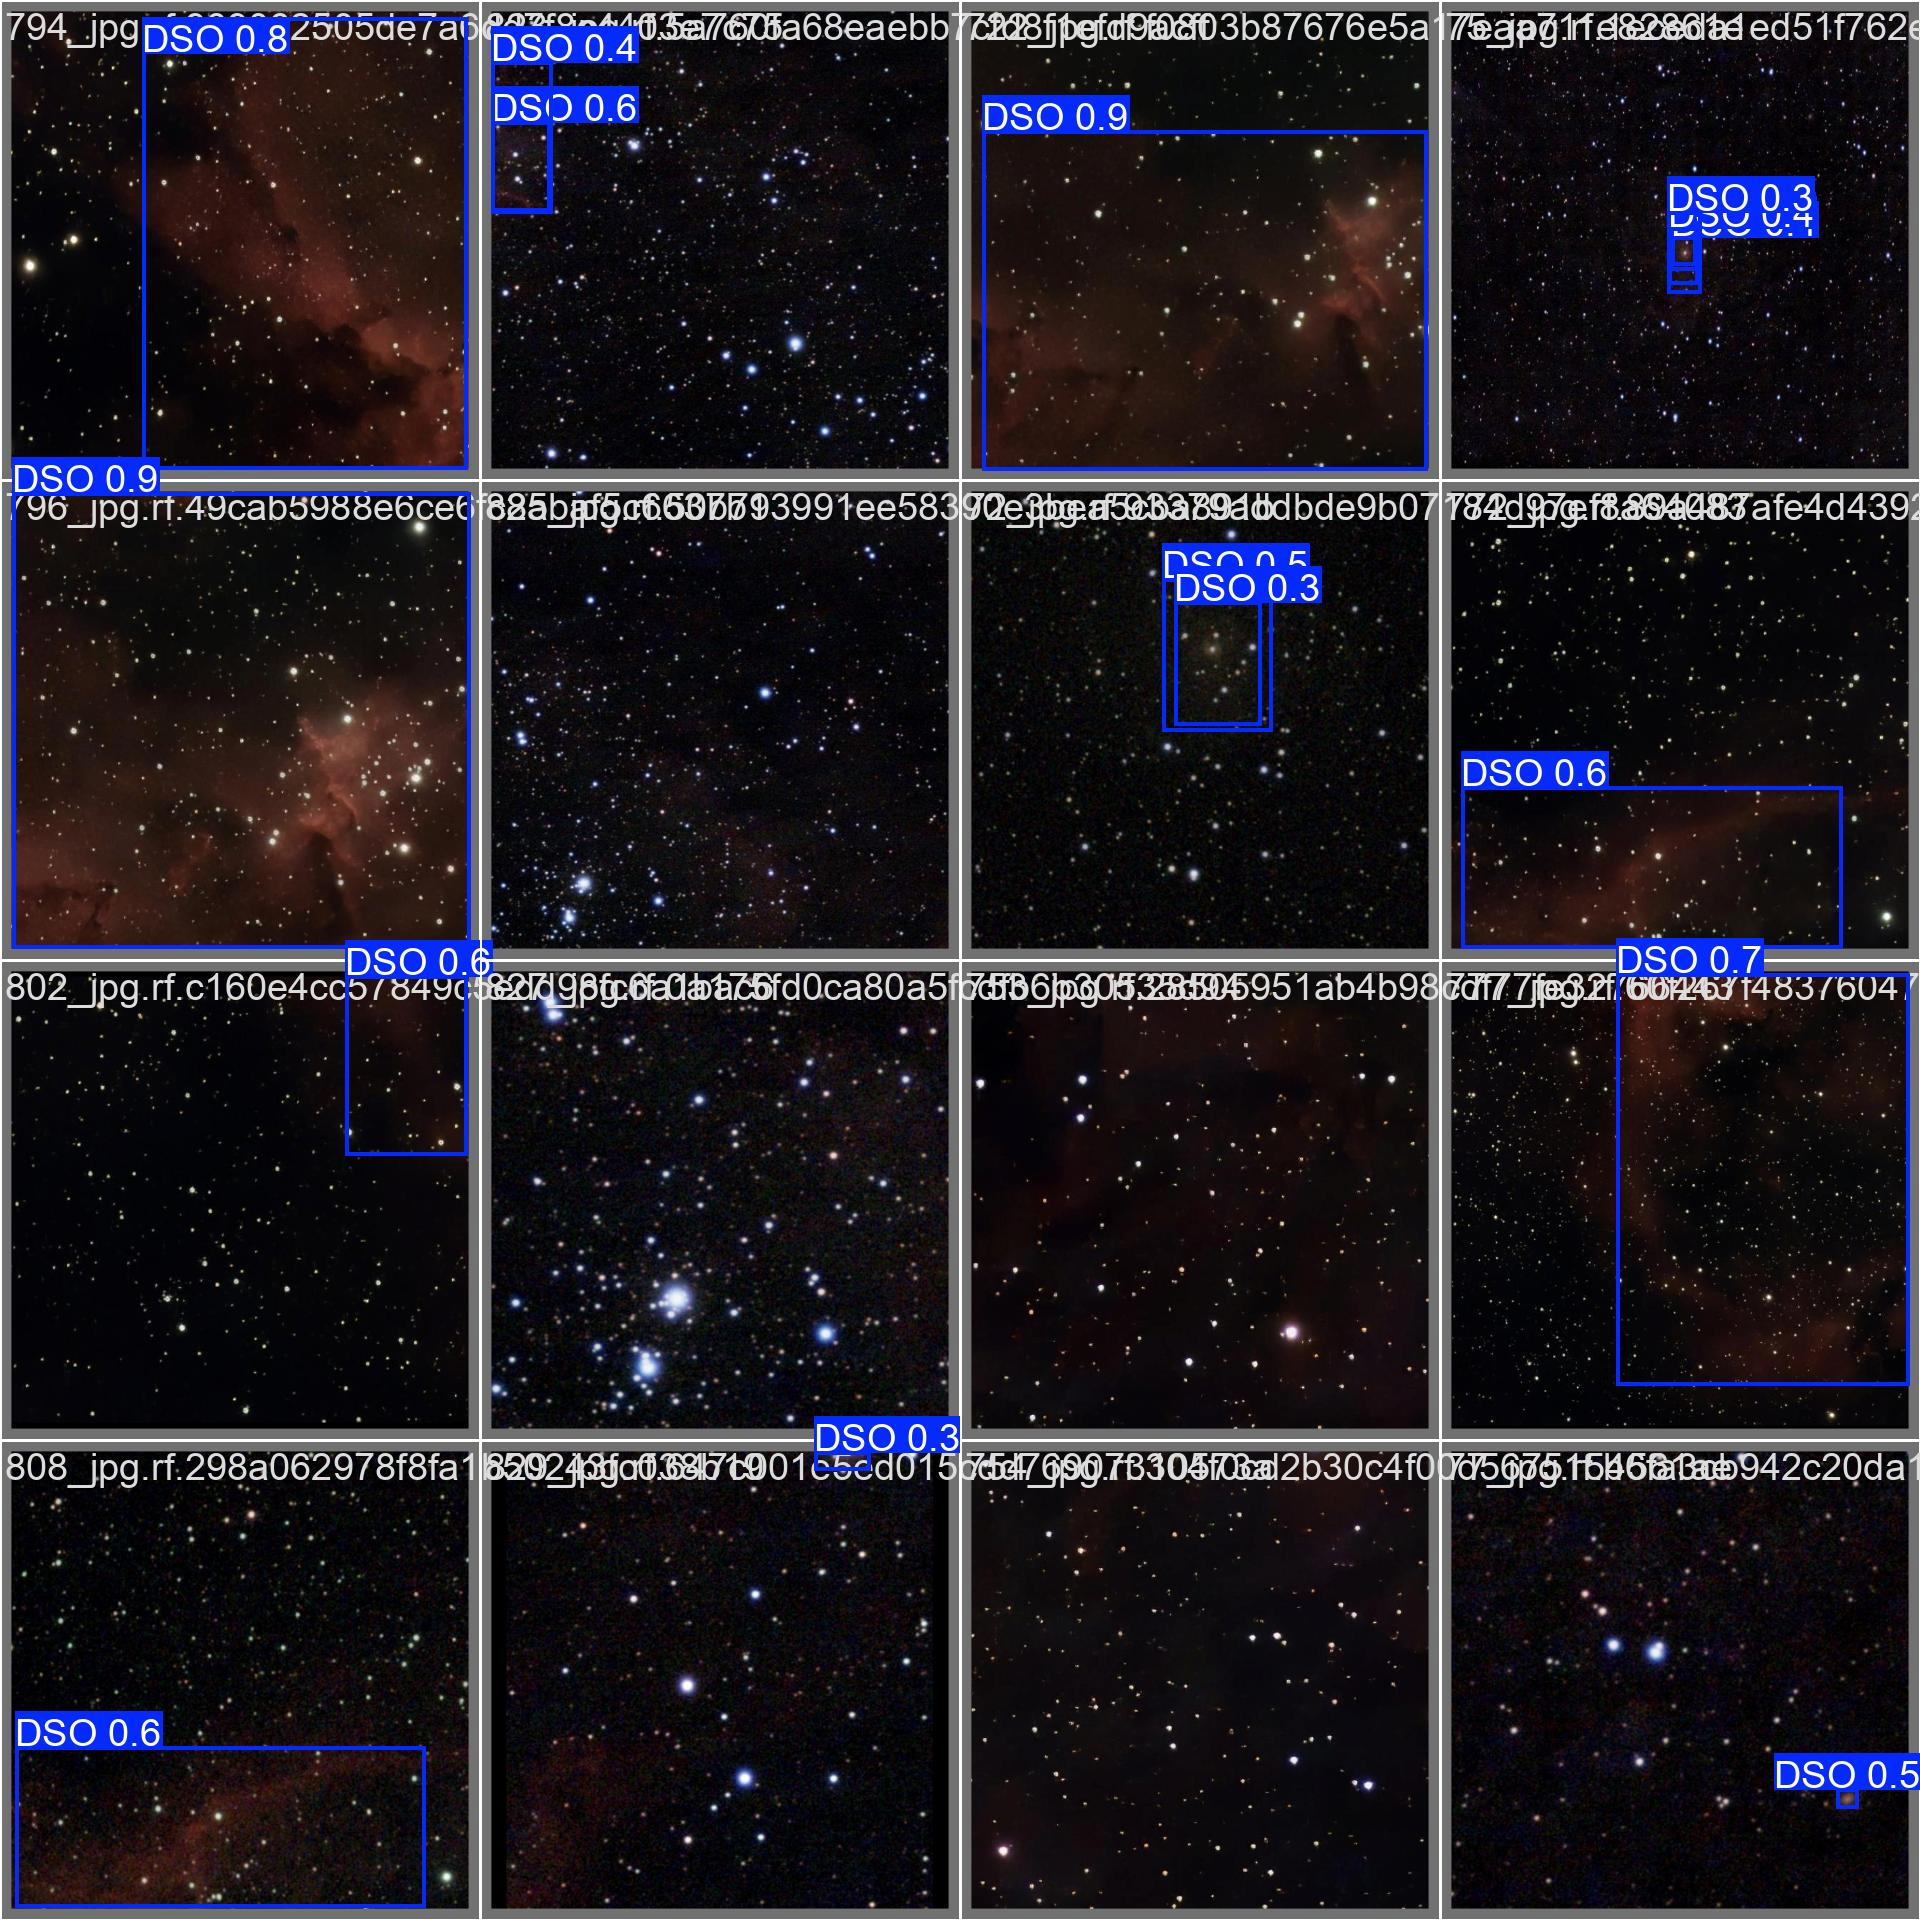
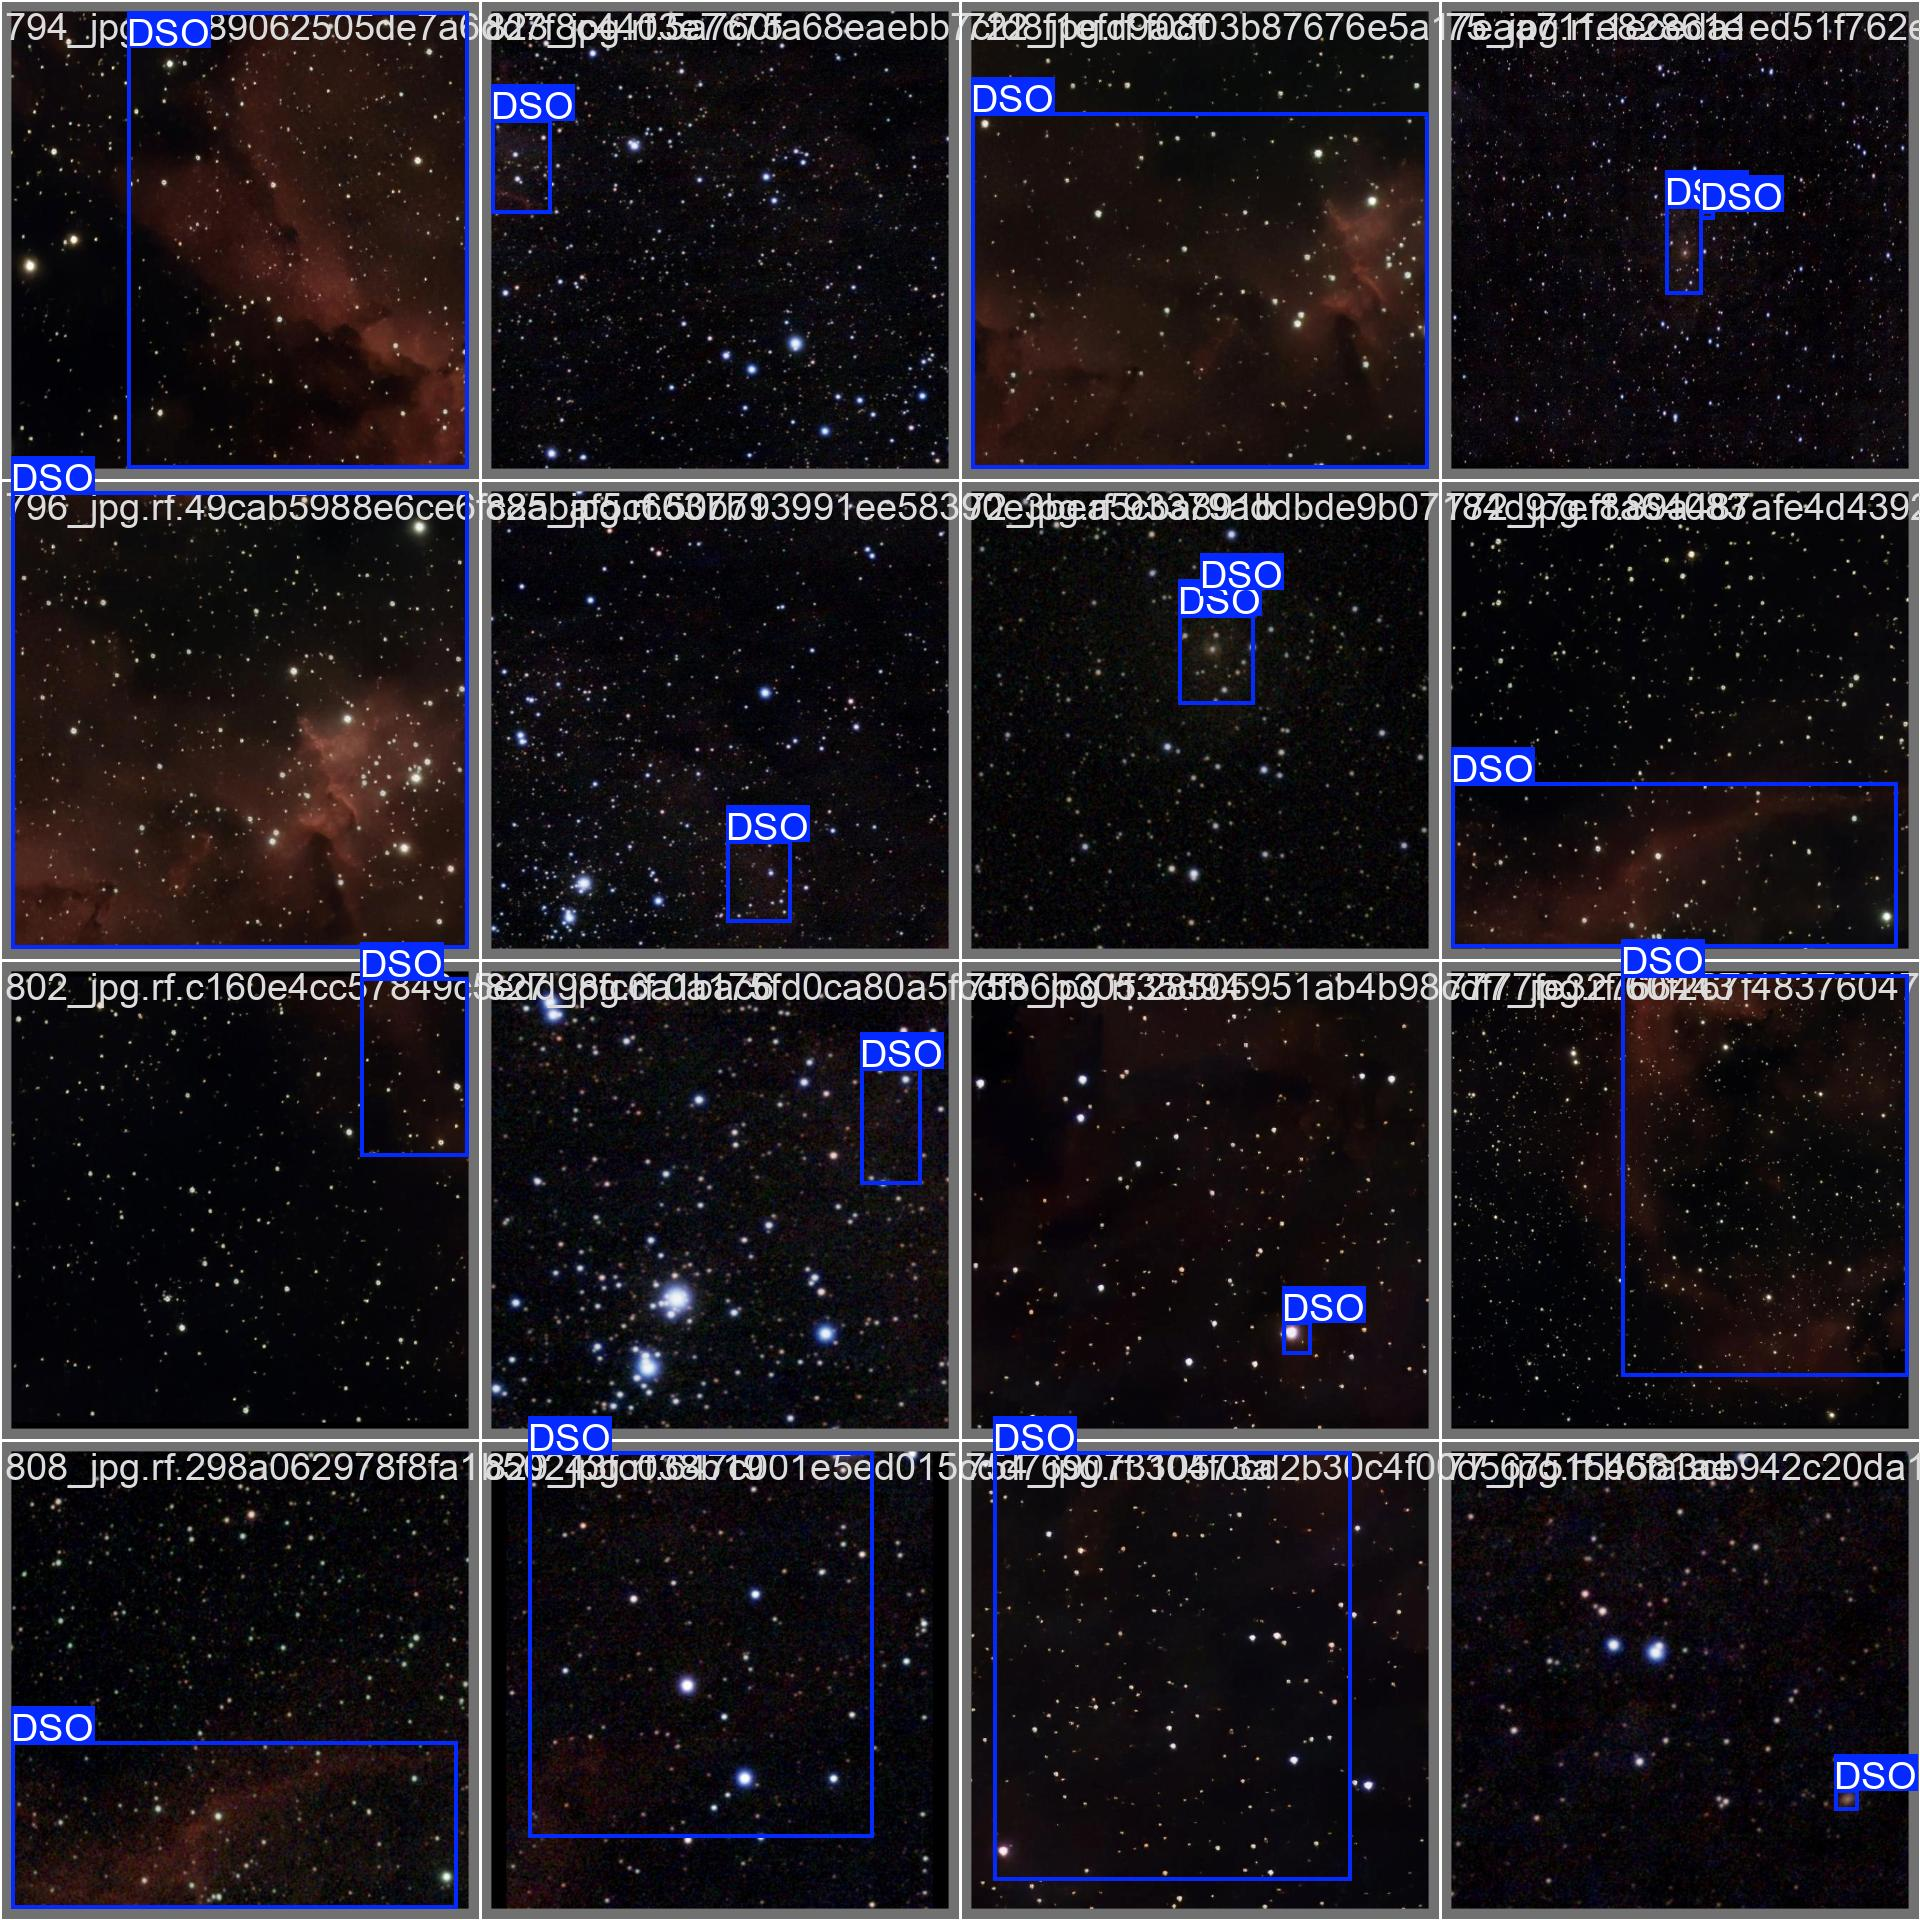
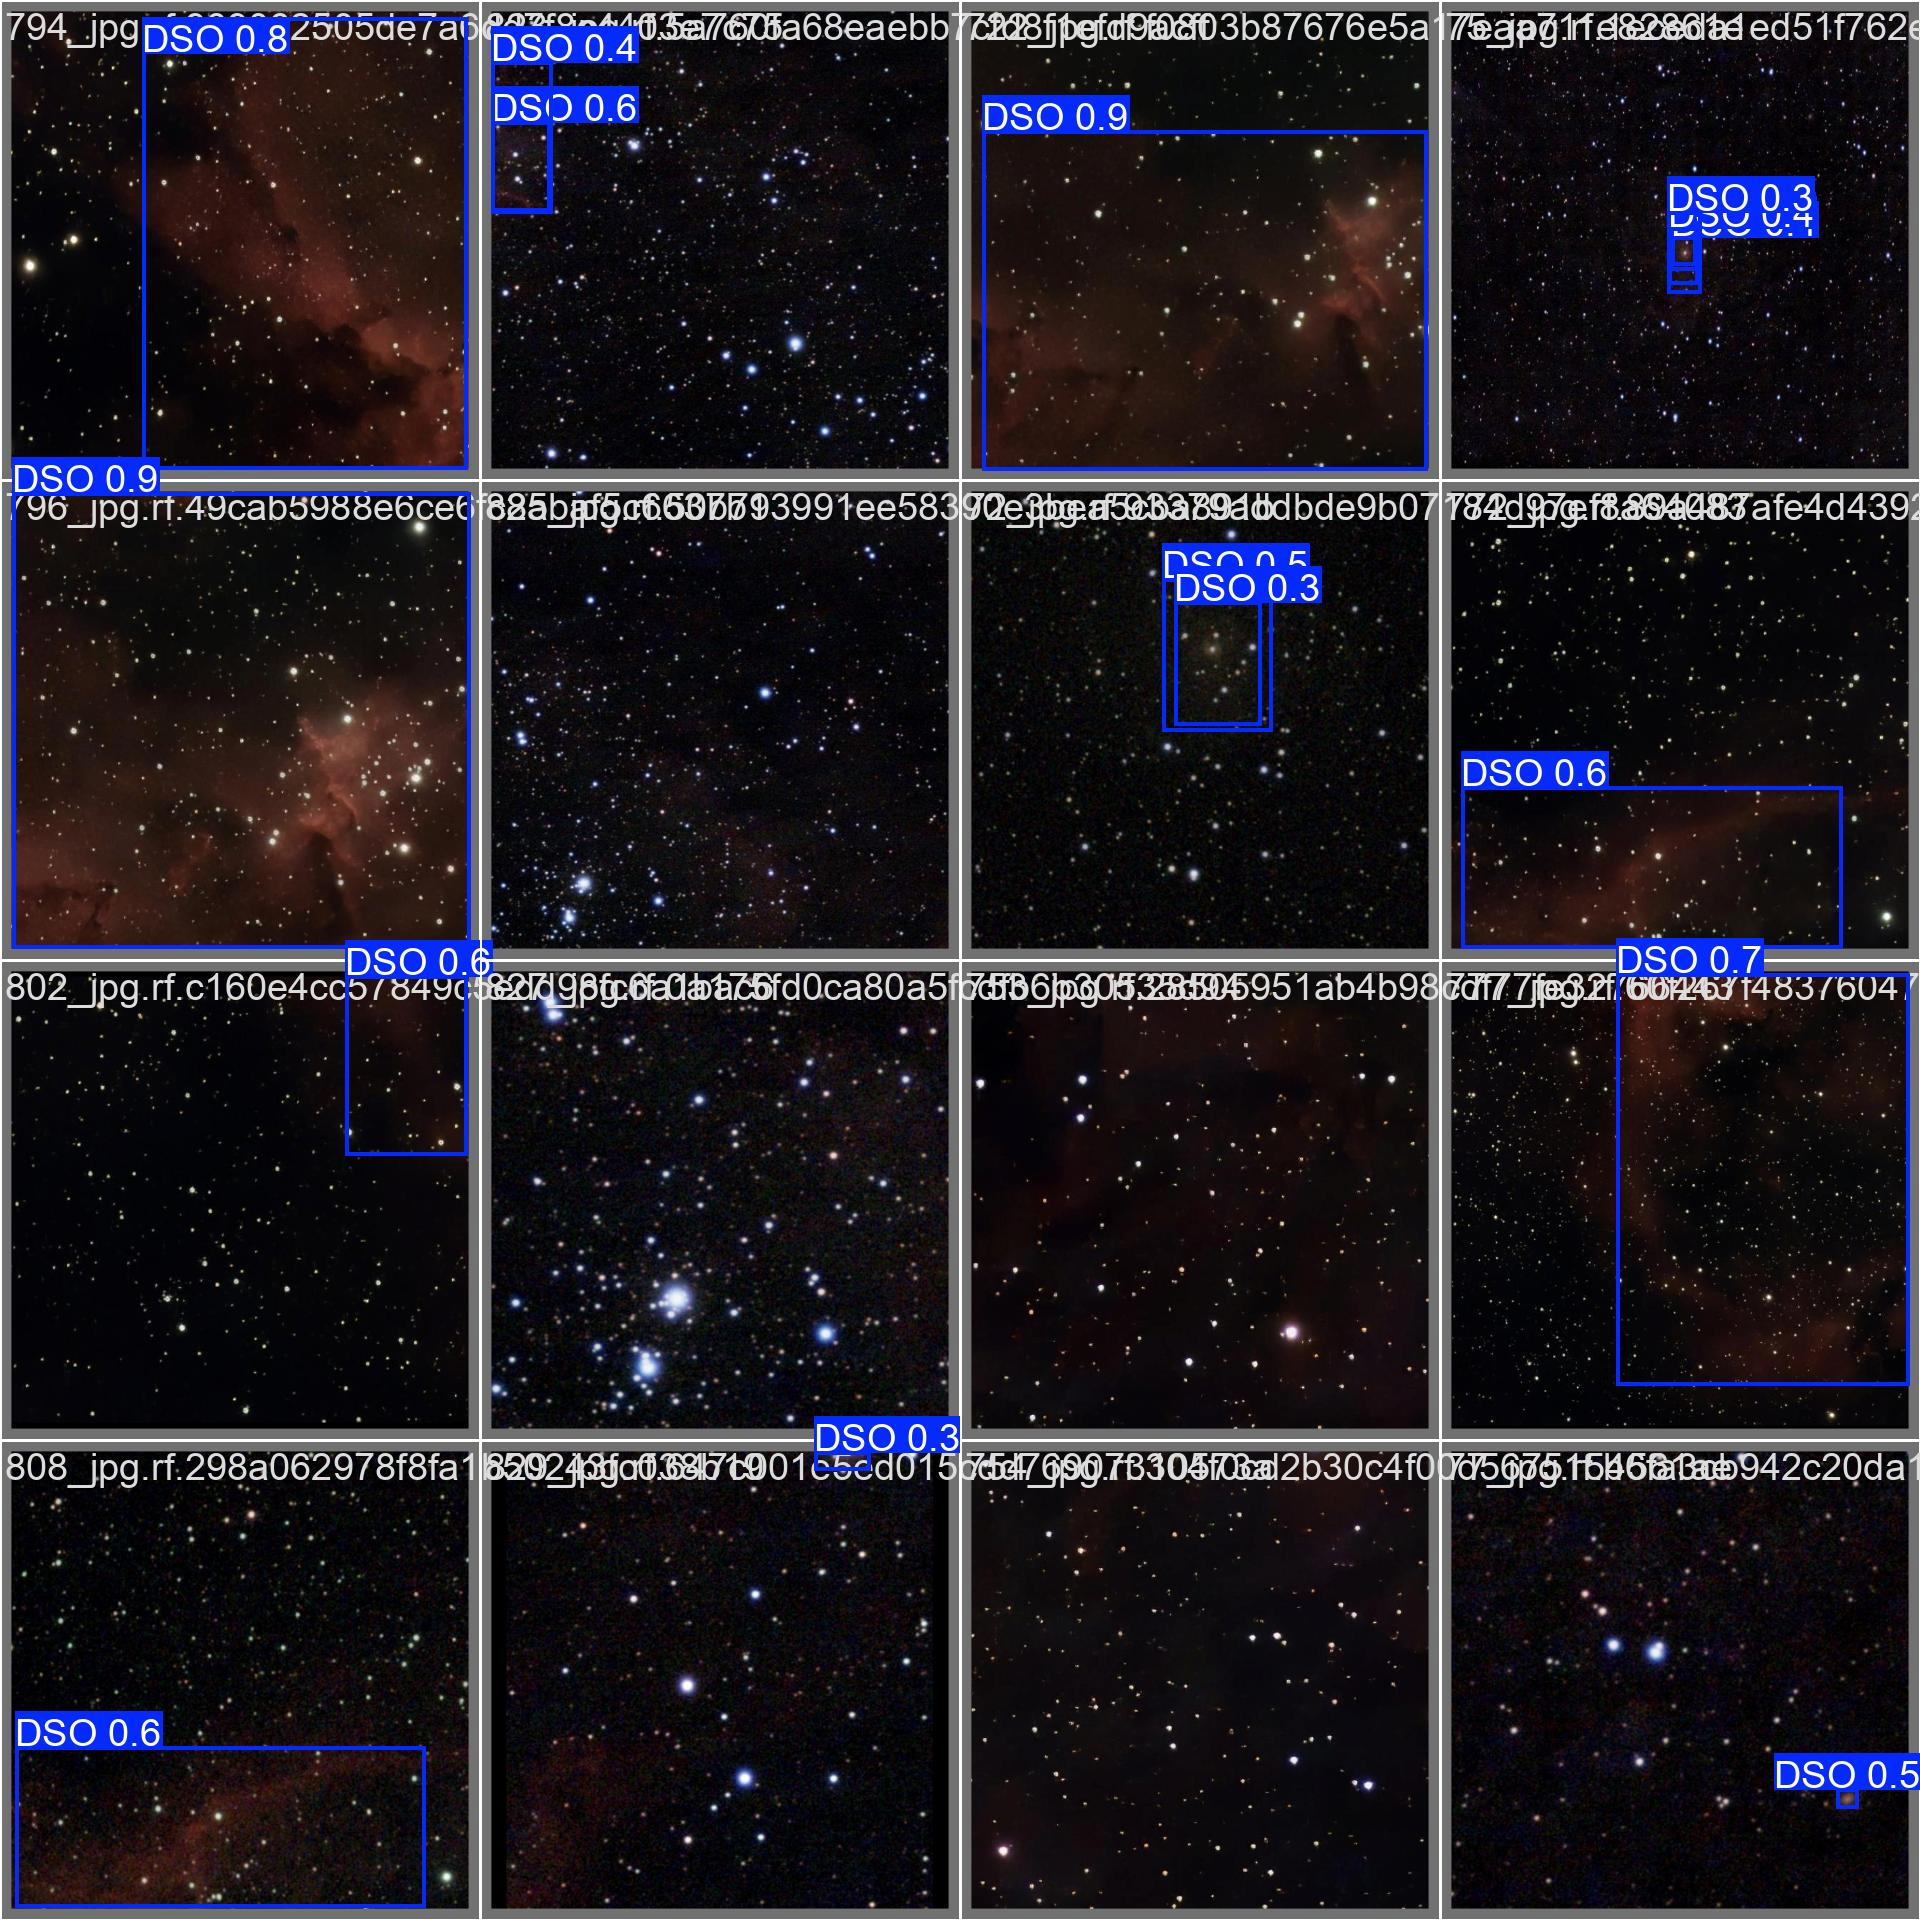
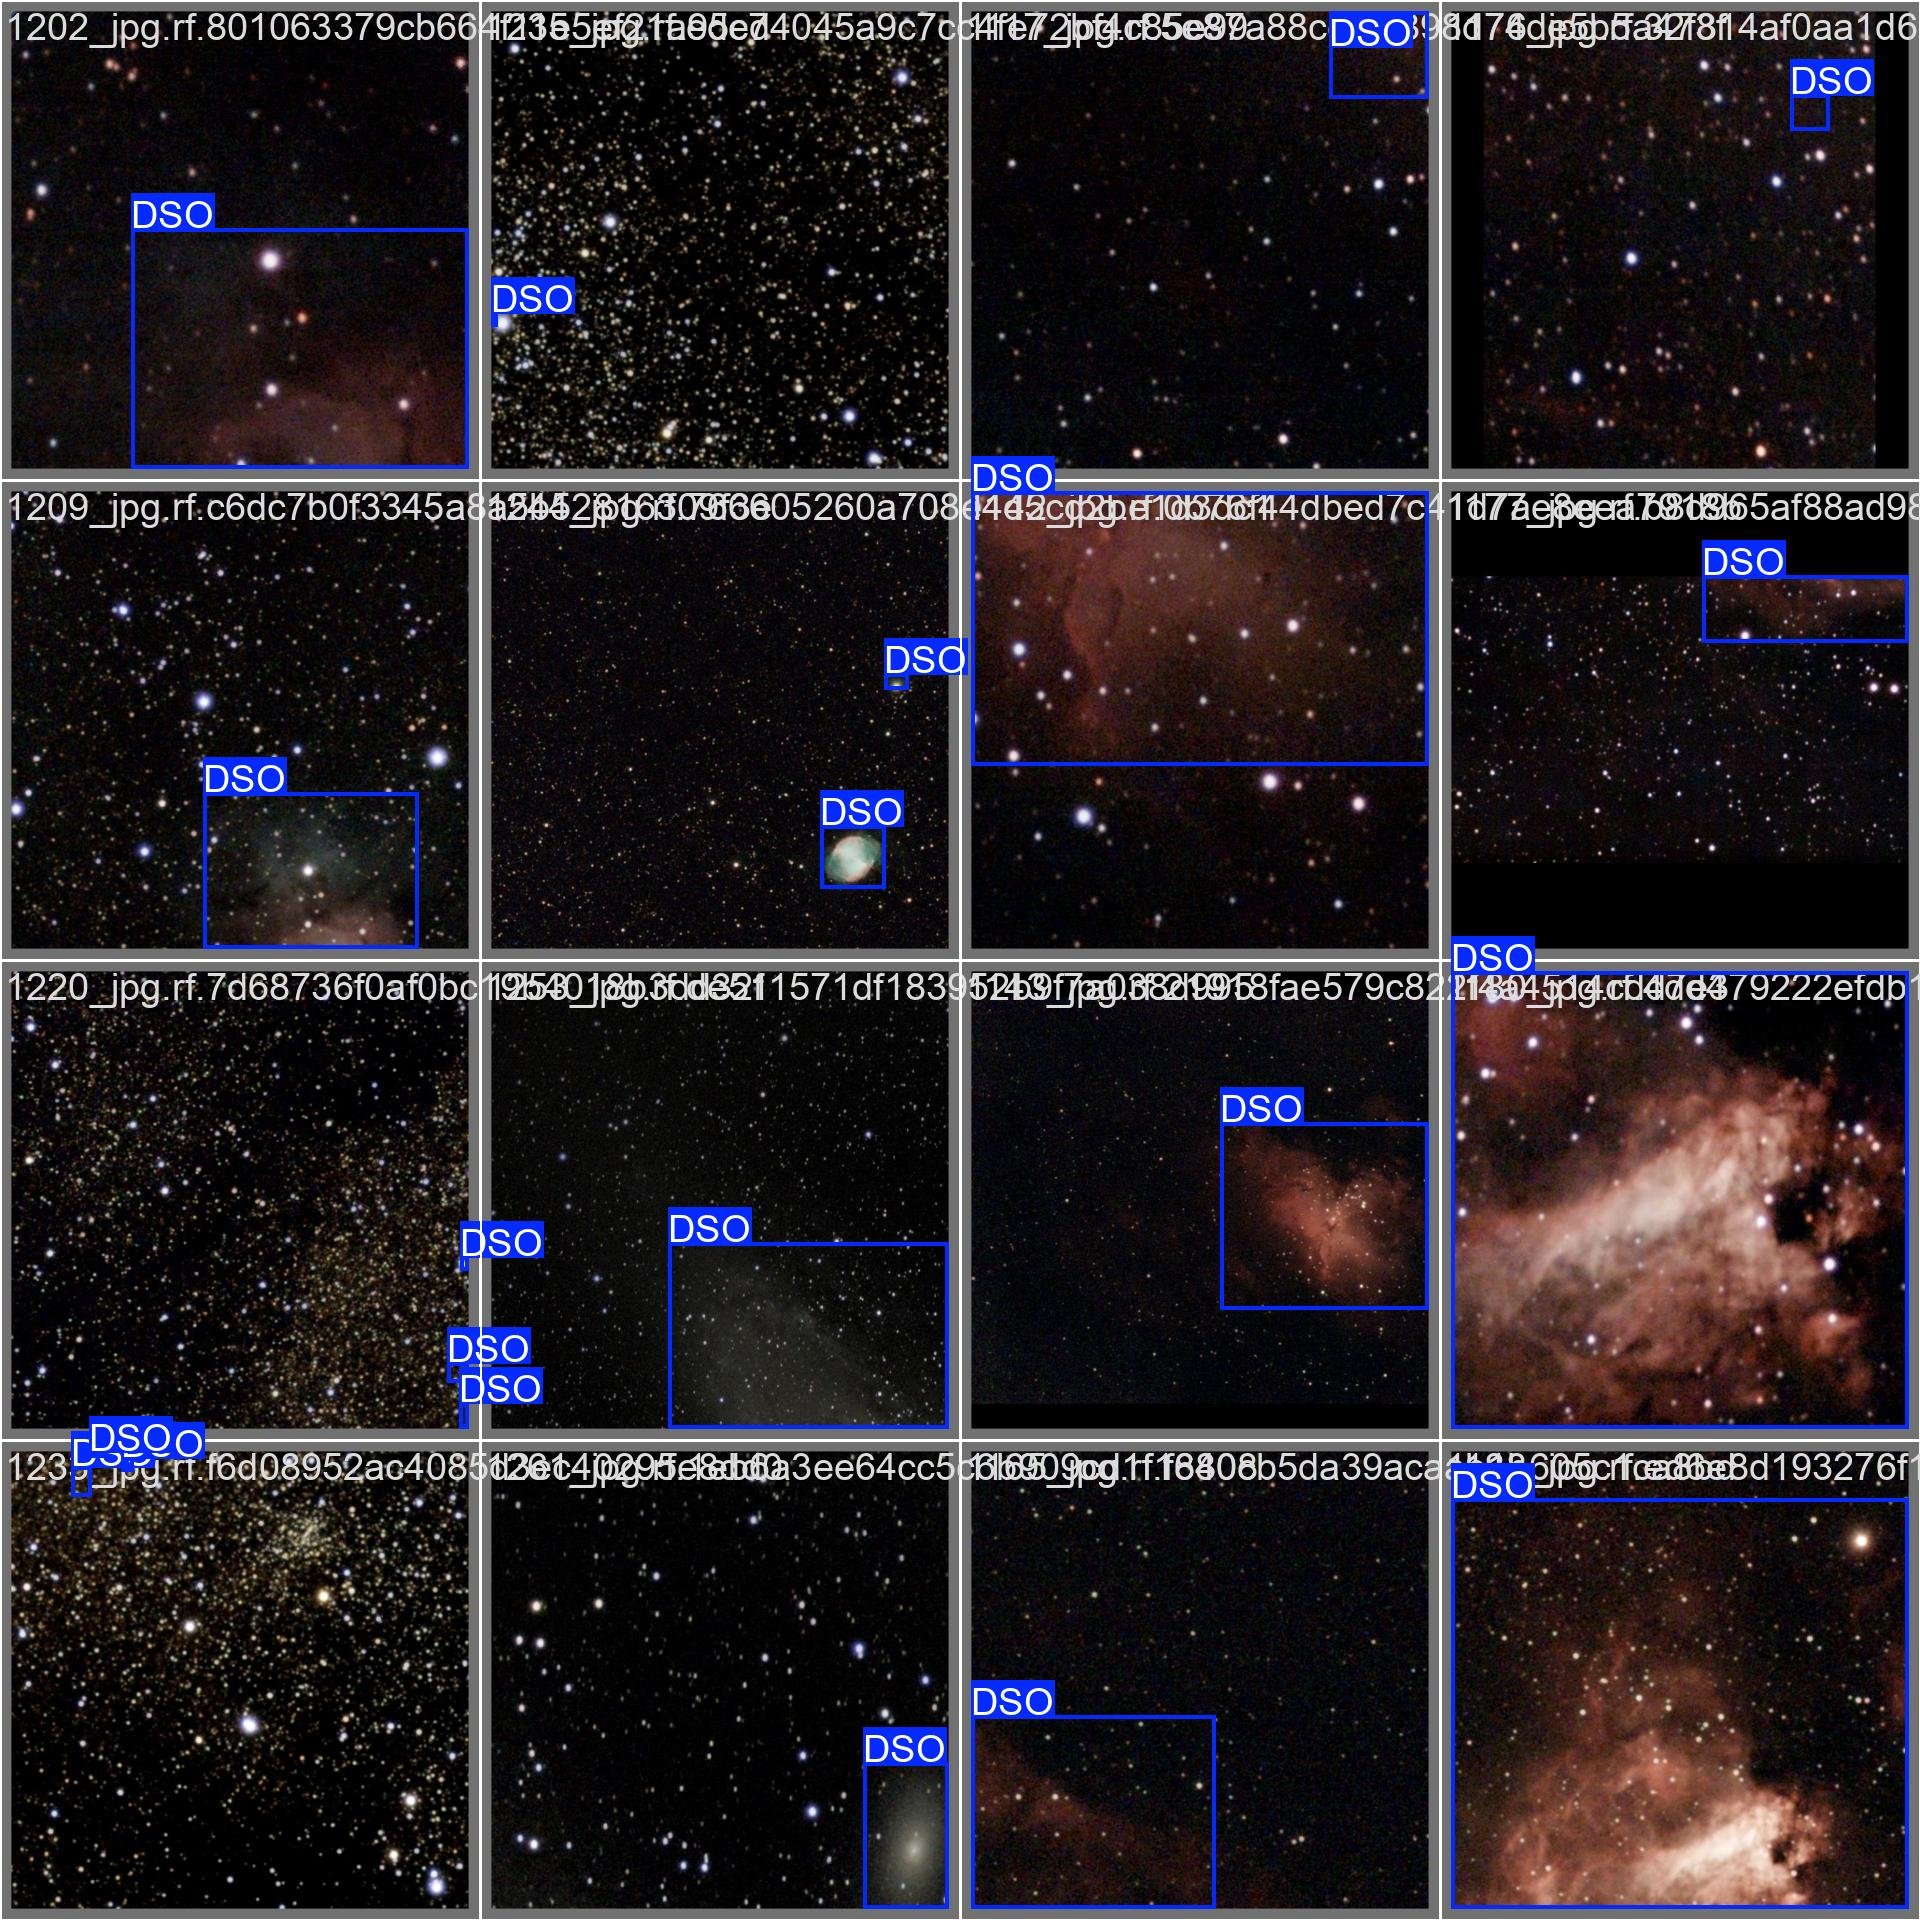
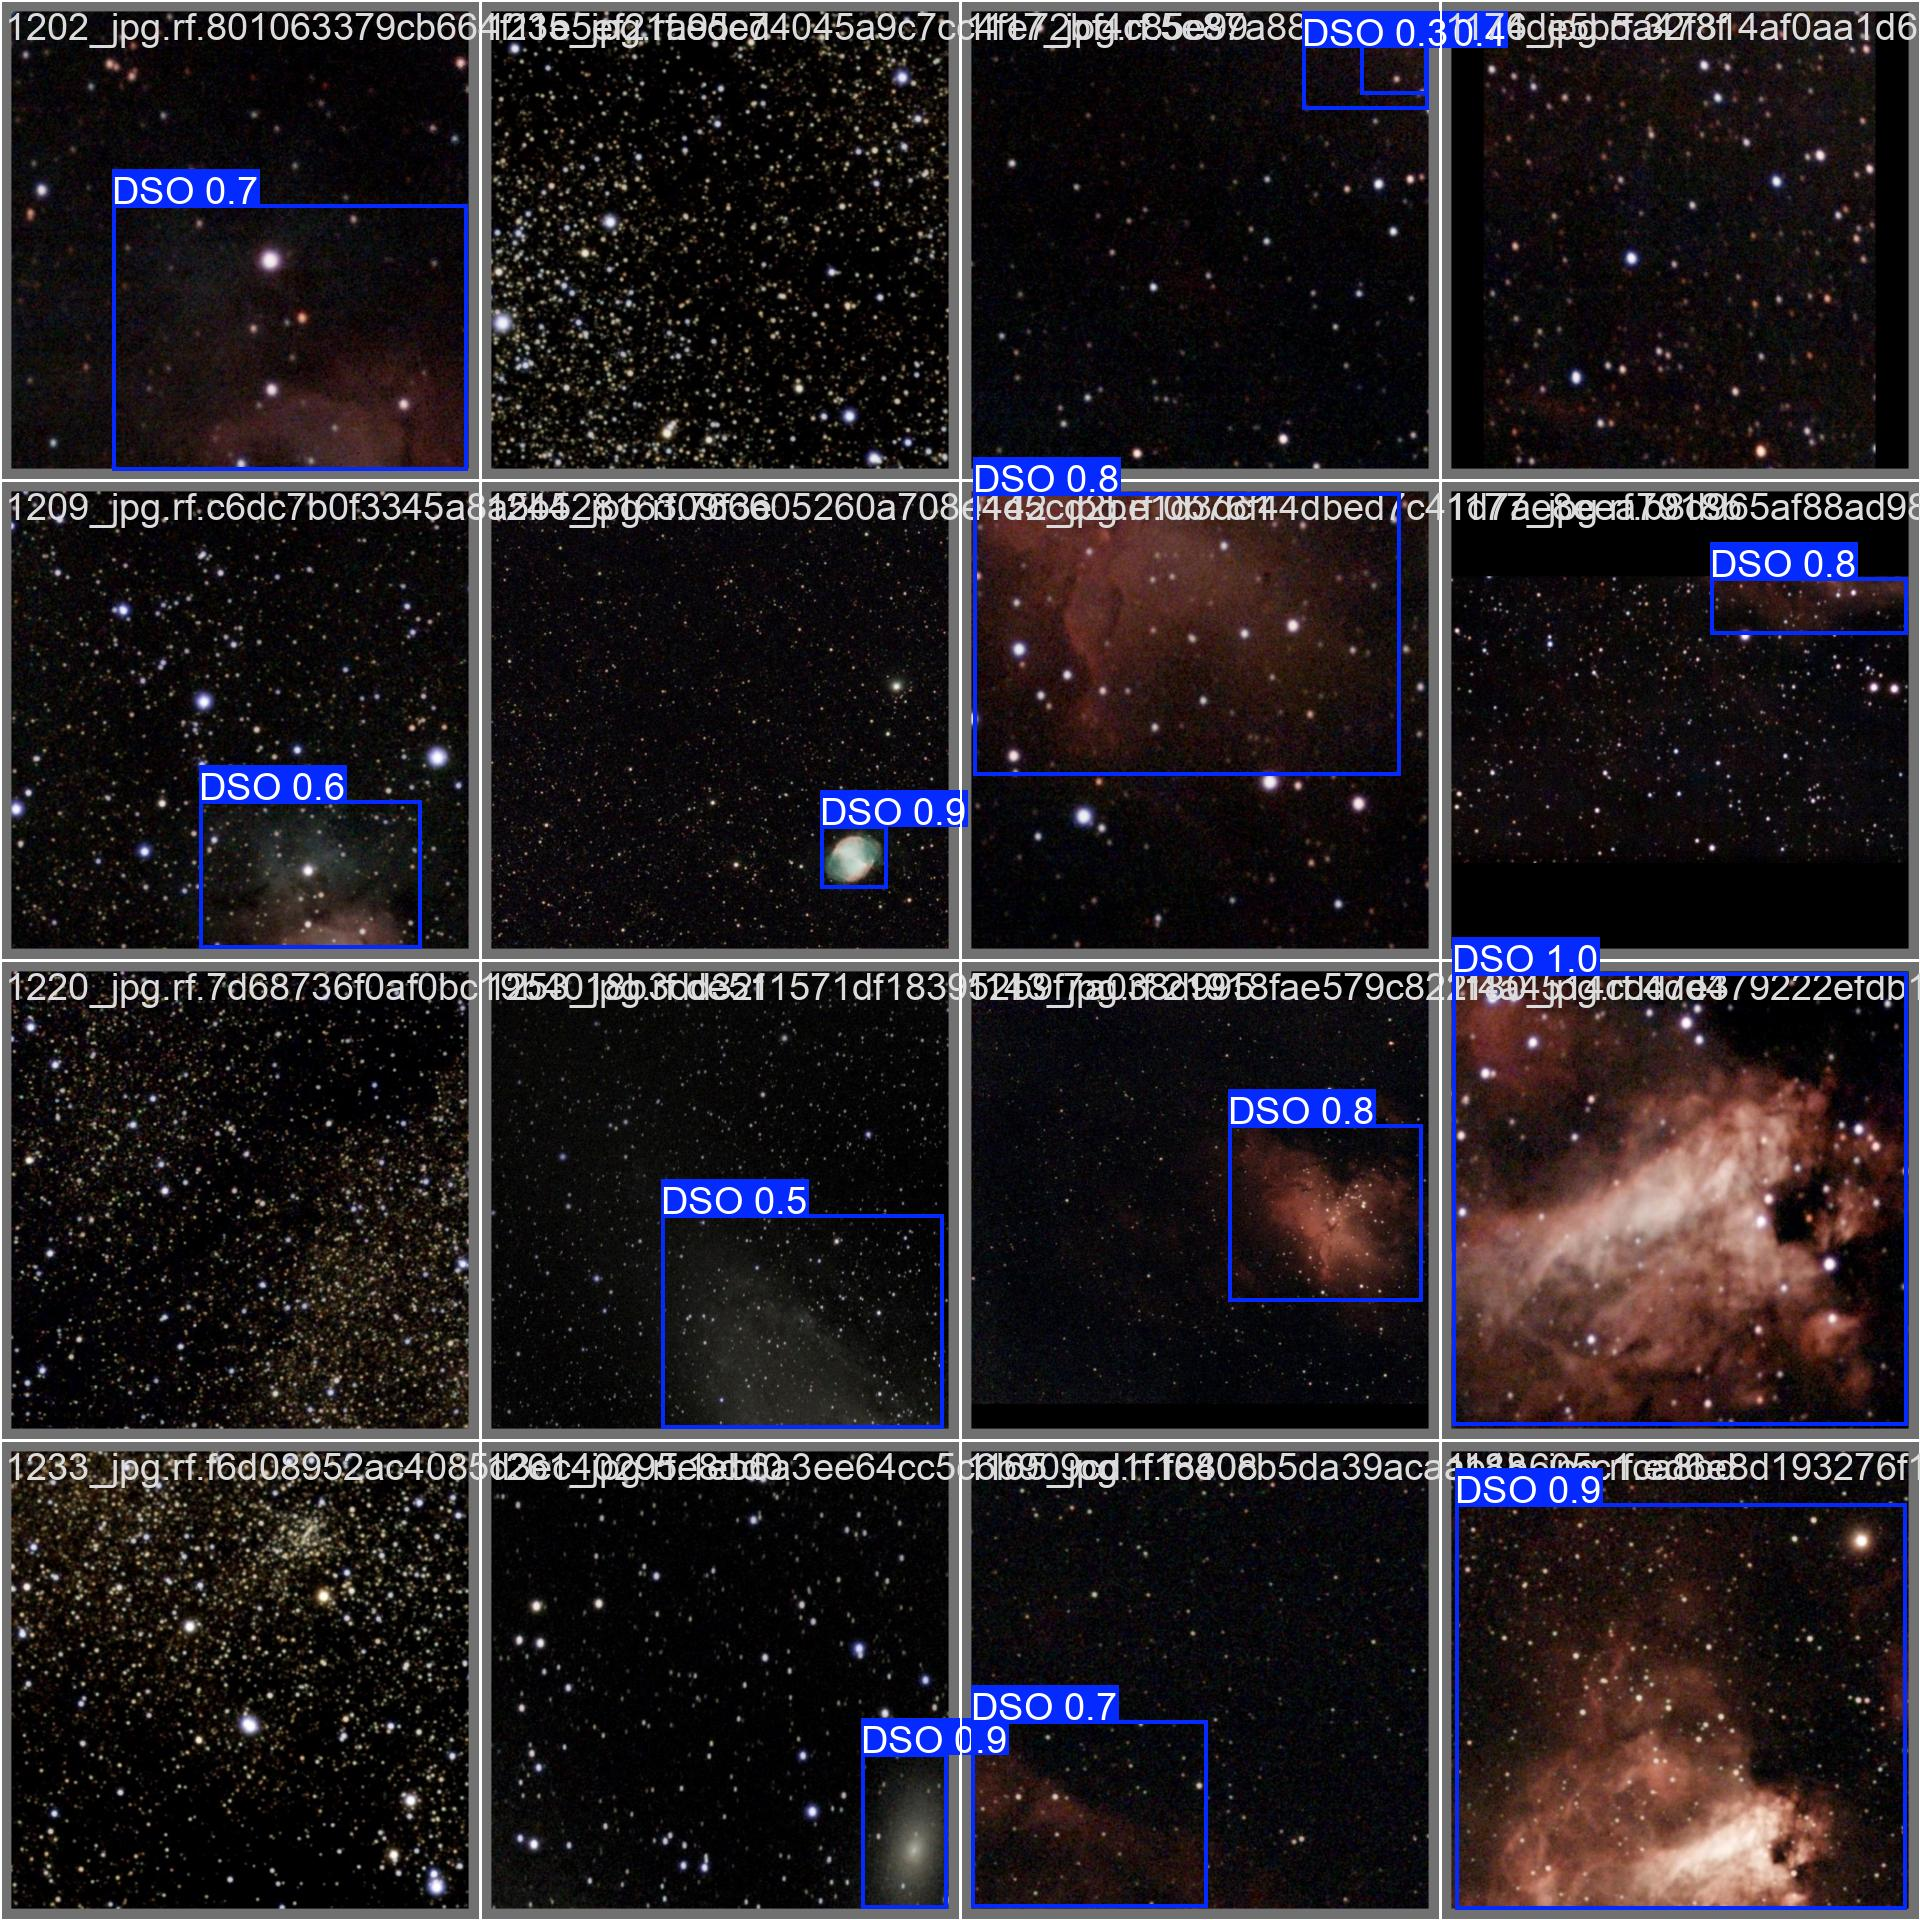
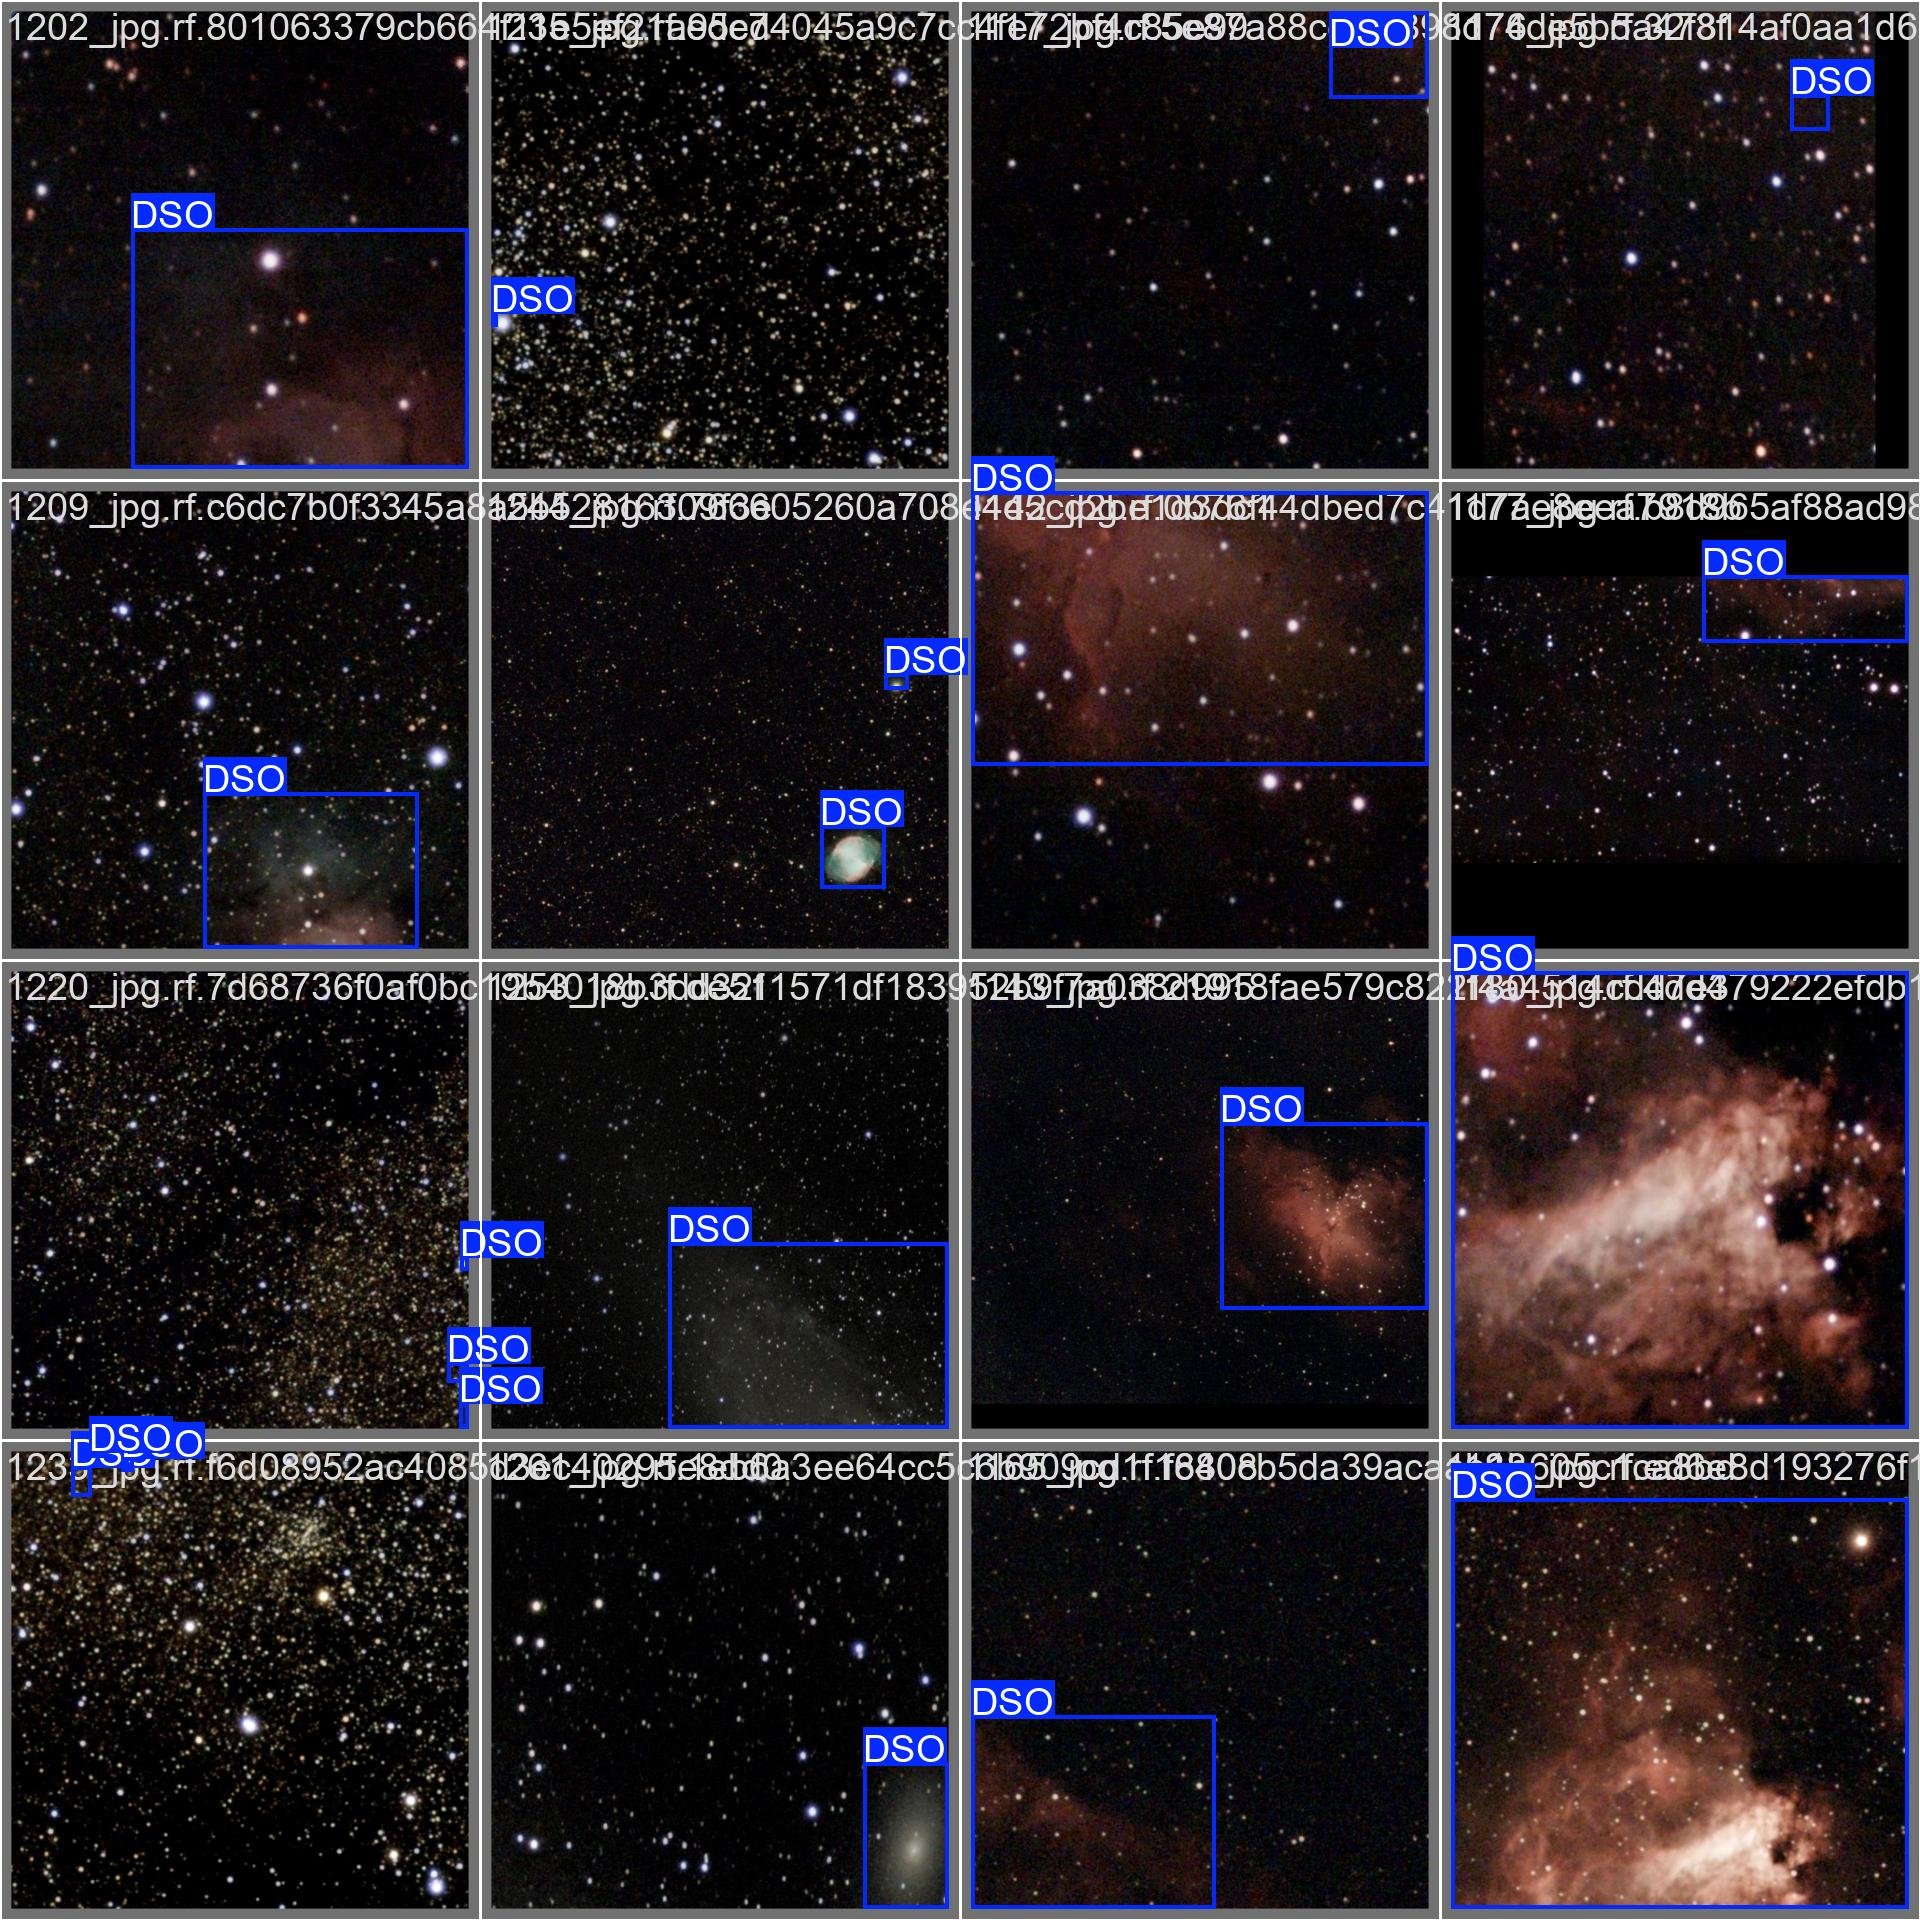
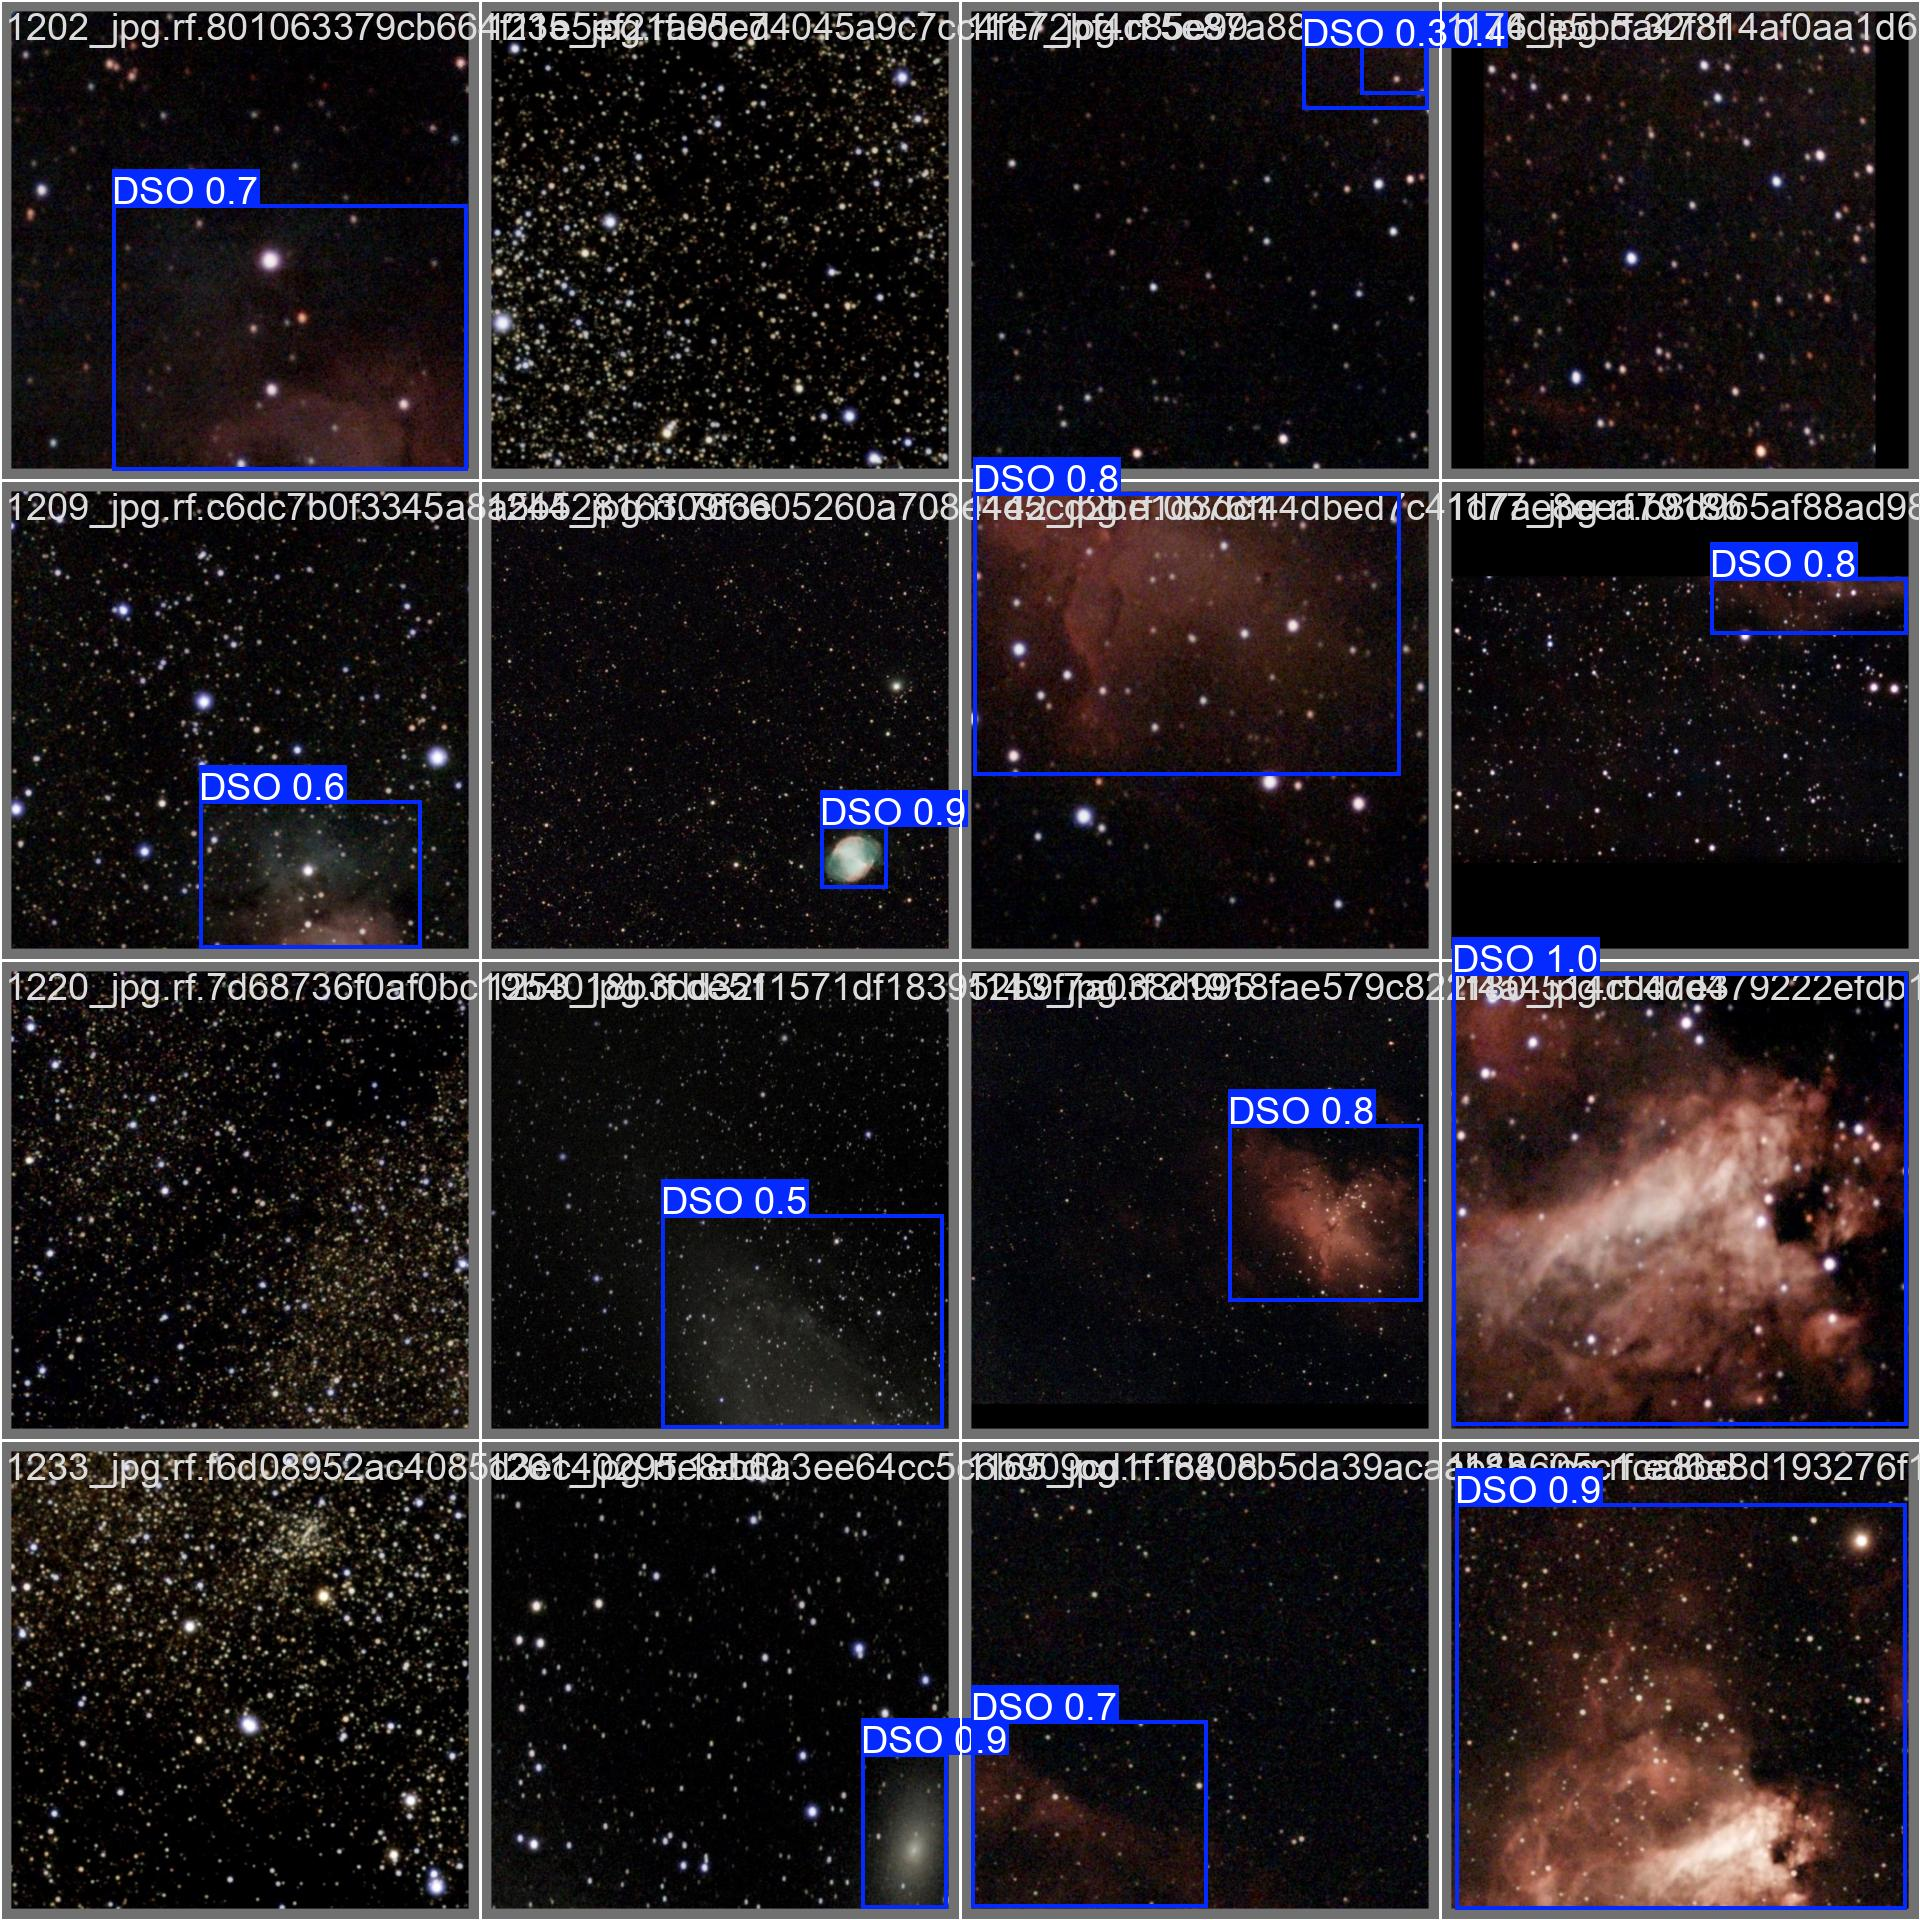

In [24]:
from IPython.display import HTML, display
import base64

base_path = '/kaggle/working/augmented/20ep-1c/train2'

images = [
    'confusion_matrix.png',
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'PR_curve.png',
    'P_curve.png',
    'R_curve.png',
    'labels.jpg',
    'labels_correlogram.jpg',
    'val_batch0_labels.jpg',
    'val_batch0_pred.jpg',
    'val_batch1_labels.jpg',
    'val_batch1_pred.jpg',
]

# Build HTML string with base64-encoded images
html = "<table>"

for i in range(0, len(images), 2):
    html += "<tr>"
    for j in range(4):
        if i + j < len(images):
            img_path = os.path.join(base_path, images[i + j])
            if os.path.exists(img_path):
                with open(img_path, "rb") as f:
                    data = f.read()
                    data_url = base64.b64encode(data).decode()
                    html += f"""
                        <td style='padding:10px; text-align:center;'>
                            <img src='data:image/png;base64,{data_url}' width='300'><br>
                            <small>{images[i + j]}</small>
                        </td>
                    """
    html += "</tr>"

html += "</table>"
display(HTML(html))
